# Analysis of Rainfall in India in the year 2022

## Import the Required Packages

In [1]:
import pandas as pd
import calendar as cl
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
df=pd.read_csv("Indian Rainfall Dataset District-wise Daily Measurements.csv")

## Data Preprocessing

### Data Formatting

In [3]:
df.columns # It will give us the columns of the dataset

Index(['state;"district";"month";"1st";"2nd";"3rd";"4th";"5th";"6th";"7th";"8th";"9th";"10th";"11th";"12th";"13th";"14th";"15th";"16th";"17th";"18th";"19th";"20th";"21st";"22nd";"23rd";"24th";"25th";"26th";"27th";"28th";"29th";"30th";"31st"'], dtype='object')

In [4]:
# Transforming the data into columns to understand much better
df[['State',"District","Month","1st","2nd","3rd","4th","5th","6th","7th","8th","9th","10th","11th","12th","13th","14th","15th","16th","17th","18th","19th","20th","21st","22nd","23rd","24th","25th","26th","27th","28th","29th","30th","31st"]] = df['state;"district";"month";"1st";"2nd";"3rd";"4th";"5th";"6th";"7th";"8th";"9th";"10th";"11th";"12th";"13th";"14th";"15th";"16th";"17th";"18th";"19th";"20th";"21st";"22nd";"23rd";"24th";"25th";"26th";"27th";"28th";"29th";"30th";"31st"'].str.split(';',expand = True)
df

state;"district";"month";"1st";"2nd";"3rd";"4th";"5th";"6th";"7th";"8th";"9th";"10th";"11th";"12th";"13th";"14th";"15th";"16th";"17th";"18th";"19th";"20th";"21st";"22nd";"23rd";"24th";"25th";"26th";"27th";"28th";"29th";"30th";"31st"  \
0     Andaman & Nicobar;"Nicobars";1;0.0;0.0;0.0;0.0...                                                                                                                                                                                         
1     Andaman & Nicobar;"North And Middle Andaman";1...                                                                                                                                                                                         
2     Andaman & Nicobar;"South Andamans";1;0.0;0.0;0...                                                                                                                                                                                         
3     Andhra Pradesh;"Anantapur";1;0.379965;0.0;0.0;...                                                                                                                                                                                         
4     Andhra Pradesh;"Chittoor";1;14.1449;0.857263;0...                                                                                                                                                                                         
...                                                 ...                                                                                                                                                                                         
8785  West Bengal;"Murshidabad";12;0.0;0.0;0.0;0.0;0...                                                                                                                                                                                         
8786  West Bengal;"Nadia";12;0.0;0.0;0.0;0.0;0.0;0.0...                                                                                                                                                                                         
8787  West Bengal;"Paschim Bardhaman";12;0.0;0.0;0.0...                                                                                                                                                                                         
8788  West Bengal;"Purba Bardhaman";12;0.0;0.0;0.0;0...                                                                                                                                                                                         
8789  West Bengal;"Purulia";12;0.0;0.0;0.0;0.0;0.0;0...                                                                                                                                                                                         

                  State                    District Month       1st       2nd  \
0     Andaman & Nicobar                  "Nicobars"     1       0.0       0.0   
1     Andaman & Nicobar  "North And Middle Andaman"     1       0.0       0.0   
2     Andaman & Nicobar            "South Andamans"     1       0.0       0.0   
3        Andhra Pradesh                 "Anantapur"     1  0.379965       0.0   
4        Andhra Pradesh                  "Chittoor"     1   14.1449  0.857263   
...                 ...                         ...   ...       ...       ...   
8785        West Bengal               "Murshidabad"    12       0.0       0.0   
8786        West Bengal                     "Nadia"    12       0.0       0.0   
8787        West Bengal         "Paschim Bardhaman"    12       0.0       0.0   
8788        West Bengal           "Purba Bardhaman"    12       0.0       0.0   
8789        West Bengal                   "Purulia"    12       0.0       0.0   

      3rd  4th  5th  6th  ...         22nd 23rd      24th      25th  \
0     0.0  0.0  0.0  0.0  ...          0.0  0.0       0.0       0.0 

In [5]:
# Dropping the row which is not required after transformation
df.drop('state;"district";"month";"1st";"2nd";"3rd";"4th";"5th";"6th";"7th";"8th";"9th";"10th";"11th";"12th";"13th";"14th";"15th";"16th";"17th";"18th";"19th";"20th";"21st";"22nd";"23rd";"24th";"25th";"26th";"27th";"28th";"29th";"30th";"31st"',axis =1,inplace = True)
df

State                    District Month       1st       2nd  \
0     Andaman & Nicobar                  "Nicobars"     1       0.0       0.0   
1     Andaman & Nicobar  "North And Middle Andaman"     1       0.0       0.0   
2     Andaman & Nicobar            "South Andamans"     1       0.0       0.0   
3        Andhra Pradesh                 "Anantapur"     1  0.379965       0.0   
4        Andhra Pradesh                  "Chittoor"     1   14.1449  0.857263   
...                 ...                         ...   ...       ...       ...   
8785        West Bengal               "Murshidabad"    12       0.0       0.0   
8786        West Bengal                     "Nadia"    12       0.0       0.0   
8787        West Bengal         "Paschim Bardhaman"    12       0.0       0.0   
8788        West Bengal           "Purba Bardhaman"    12       0.0       0.0   
8789        West Bengal                   "Purulia"    12       0.0       0.0   

      3rd  4th  5th  6th  7th  ...         22nd 23rd      24th      25th  \
0     0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0       0.0       0.0   
1     0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0       0.0       0.0   
2     0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0       0.0       0.0   
3     0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0       0.0       0.0   
4     0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0  0.615237  0.925098   
...   ...  ...  ...  ...  ...  ...          ...  ...       ...       ...   
8785  0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0       0.0       0.0   
8786  0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0       0.0       0.0   
8787  0.0  0.0  0.0  0.0  0.0  ...  0.000958159  0.0       0.0       0.0   
8788  0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0       0.0       0.0   
8789  0.0  0.0  0.0  0.0  0.0  ...    3.684e-06  0.0       0.0       0.0   

            26th       27th        28th 29th 30th 31st  
0            0.0        0.0         0.0  0.0  0.0  0.0  
1            0.0        0.0         0.0  0.0  0.0  0.0  
2            0.0        0.0         0.0  0.0  0.0  0.0  
3       0.205834   0.671002   0.0289937  0.0  0.0  0.0  
4       0.507623   0.424843    0.737394  0.0  0.0  0.0  
...          ...        ...         ...  ...  ...  ...  
8785  0.00654315   0.485502         0.0  0.0  0.0  0.0  
8786         0.0   0.019657  0.00242248  0.0  0.0  0.0  
8787         0.0   0.319227  0.00139194  0.0  0.0  0.0  
8788         0.0  0.0370604         0.0  0.0  0.0  0.0  
8789         0.0   0.113793  0.00407855  0.0  0.0  0.0  

[8790 rows x 34 columns]

In [6]:
df.shape

(8790, 34)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   State     8790 non-null   object
 1   District  8790 non-null   object
 2   Month     8790 non-null   object
 3   1st       8790 non-null   object
 4   2nd       8790 non-null   object
 5   3rd       8790 non-null   object
 6   4th       8790 non-null   object
 7   5th       8790 non-null   object
 8   6th       8790 non-null   object
 9   7th       8790 non-null   object
 10  8th       8790 non-null   object
 11  9th       8790 non-null   object
 12  10th      8790 non-null   object
 13  11th      8790 non-null   object
 14  12th      8790 non-null   object
 15  13th      8790 non-null   object
 16  14th      8790 non-null   object
 17  15th      8790 non-null   object
 18  16th      8790 non-null   object
 19  17th      8790 non-null   object
 20  18th      8790 non-null   object
 21  19th      8790

In [8]:
date_columns = ["1st","2nd","3rd"]+[f"{day}th" for day in range(4, 21)]+["21st","22nd","23rd"]+[f"{day}th" for day in range(24, 31)]+["31st"]
date_columns

['1st',
 '2nd',
 '3rd',
 '4th',
 '5th',
 '6th',
 '7th',
 '8th',
 '9th',
 '10th',
 '11th',
 '12th',
 '13th',
 '14th',
 '15th',
 '16th',
 '17th',
 '18th',
 '19th',
 '20th',
 '21st',
 '22nd',
 '23rd',
 '24th',
 '25th',
 '26th',
 '27th',
 '28th',
 '29th',
 '30th',
 '31st']

In [9]:
# Converting datatypes
df[date_columns] = df[date_columns].astype('float')
df.Month=df.Month.astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     8790 non-null   object 
 1   District  8790 non-null   object 
 2   Month     8790 non-null   int32  
 3   1st       8790 non-null   float64
 4   2nd       8790 non-null   float64
 5   3rd       8790 non-null   float64
 6   4th       8790 non-null   float64
 7   5th       8790 non-null   float64
 8   6th       8790 non-null   float64
 9   7th       8790 non-null   float64
 10  8th       8790 non-null   float64
 11  9th       8790 non-null   float64
 12  10th      8790 non-null   float64
 13  11th      8790 non-null   float64
 14  12th      8790 non-null   float64
 15  13th      8790 non-null   float64
 16  14th      8790 non-null   float64
 17  15th      8790 non-null   float64
 18  16th      8790 non-null   float64
 19  17th      8790 non-null   float64
 20  18th      8790 non-null   floa

In [11]:
df.head()

State                    District  Month        1st       2nd  \
0  Andaman & Nicobar                  "Nicobars"      1   0.000000  0.000000   
1  Andaman & Nicobar  "North And Middle Andaman"      1   0.000000  0.000000   
2  Andaman & Nicobar            "South Andamans"      1   0.000000  0.000000   
3     Andhra Pradesh                 "Anantapur"      1   0.379965  0.000000   
4     Andhra Pradesh                  "Chittoor"      1  14.144900  0.857263   

   3rd  4th  5th  6th  7th  ...  22nd  23rd      24th      25th      26th  \
0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.000000   
1  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.000000   
2  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.000000   
3  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.205834   
4  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.615237  0.925098  0.507623   

       27th      28th  29th  30th  31st  
0  0.000000  0.000000   0.0   0.0   0.0  
1  0.000000  0.000000   0.0   0.0   0.0  
2  0.000000  0.000000   0.0   0.0   0.0  
3  0.671002  0.028994   0.0   0.0   0.0  
4  0.424843  0.737394   0.0   0.0   0.0  

[5 rows x 34 columns]

In [12]:
df['District'] = df['District'].str.replace('"', '')

In [13]:
df.head()

State                  District  Month        1st       2nd  \
0  Andaman & Nicobar                  Nicobars      1   0.000000  0.000000   
1  Andaman & Nicobar  North And Middle Andaman      1   0.000000  0.000000   
2  Andaman & Nicobar            South Andamans      1   0.000000  0.000000   
3     Andhra Pradesh                 Anantapur      1   0.379965  0.000000   
4     Andhra Pradesh                  Chittoor      1  14.144900  0.857263   

   3rd  4th  5th  6th  7th  ...  22nd  23rd      24th      25th      26th  \
0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.000000   
1  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.000000   
2  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.000000   
3  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.205834   
4  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.615237  0.925098  0.507623   

       27th      28th  29th  30th  31st  
0  0.000000  0.000000   0.0   0.0   0.0  
1  0.000000  0.000000   0.0   0.0   0.0  
2  0.000000  0.000000   0.0   0.0   0.0  
3  0.671002  0.028994   0.0   0.0   0.0  
4  0.424843  0.737394   0.0   0.0   0.0  

[5 rows x 34 columns]

In [14]:
# Create a mapping of month numbers to month names
month_name_map = {i: cl.month_name[i] for i in range(1, 13)}
df['Month']=df.Month.map(month_name_map)
df.head()

State                  District    Month        1st       2nd  \
0  Andaman & Nicobar                  Nicobars  January   0.000000  0.000000   
1  Andaman & Nicobar  North And Middle Andaman  January   0.000000  0.000000   
2  Andaman & Nicobar            South Andamans  January   0.000000  0.000000   
3     Andhra Pradesh                 Anantapur  January   0.379965  0.000000   
4     Andhra Pradesh                  Chittoor  January  14.144900  0.857263   

   3rd  4th  5th  6th  7th  ...  22nd  23rd      24th      25th      26th  \
0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.000000   
1  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.000000   
2  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.000000   
3  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.205834   
4  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.615237  0.925098  0.507623   

       27th      28th  29th  30th  31st  
0  0.000000  0.000000   0.0   0.0   0.0  
1  0.000000  0.000000   0.0   0.0   0.0  
2  0.000000  0.000000   0.0   0.0   0.0  
3  0.671002  0.028994   0.0   0.0   0.0  
4  0.424843  0.737394   0.0   0.0   0.0  

[5 rows x 34 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     8790 non-null   object 
 1   District  8790 non-null   object 
 2   Month     8790 non-null   object 
 3   1st       8790 non-null   float64
 4   2nd       8790 non-null   float64
 5   3rd       8790 non-null   float64
 6   4th       8790 non-null   float64
 7   5th       8790 non-null   float64
 8   6th       8790 non-null   float64
 9   7th       8790 non-null   float64
 10  8th       8790 non-null   float64
 11  9th       8790 non-null   float64
 12  10th      8790 non-null   float64
 13  11th      8790 non-null   float64
 14  12th      8790 non-null   float64
 15  13th      8790 non-null   float64
 16  14th      8790 non-null   float64
 17  15th      8790 non-null   float64
 18  16th      8790 non-null   float64
 19  17th      8790 non-null   float64
 20  18th      8790 non-null   floa

In [16]:
df.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [17]:
df.State.unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [18]:
df.describe()

1st          2nd          3rd          4th          5th  \
count  8790.000000  8790.000000  8790.000000  8790.000000  8790.000000   
mean      3.493094     3.210606     2.915560     3.909056     4.256830   
std       9.824910     9.245431     7.179966     9.192568    10.675278   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000024     0.000000   
75%       1.754773     2.130985     1.721510     3.528917     3.317140   
max     218.306000   321.706000    83.310000   183.320000   200.507000   

               6th          7th          8th          9th         10th  ...  \
count  8790.000000  8790.000000  8790.000000  8790.000000  8790.000000  ...   
mean      4.754248     3.174247     3.746569     4.176870     4.525772  ...   
std      12.634238     8.454718    10.272592    11.560505    12.321619  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000107     0.011395  ...   
75%       3.309595     1.912470     2.098642     2.202985     2.753393  ...   
max     221.427000   125.052000   160.666000   149.033000   185.933000  ...   

              22nd         23rd         24th         25th         26th  \
count  8790.000000  8790.000000  8790.000000  8790.000000  8790.000000   
mean      3.030564     3.708869     3.457348     3.230453     2.854965   
std       7.836818    10.606420     8.488457     8.516695     8.417082   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000001     0.000000     0.000000     0.000000     0.000000   
75%       2.682410     1.997115     2.594315     1.886385     1.439935   
max     133.393000   195.206000   134.550000   113.798000   295.649000   

              27th         28th         29th         30th         31st  
count  8790.000000  8790.000000  8790.000000  8790.000000  8790.000000  
mean      3.076293     2.192825     2.437567     1.938469     0.635373  
std       8.510549     7.613134     8.559438     6.673454     3.192389  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       1.916800     0.527392     0.355160     0.007036     0.000000  
max     124.925000   167.224000   182.680000    86.015900    91.676100  

[8 rows x 31 columns]

### Data Cleaning

In [19]:
df.isnull().sum()

State       0
District    0
Month       0
1st         0
2nd         0
3rd         0
4th         0
5th         0
6th         0
7th         0
8th         0
9th         0
10th        0
11th        0
12th        0
13th        0
14th        0
15th        0
16th        0
17th        0
18th        0
19th        0
20th        0
21st        0
22nd        0
23rd        0
24th        0
25th        0
26th        0
27th        0
28th        0
29th        0
30th        0
31st        0
dtype: int64

In [20]:
df.duplicated().sum()

0

__There are no duplicates or null values__

### Data Transformation

In [21]:
df['Total'] = df[date_columns].sum(axis=1)
df.head()

State                  District    Month        1st       2nd  \
0  Andaman & Nicobar                  Nicobars  January   0.000000  0.000000   
1  Andaman & Nicobar  North And Middle Andaman  January   0.000000  0.000000   
2  Andaman & Nicobar            South Andamans  January   0.000000  0.000000   
3     Andhra Pradesh                 Anantapur  January   0.379965  0.000000   
4     Andhra Pradesh                  Chittoor  January  14.144900  0.857263   

   3rd  4th  5th  6th  7th  ...  23rd      24th      25th      26th      27th  \
0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.000000  0.000000  0.000000  0.000000   
1  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.000000  0.000000  0.000000  0.000000   
2  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.000000  0.000000  0.000000  0.000000   
3  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.000000  0.000000  0.205834  0.671002   
4  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.615237  0.925098  0.507623  0.424843   

       28th  29th  30th  31st      Total  
0  0.000000   0.0   0.0   0.0   0.000000  
1  0.000000   0.0   0.0   0.0   0.000000  
2  0.000000   0.0   0.0   0.0   0.000000  
3  0.028994   0.0   0.0   0.0   2.609365  
4  0.737394   0.0   0.0   0.0  26.160305  

[5 rows x 35 columns]

In [22]:
df.tail()

State           District     Month  1st  2nd  3rd  4th  5th  6th  \
8785  West Bengal        Murshidabad  December  0.0  0.0  0.0  0.0  0.0  0.0   
8786  West Bengal              Nadia  December  0.0  0.0  0.0  0.0  0.0  0.0   
8787  West Bengal  Paschim Bardhaman  December  0.0  0.0  0.0  0.0  0.0  0.0   
8788  West Bengal    Purba Bardhaman  December  0.0  0.0  0.0  0.0  0.0  0.0   
8789  West Bengal            Purulia  December  0.0  0.0  0.0  0.0  0.0  0.0   

      7th  ...  23rd  24th  25th      26th      27th      28th  29th  30th  \
8785  0.0  ...   0.0   0.0   0.0  0.006543  0.485502  0.000000   0.0   0.0   
8786  0.0  ...   0.0   0.0   0.0  0.000000  0.019657  0.002422   0.0   0.0   
8787  0.0  ...   0.0   0.0   0.0  0.000000  0.319227  0.001392   0.0   0.0   
8788  0.0  ...   0.0   0.0   0.0  0.000000  0.037060  0.000000   0.0   0.0   
8789  0.0  ...   0.0   0.0   0.0  0.000000  0.113793  0.004079   0.0   0.0   

      31st     Total  
8785   0.0  0.511346  
8786   0.0  0.022079  
8787   0.0  0.327742  
8788   0.0  0.037092  
8789   0.0  0.134915  

[5 rows x 35 columns]

## Data Visualization

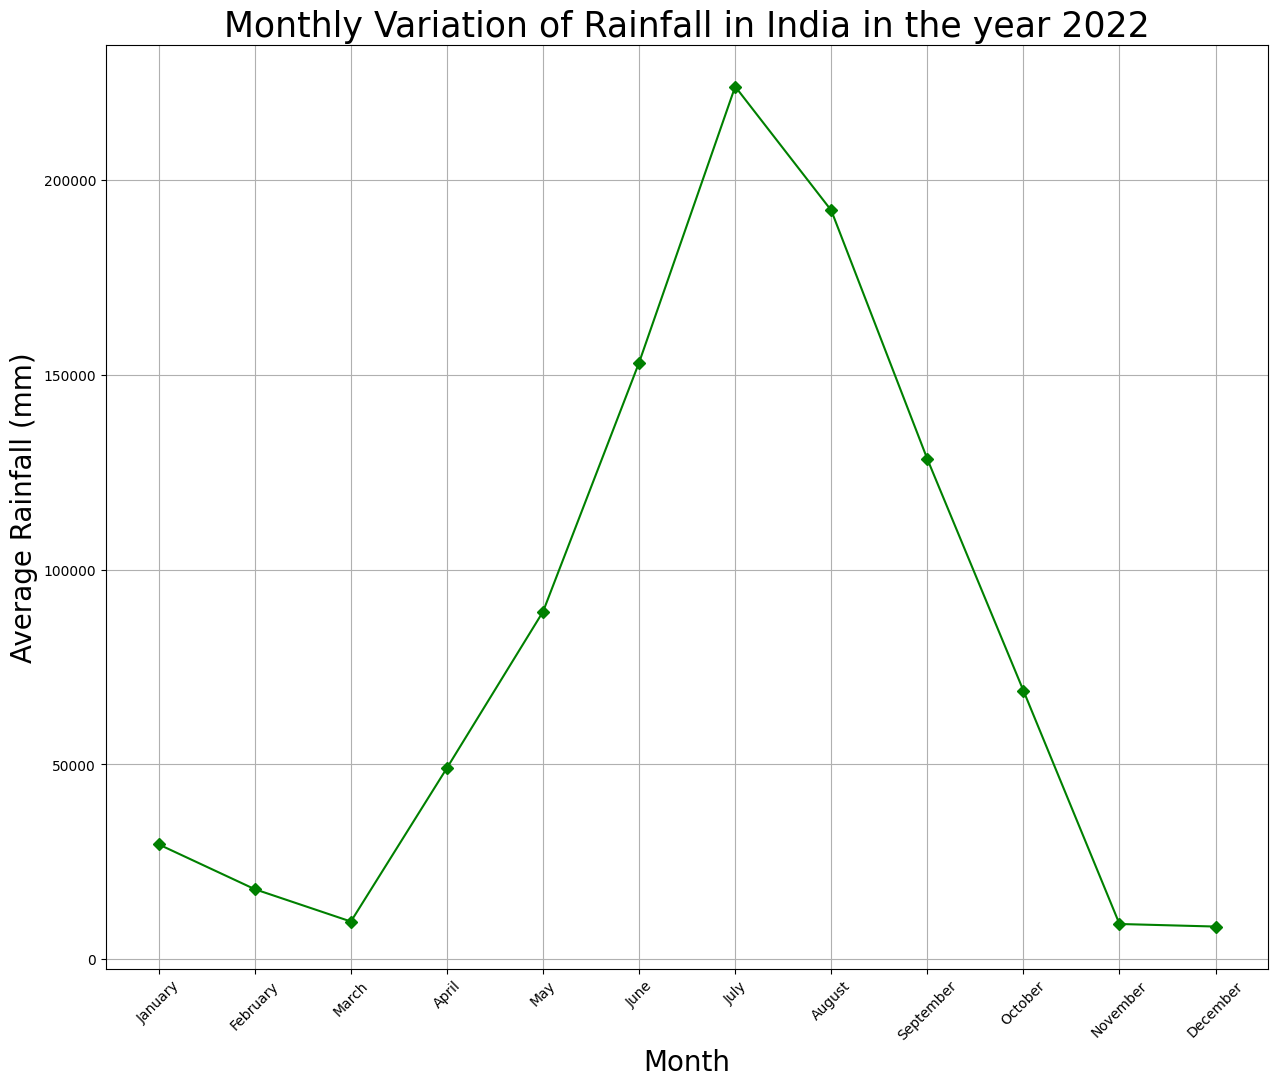

In [23]:
monthly_rainfall=df.groupby('Month',sort=False)['Total'].sum()
# Grouping the data by 'Month' and calculate the mean rainfall for each month
month_names=list(cl.month_name)[1:]
# Get the list of month names from the calender module
tick_positions=range(1,13)
# Set the postion of the x-axis ticks
plt.figure(figsize=(15,12))
plt.plot(tick_positions,monthly_rainfall.values,marker='D',linestyle='-',color='g')
plt.xlabel('Month',fontsize=20)
plt.ylabel('Average Rainfall (mm)',fontsize=20)
plt.title('Monthly Variation of Rainfall in India in the year 2022',fontsize=25)
plt.xticks(tick_positions,month_names,rotation=45)
# Set custom month labels on the x-axis
plt.grid(True)
plt.show()

__From the above line plot graph, we can say that in the months June, July and August the rainfall is highest. And in the months March, November and December the rainfall is lowest in the india in the year 2022.__

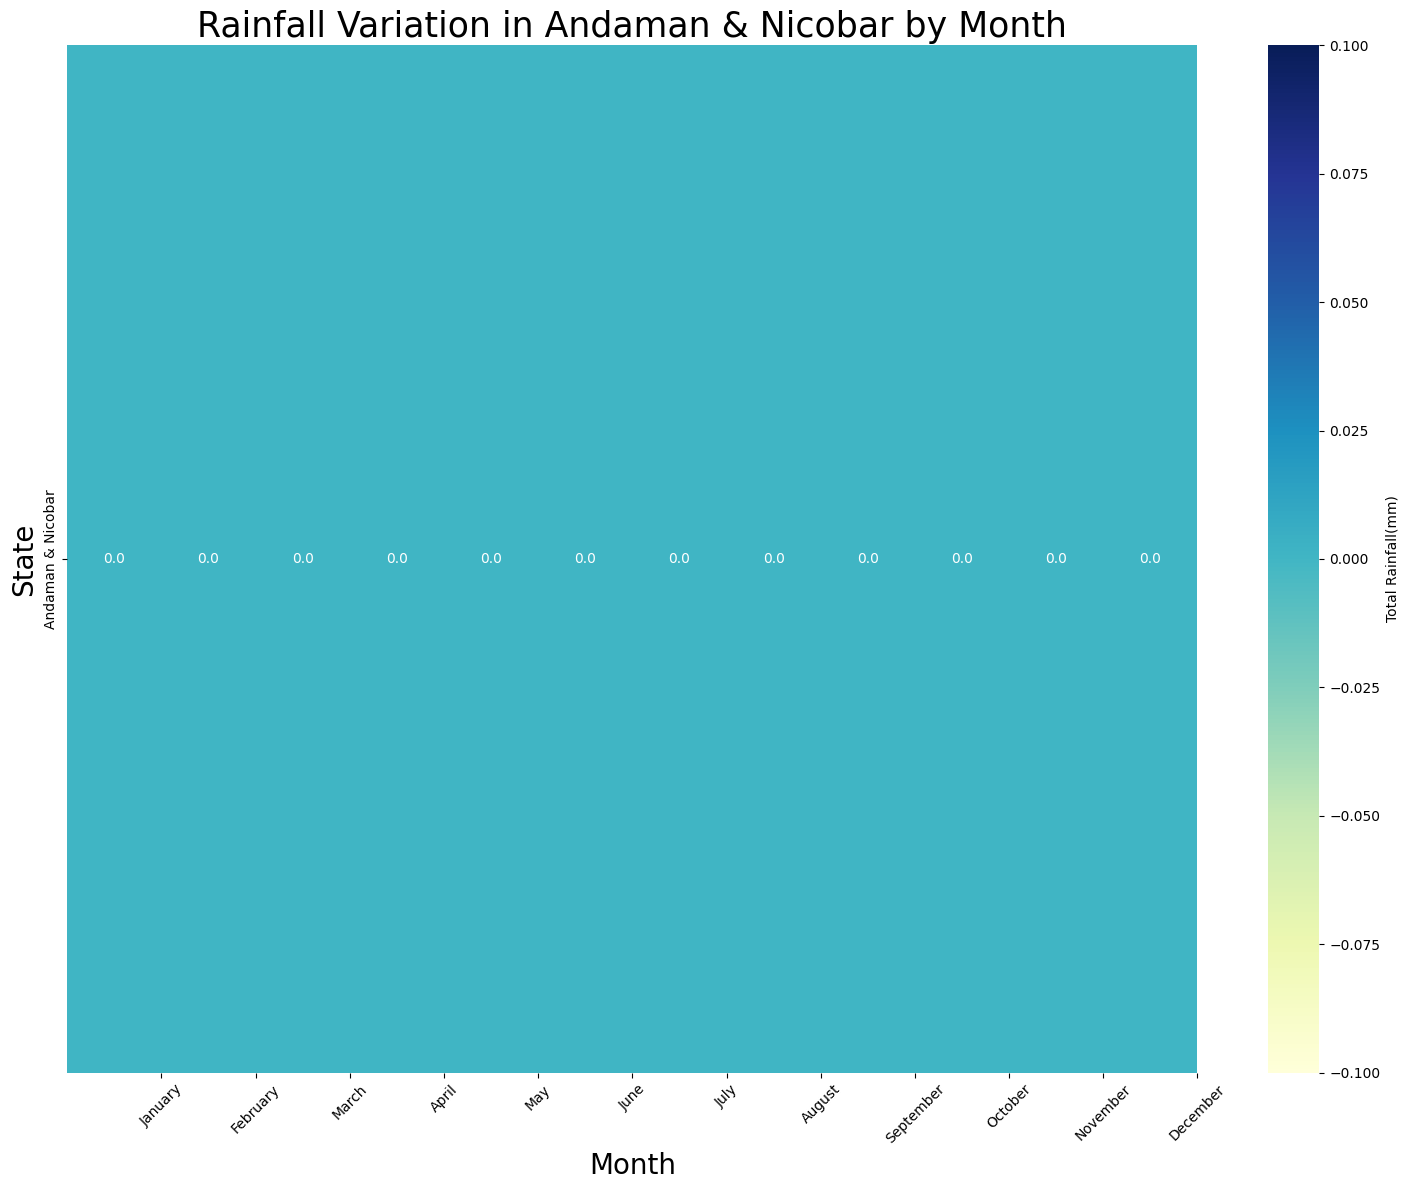

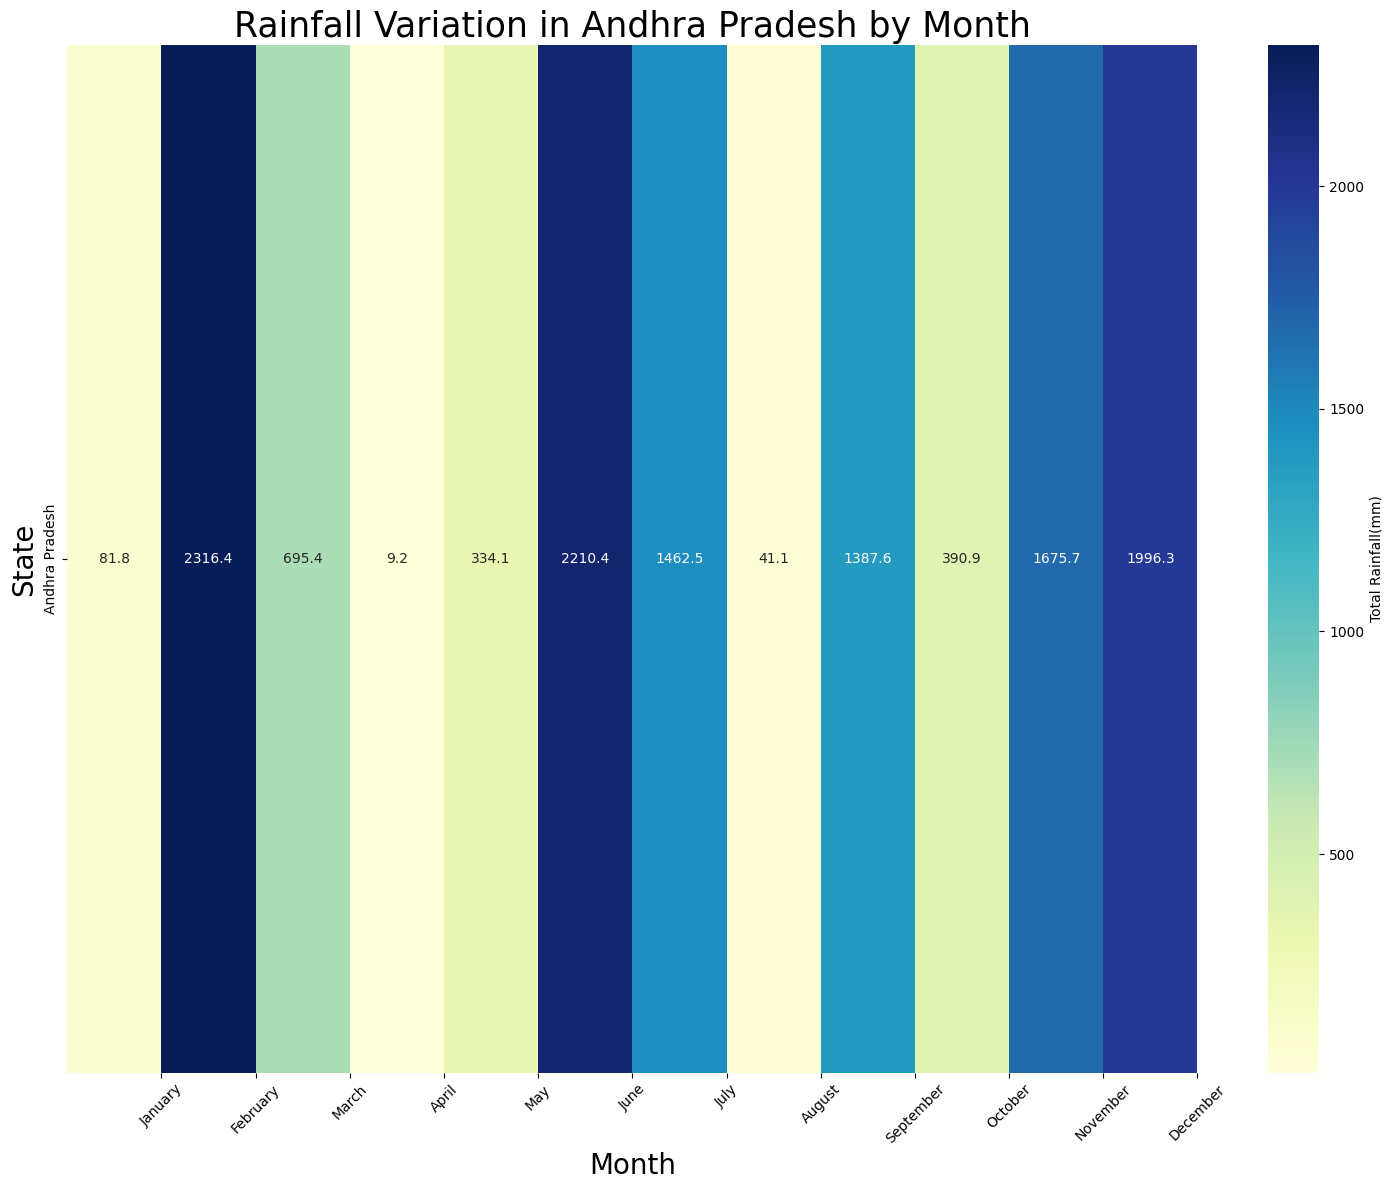

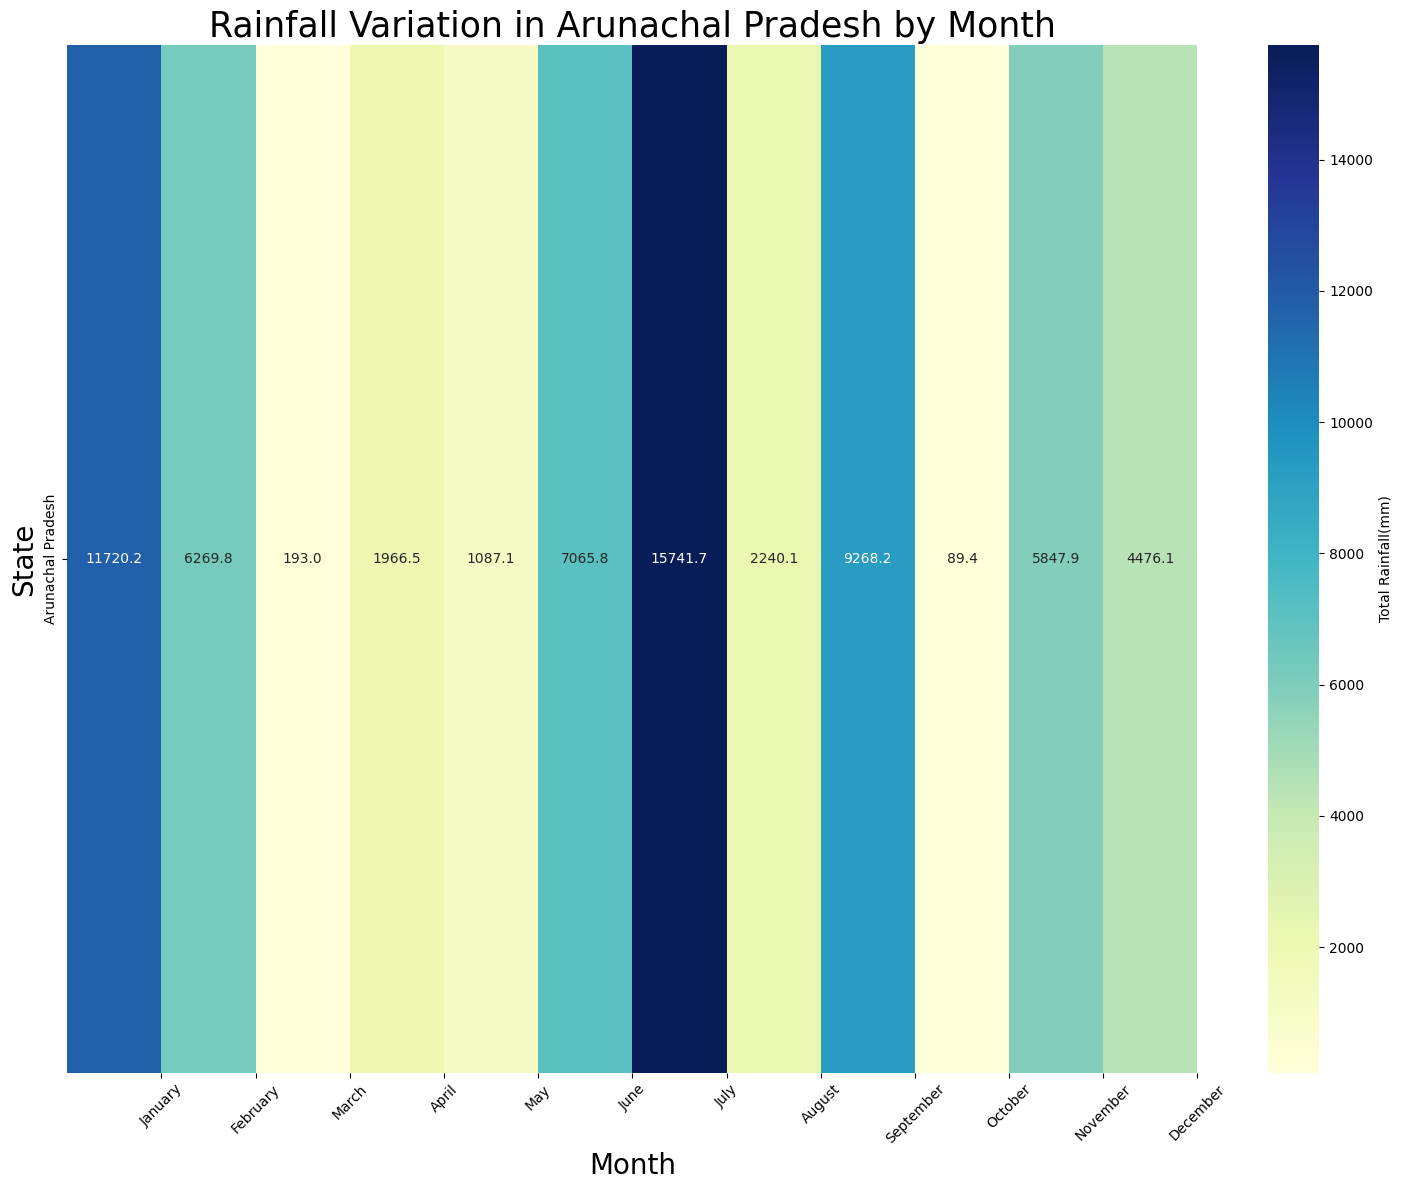

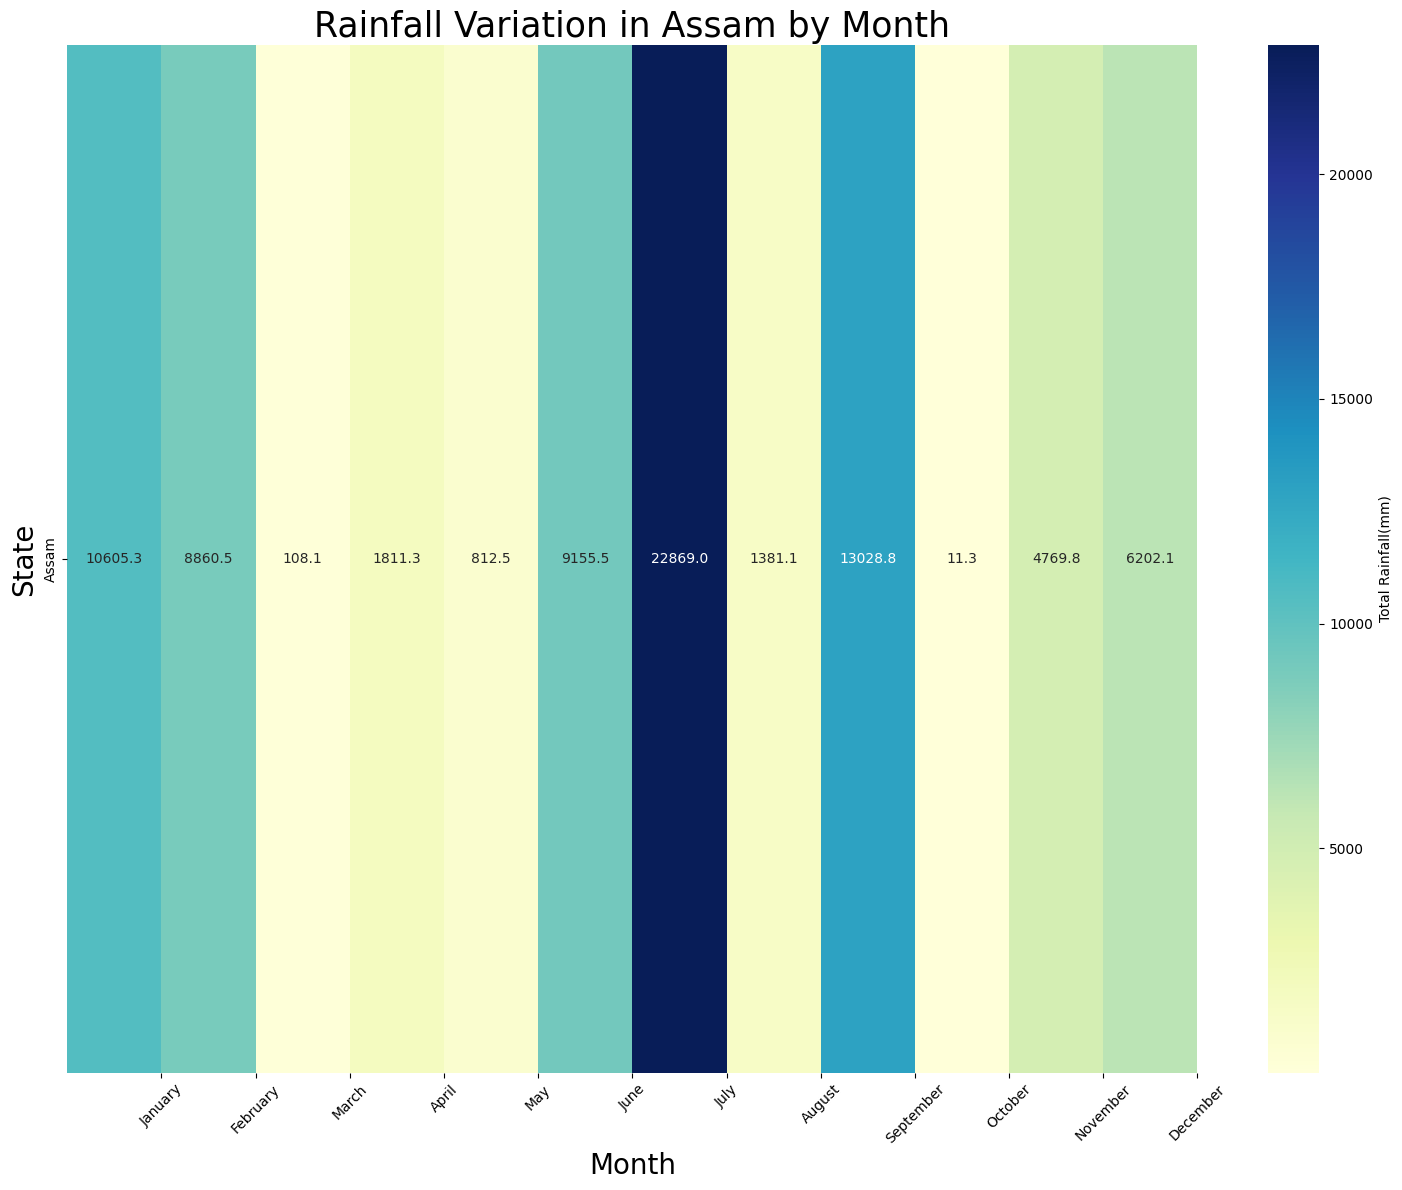

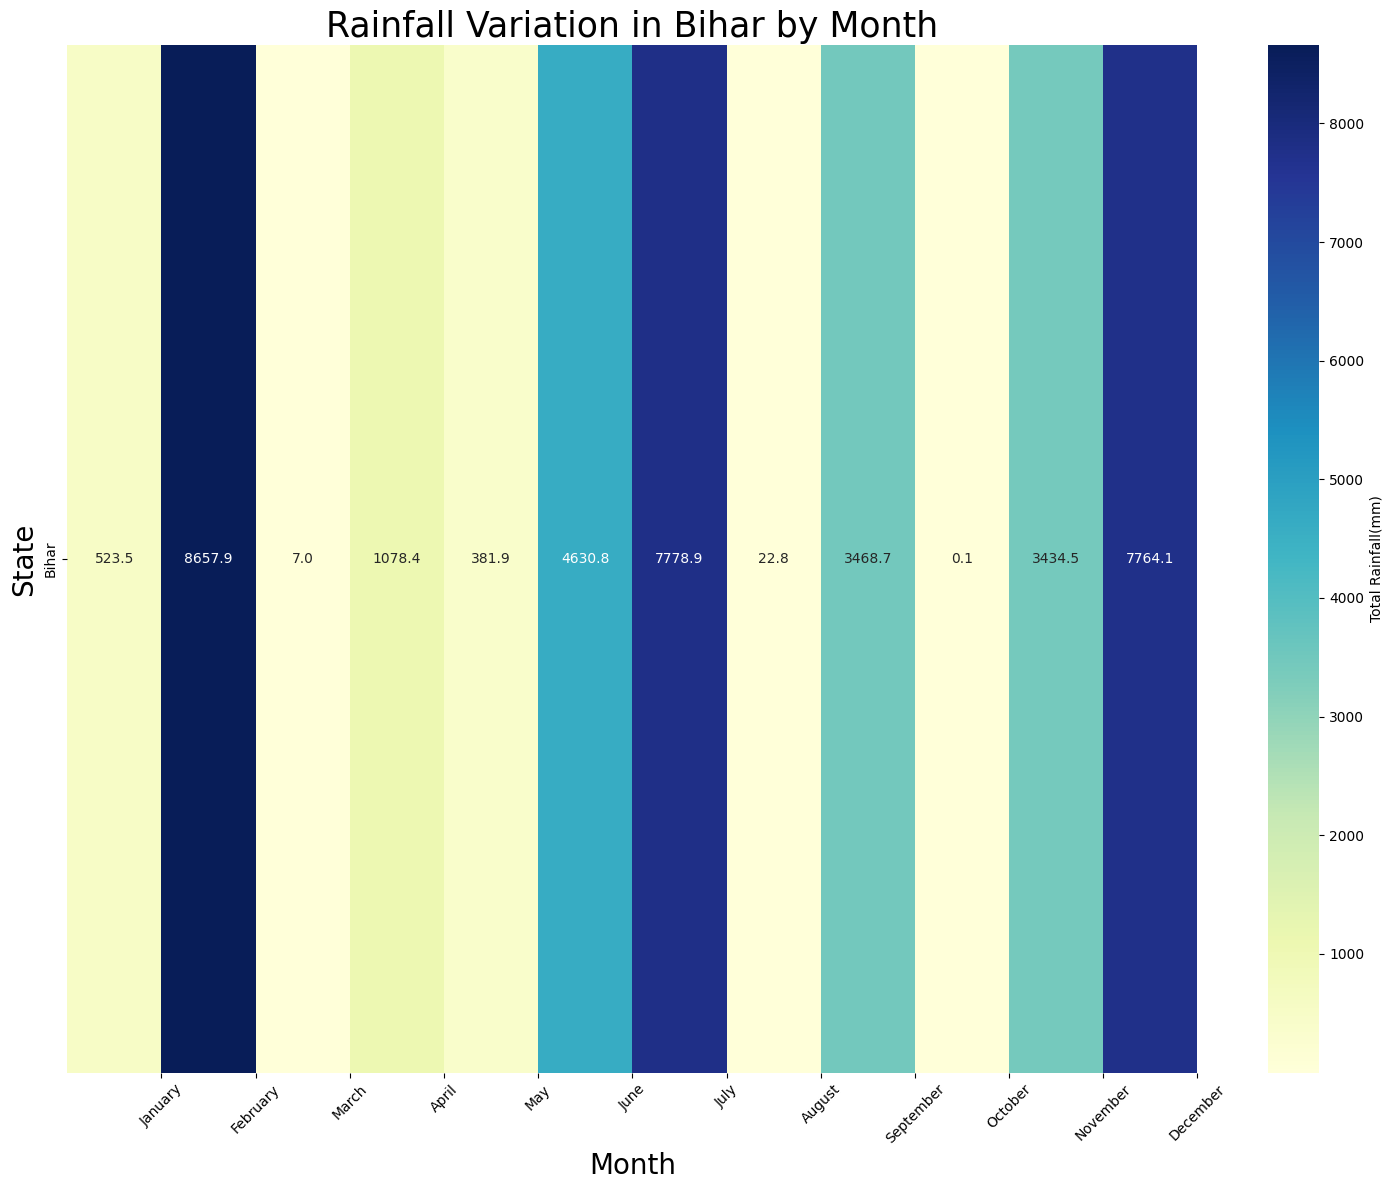

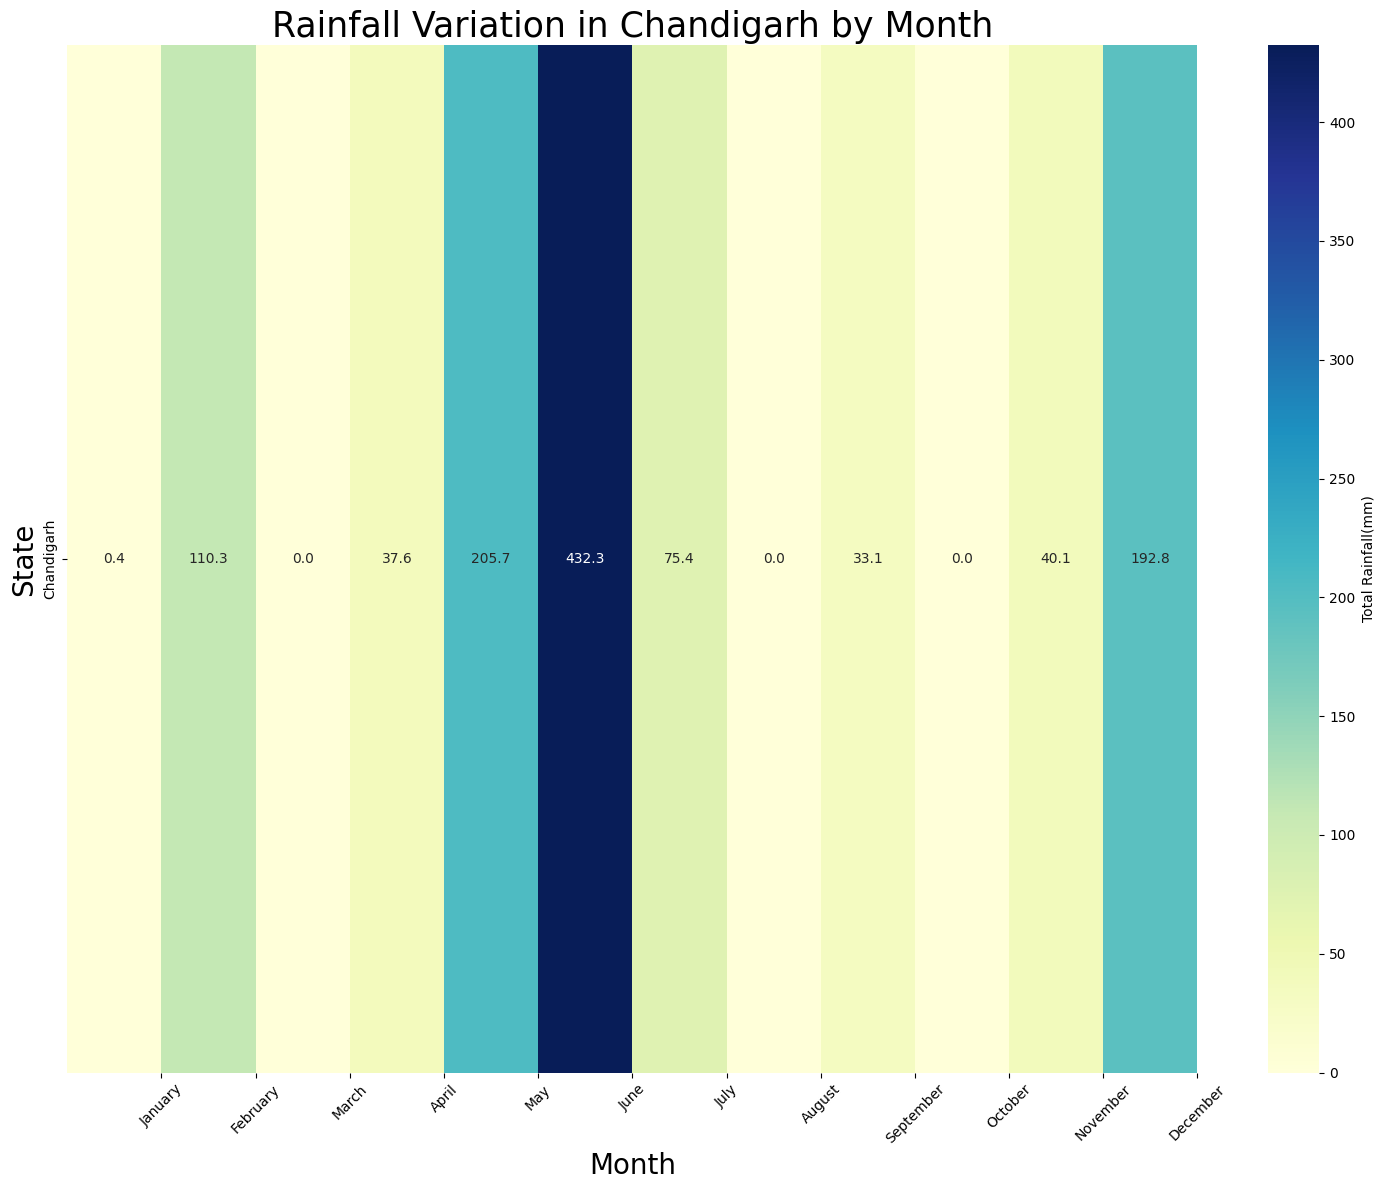

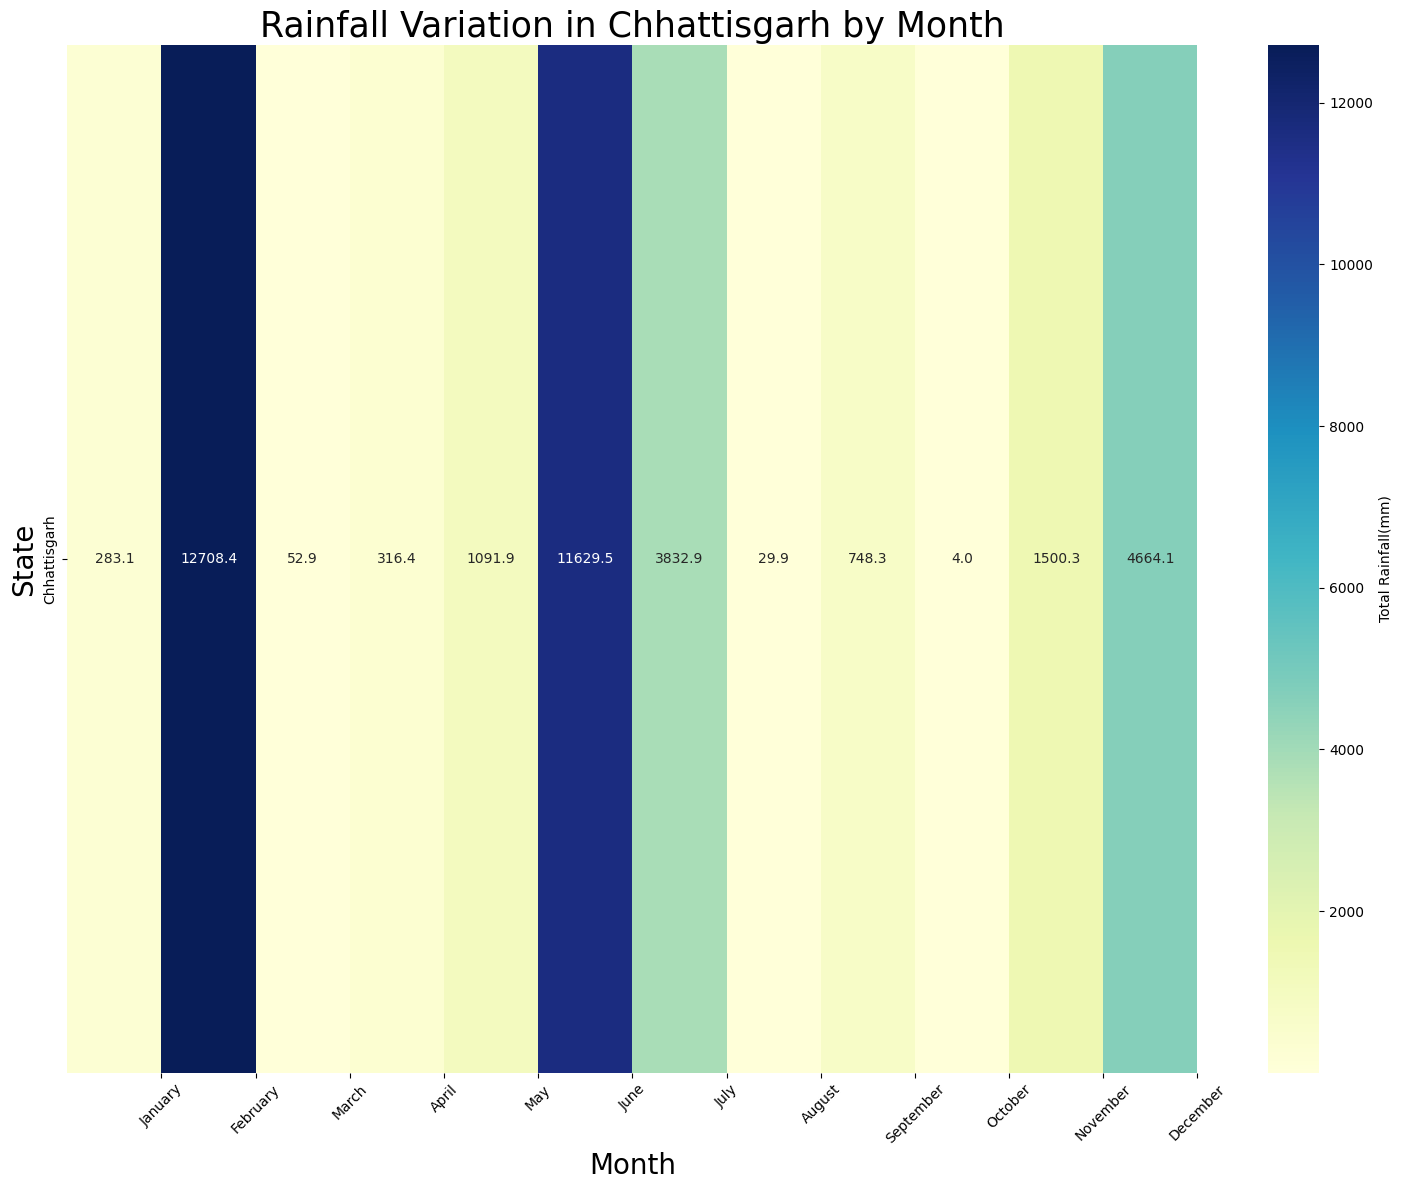

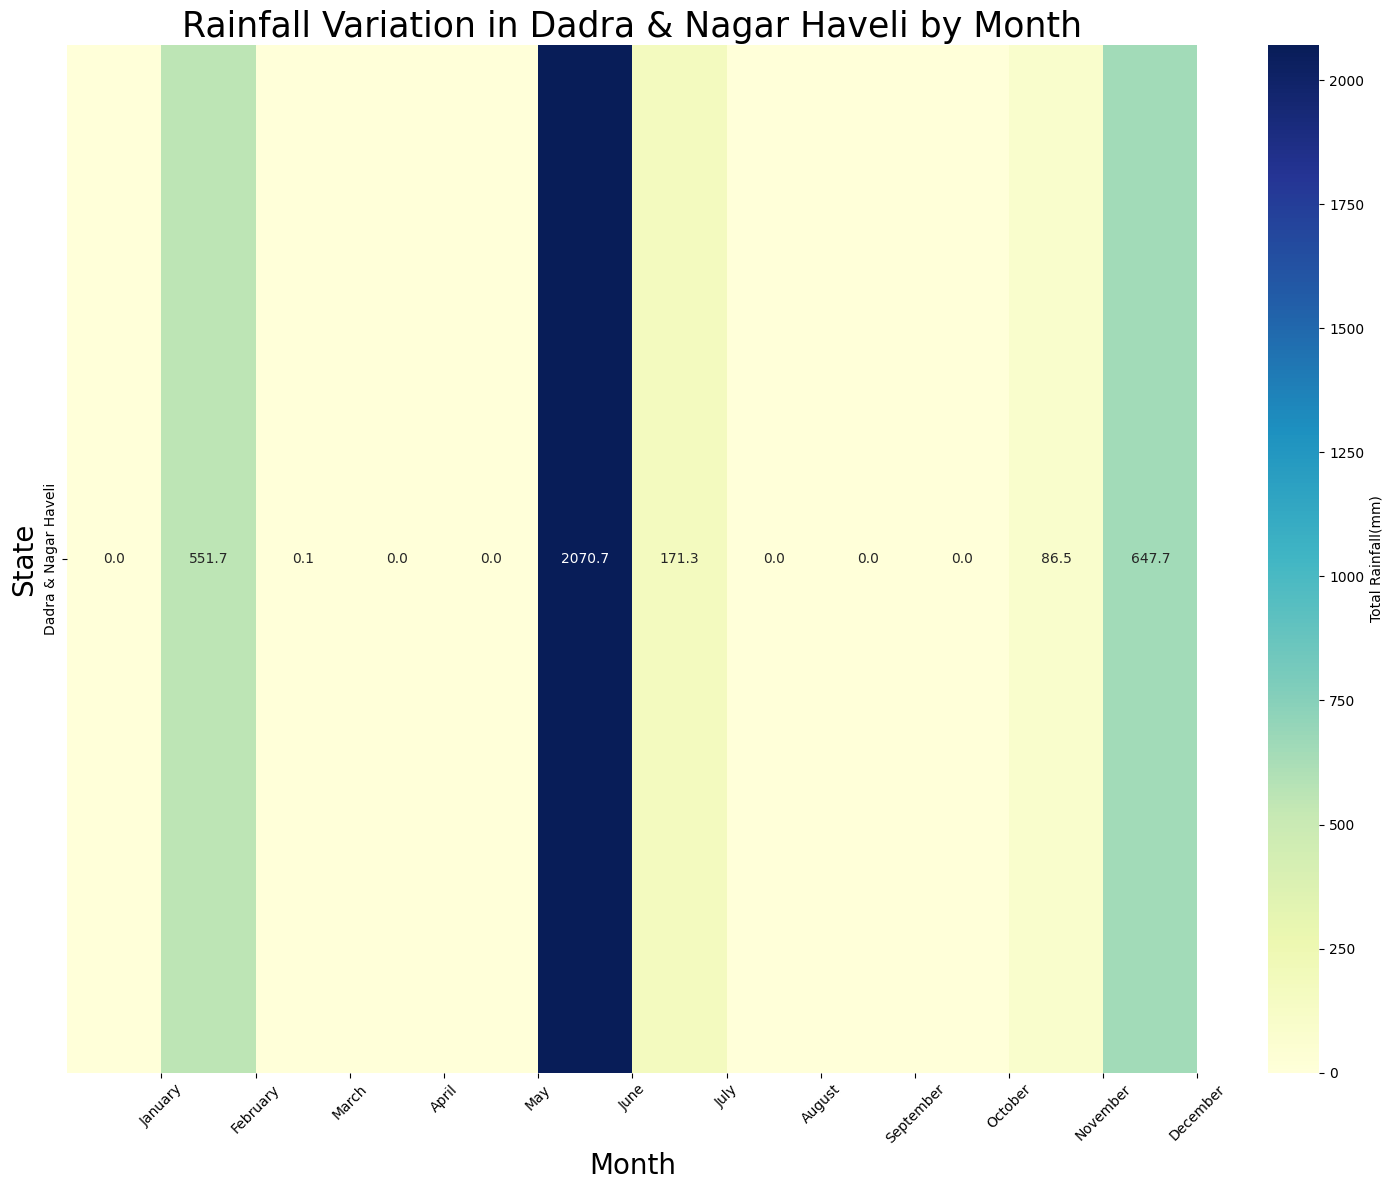

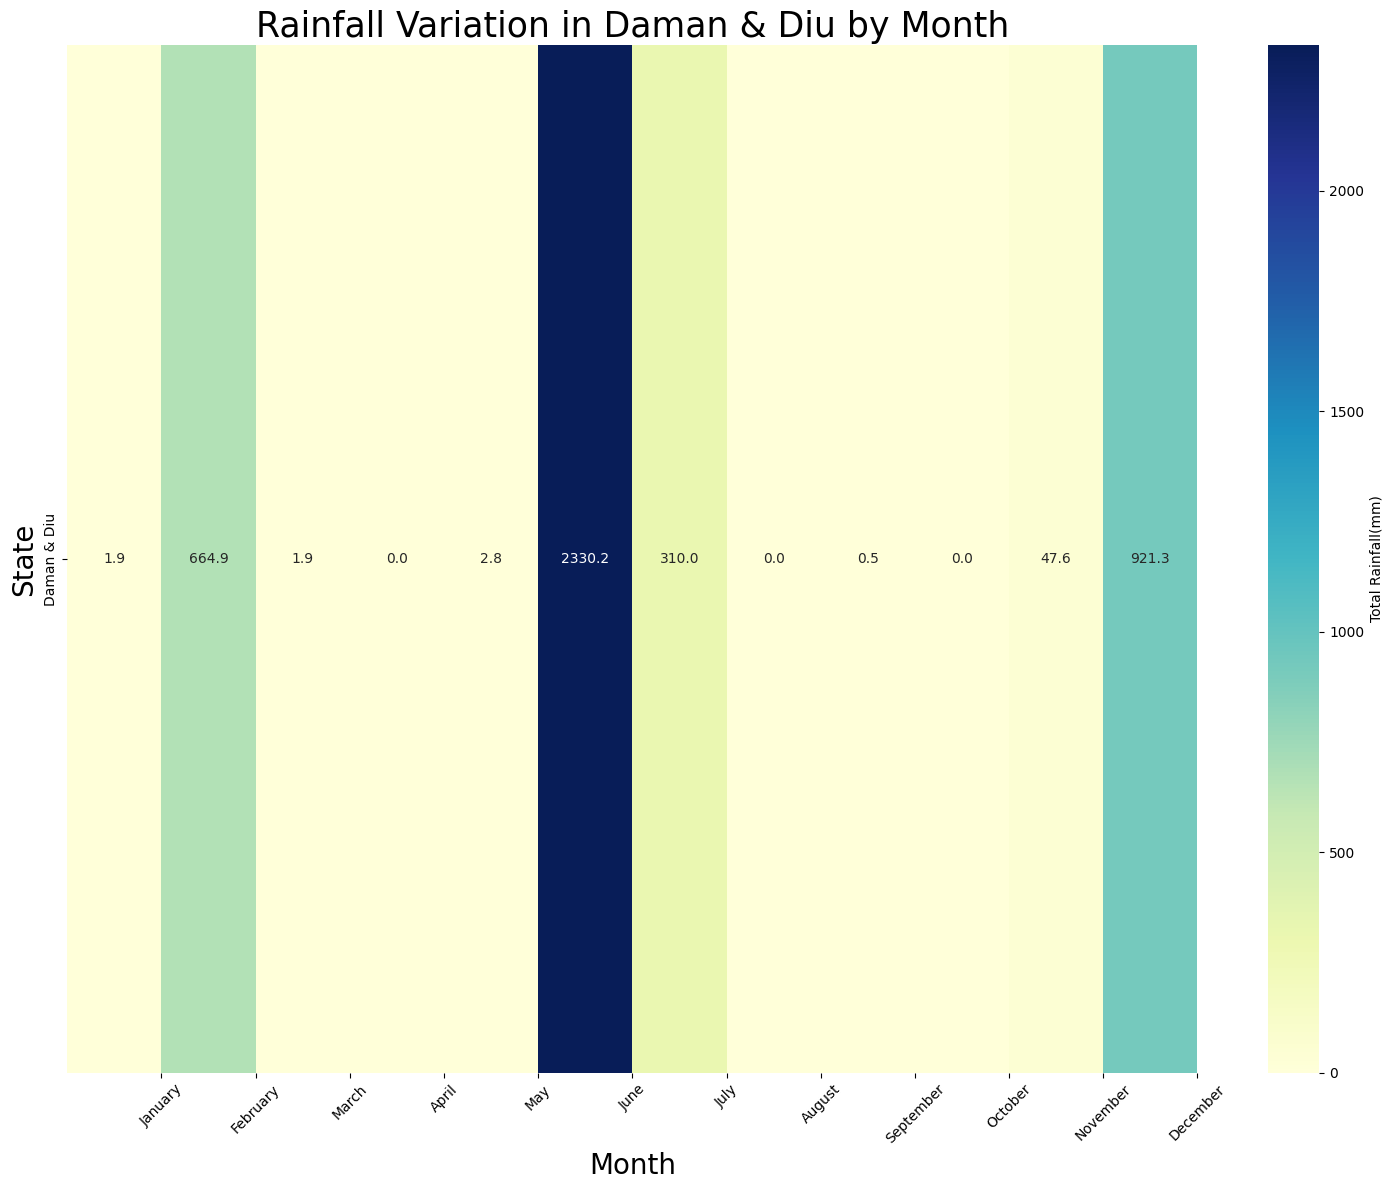

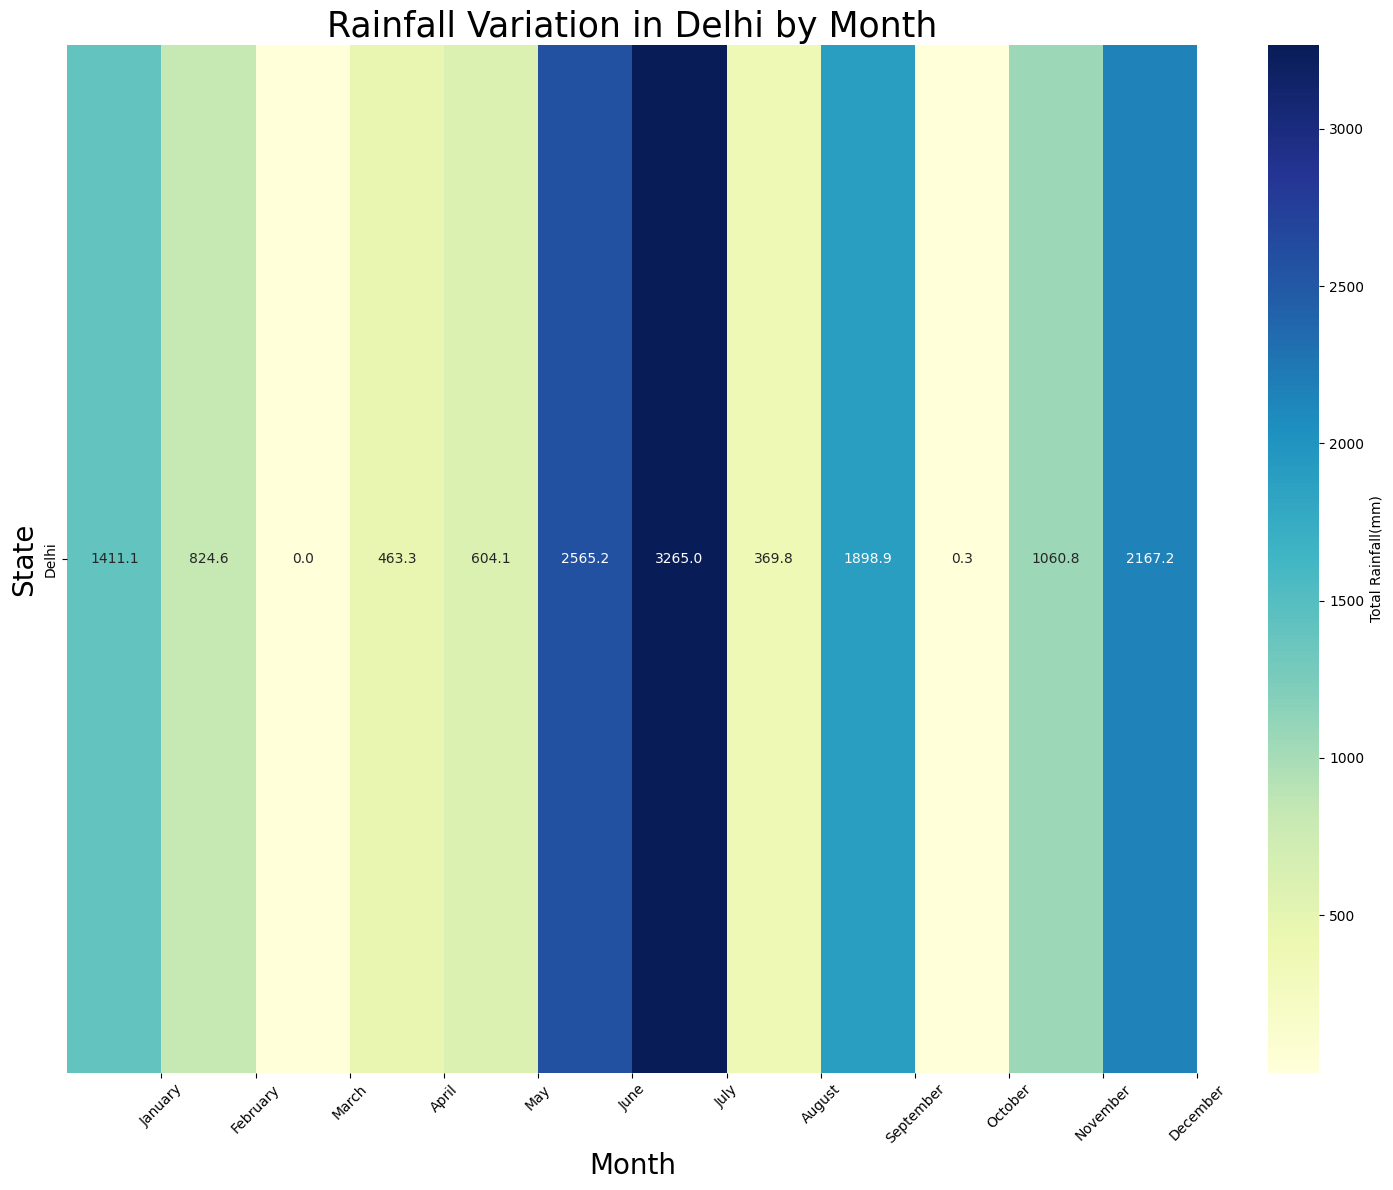

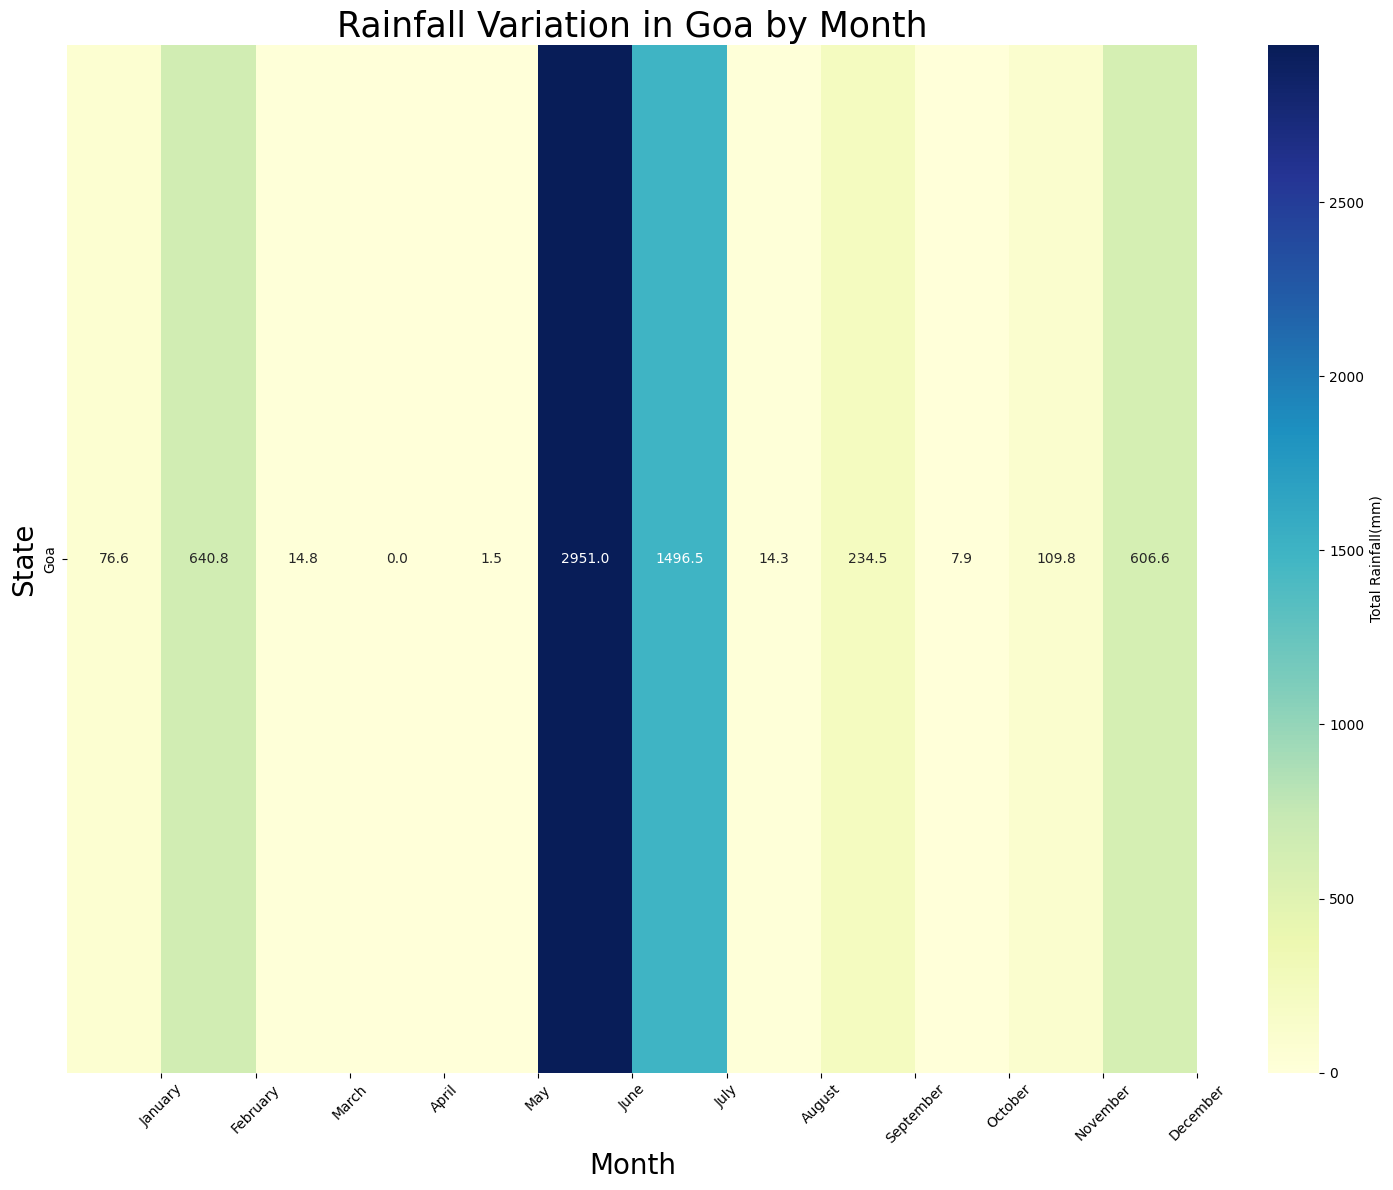

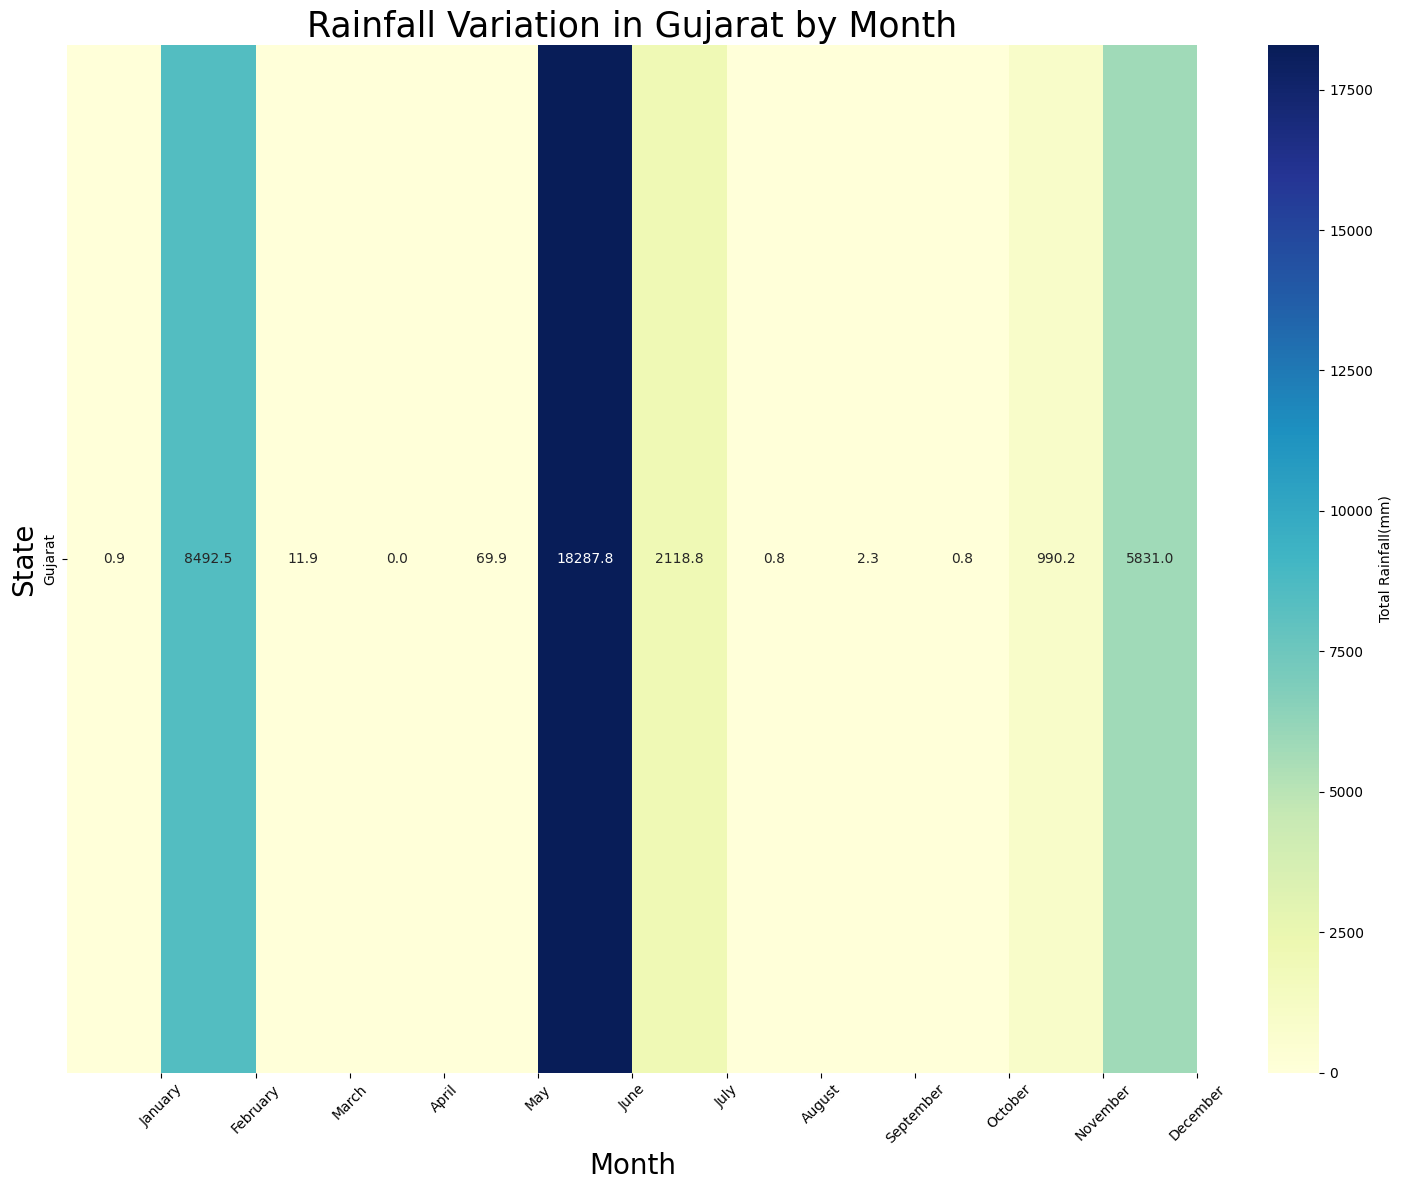

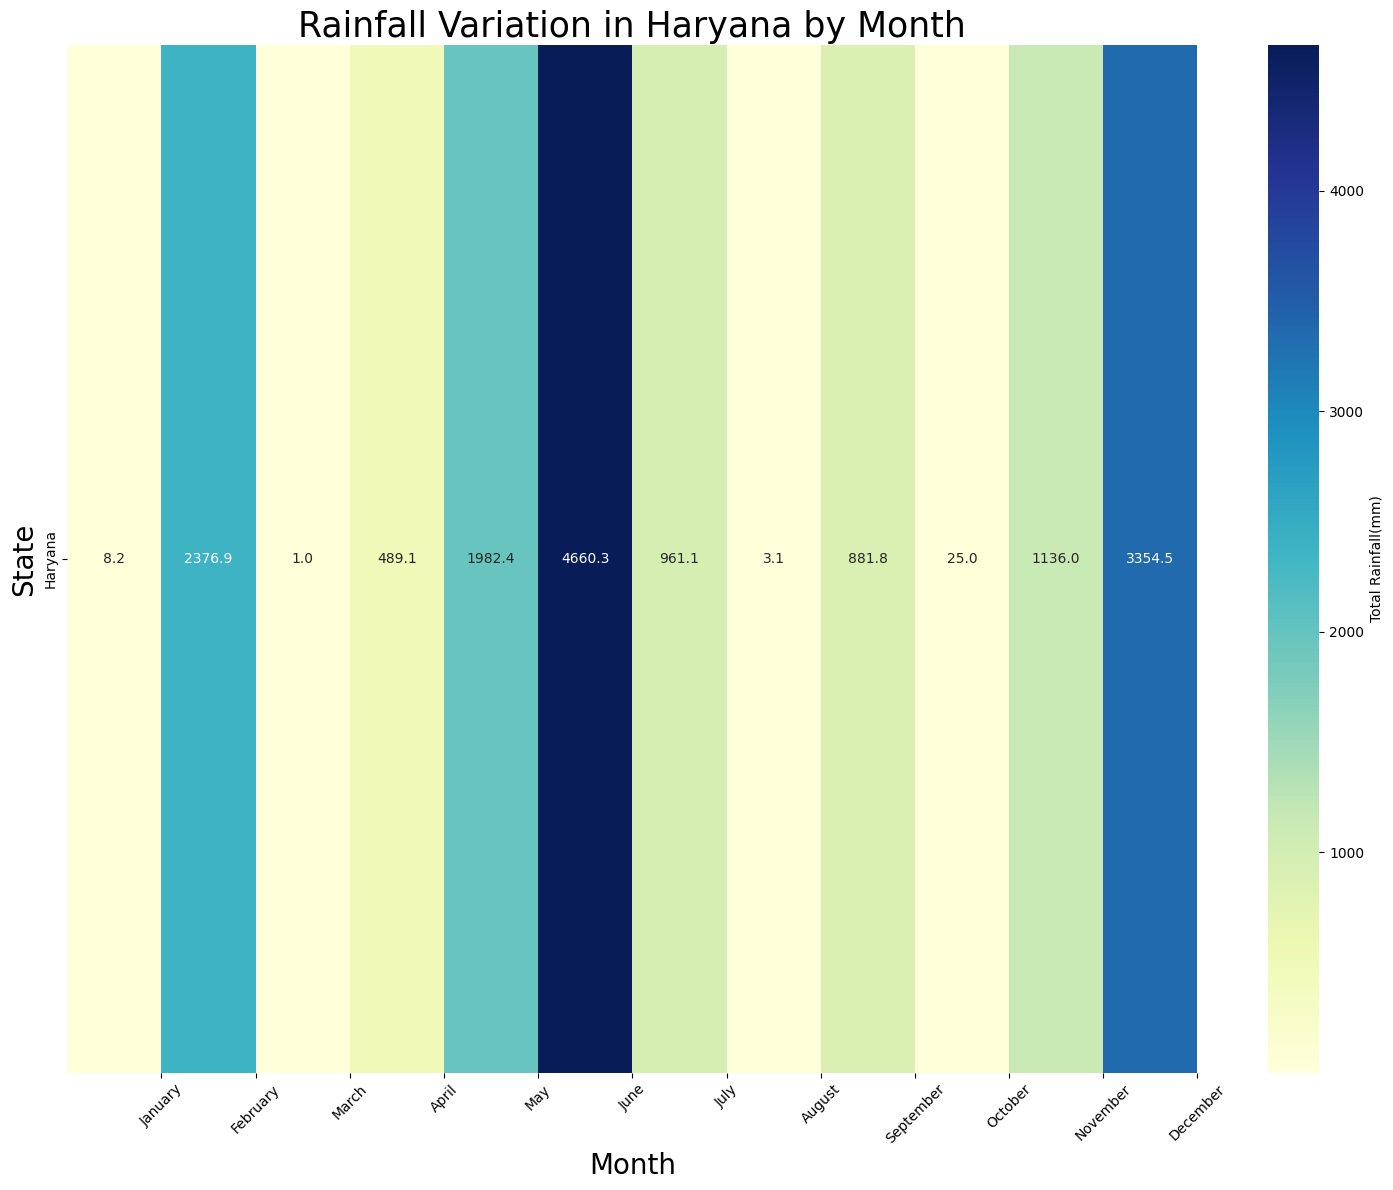

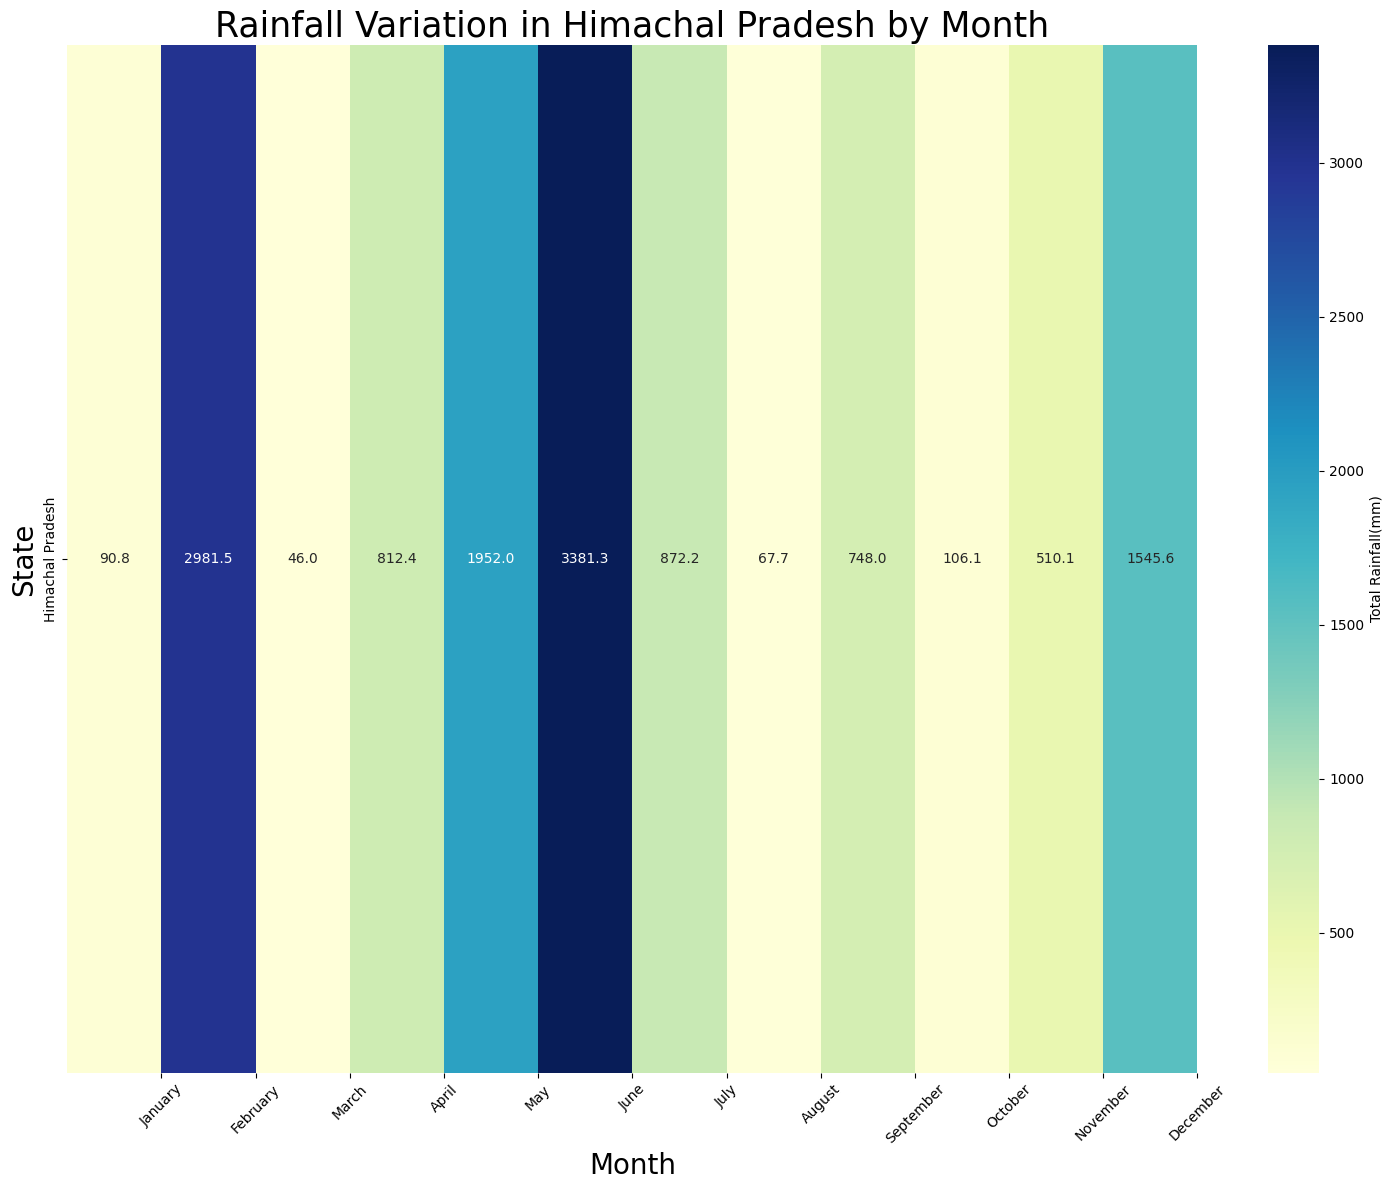

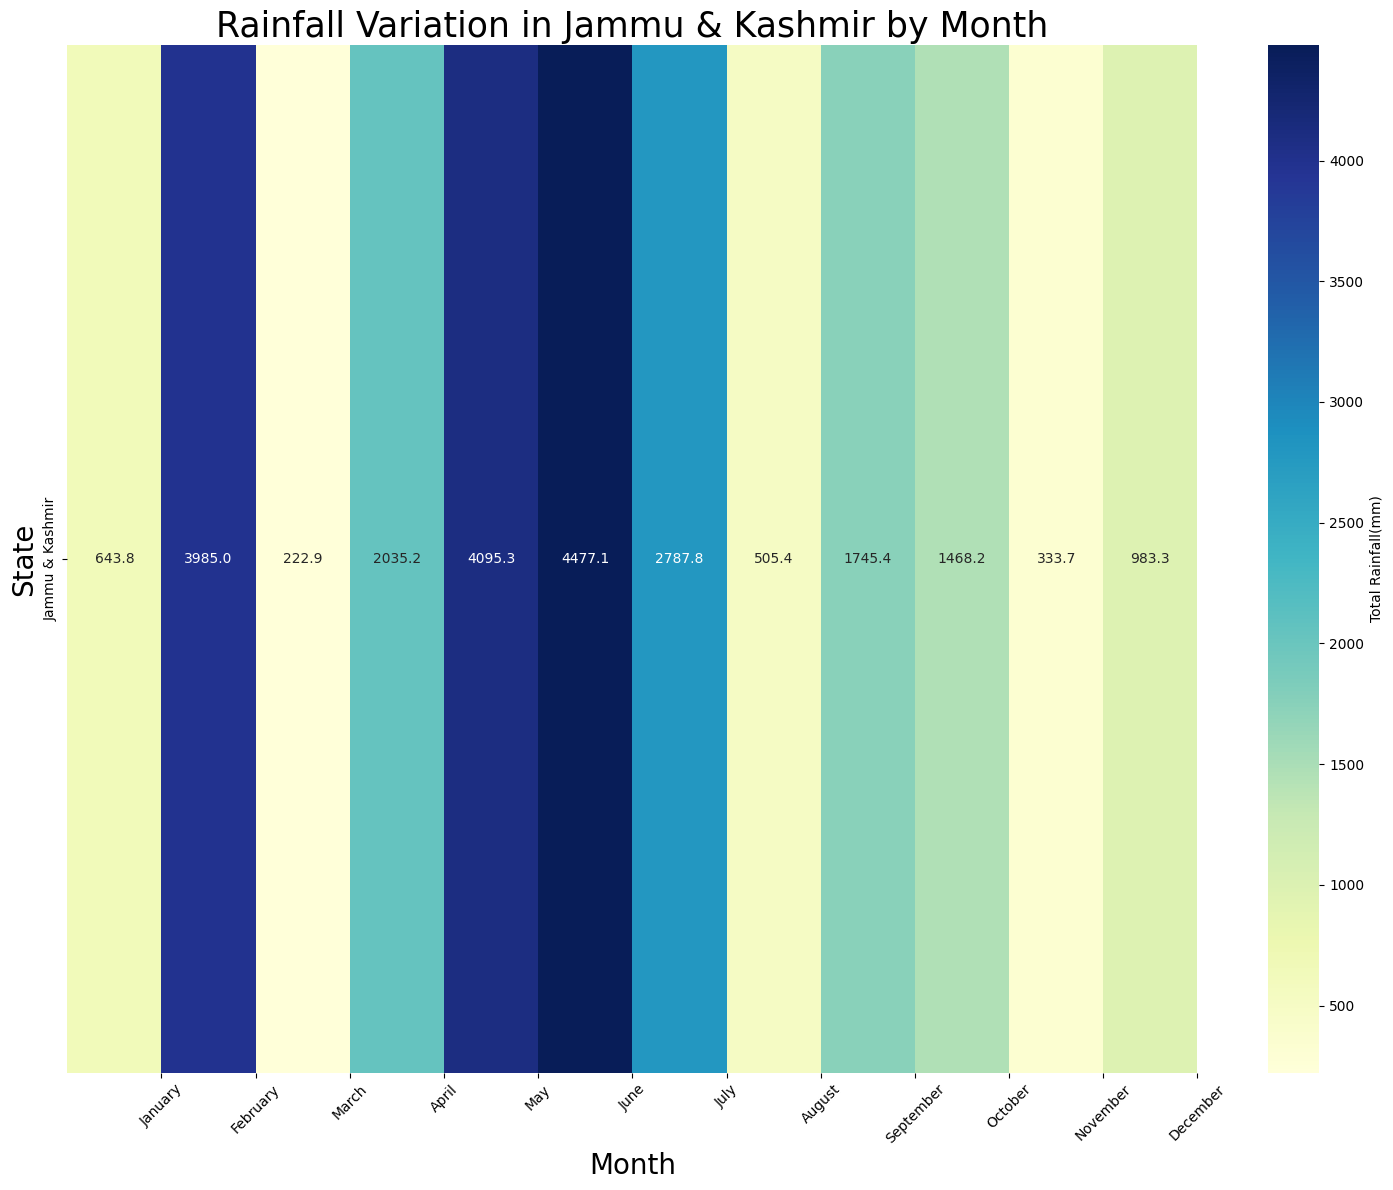

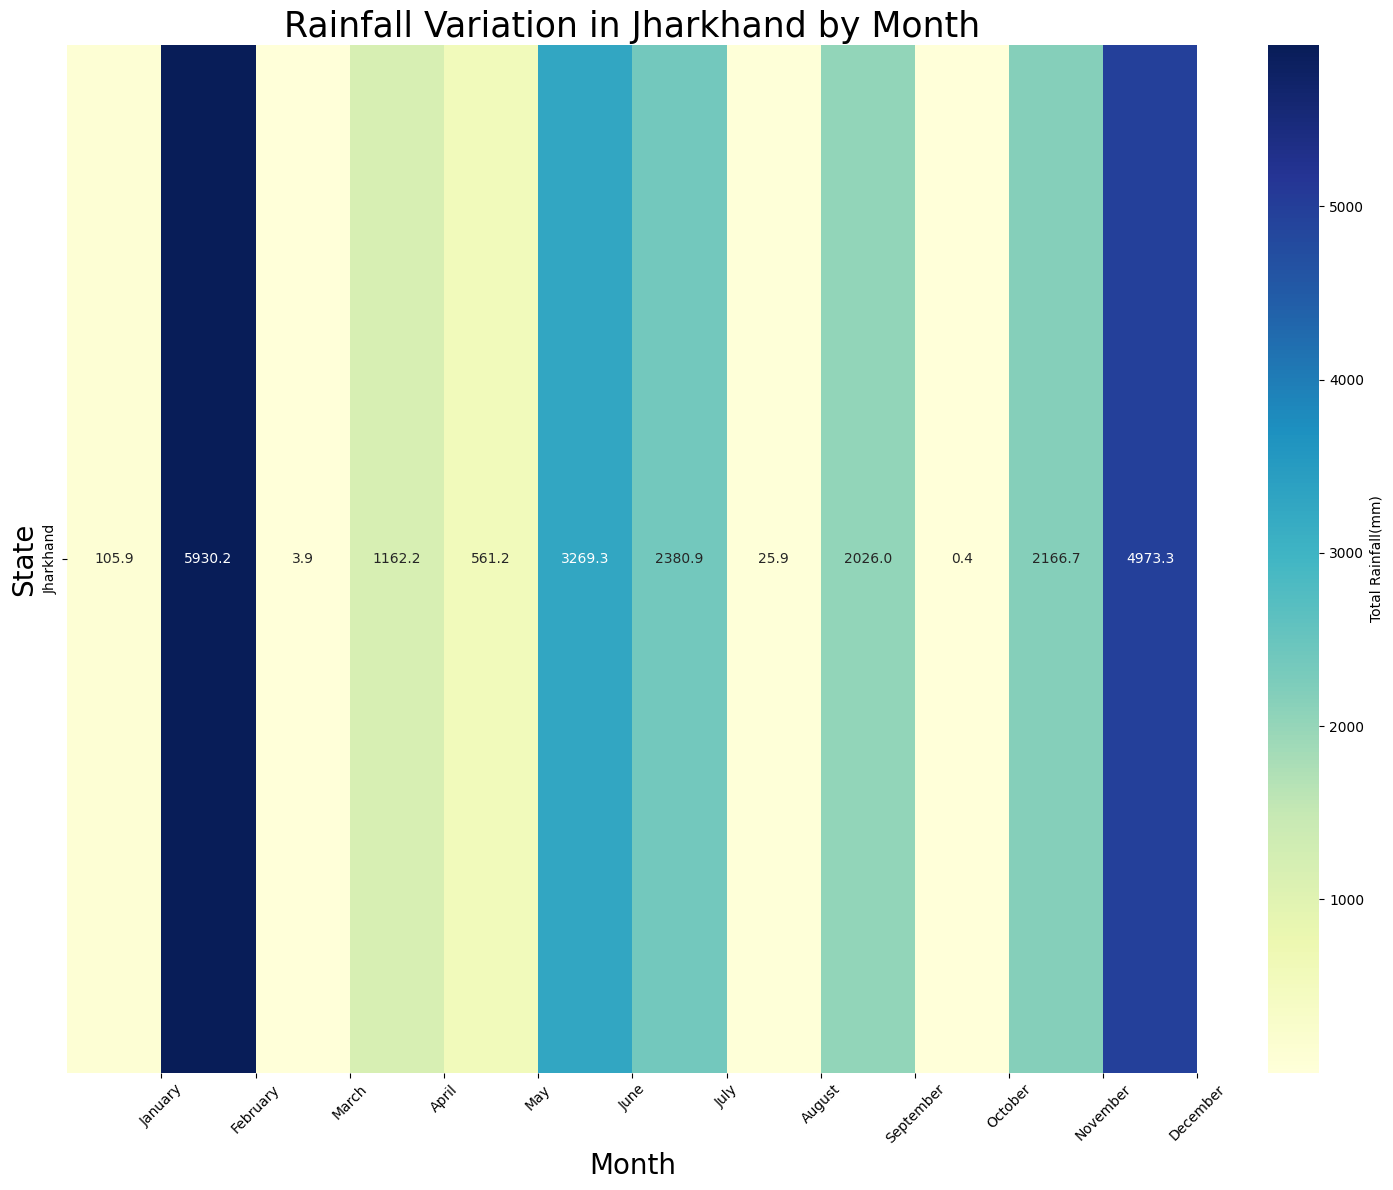

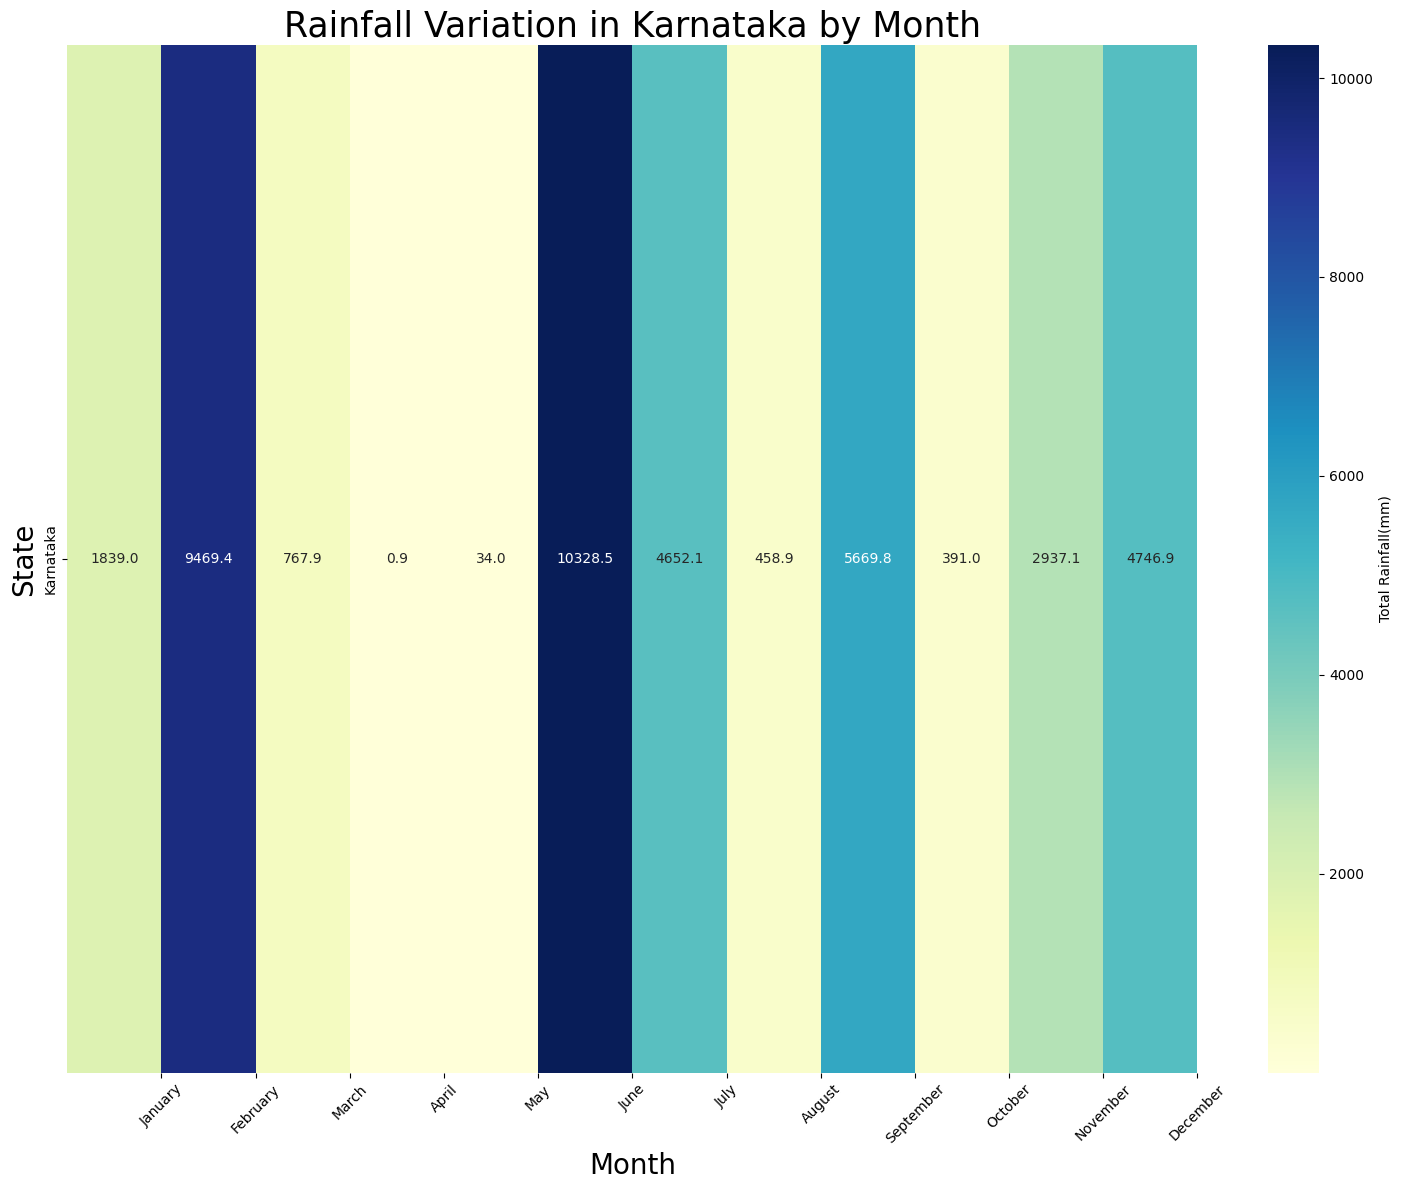

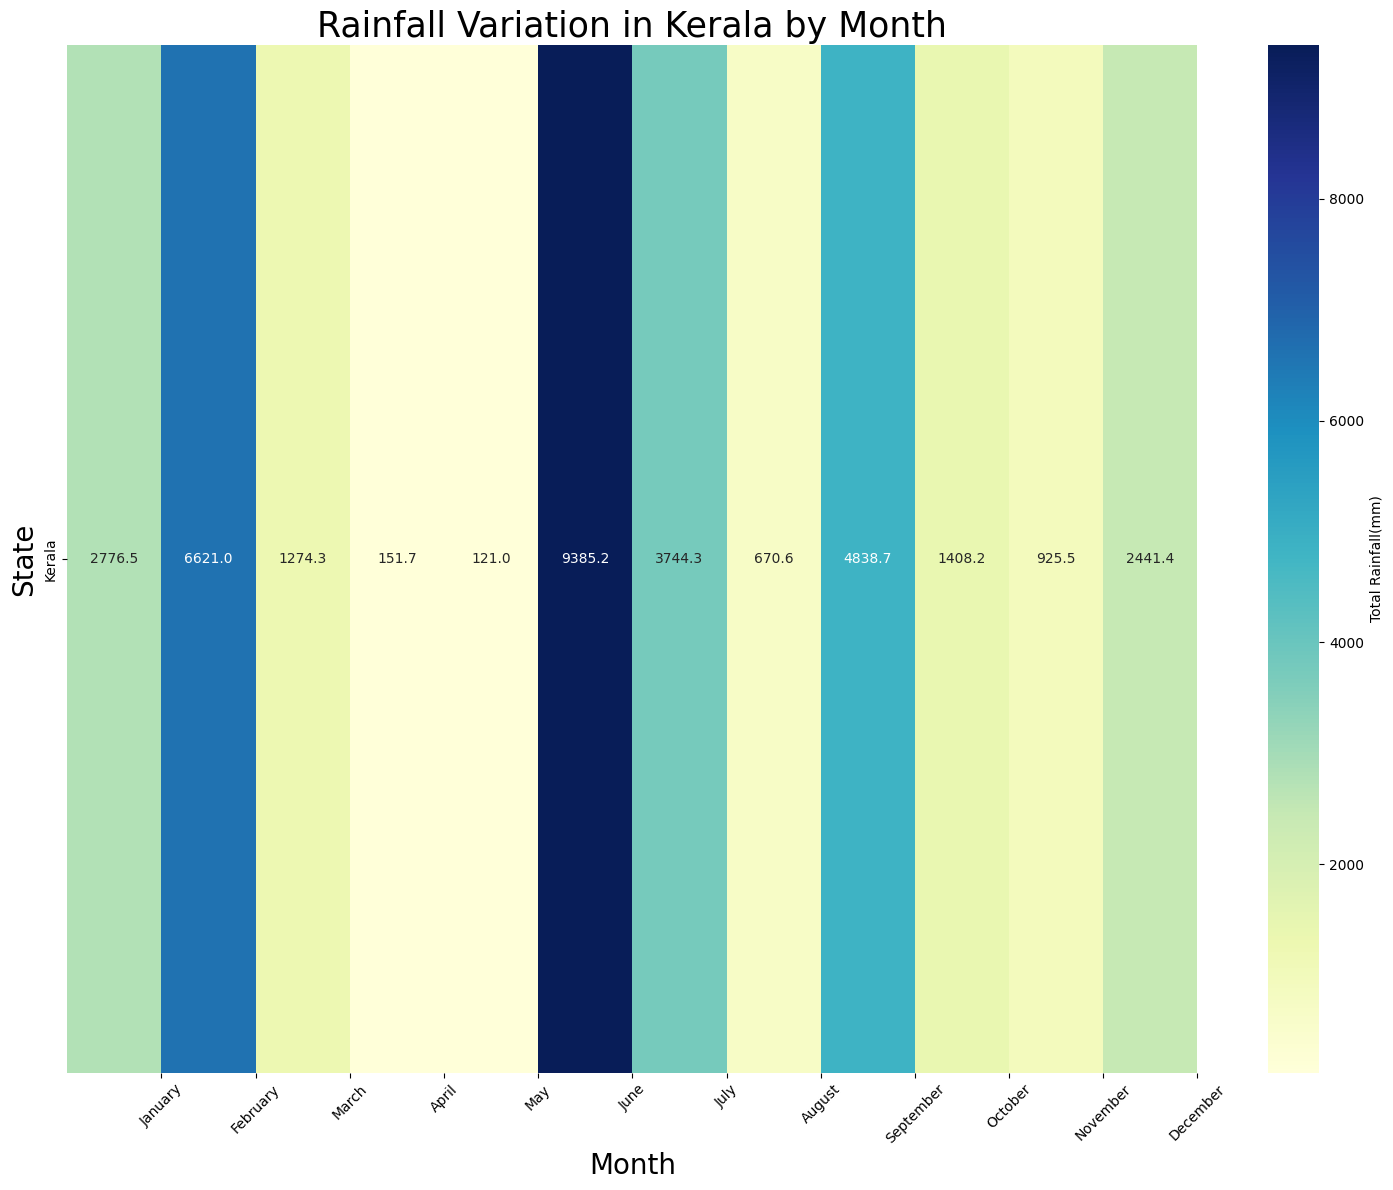

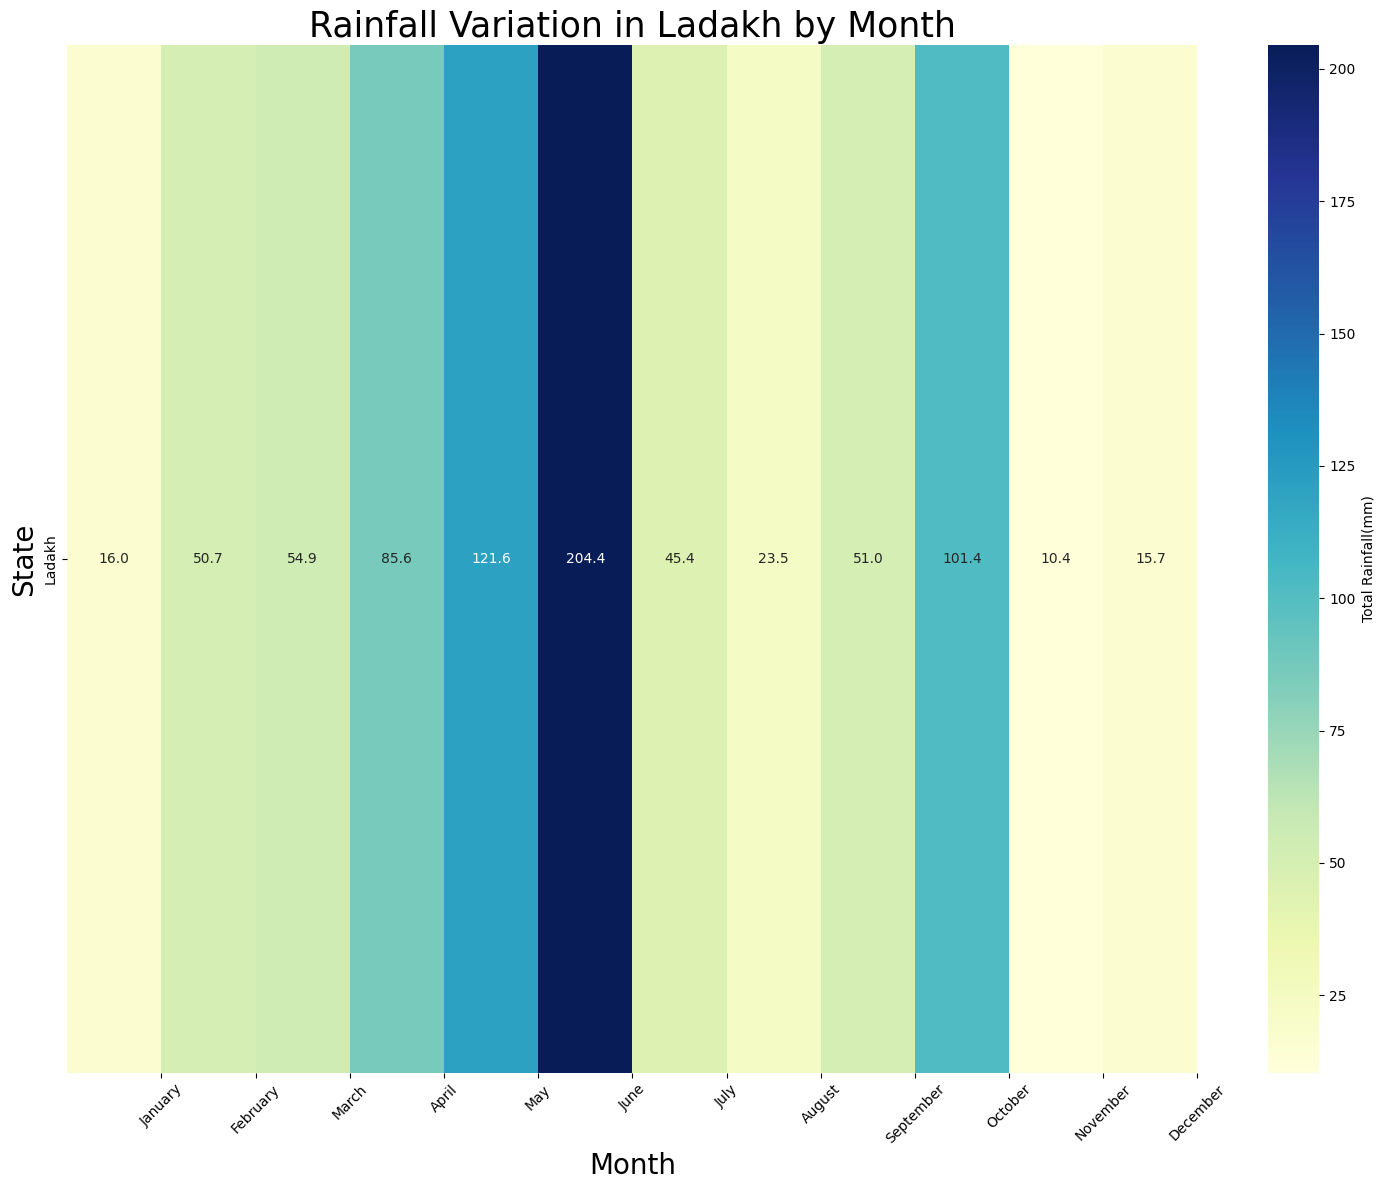

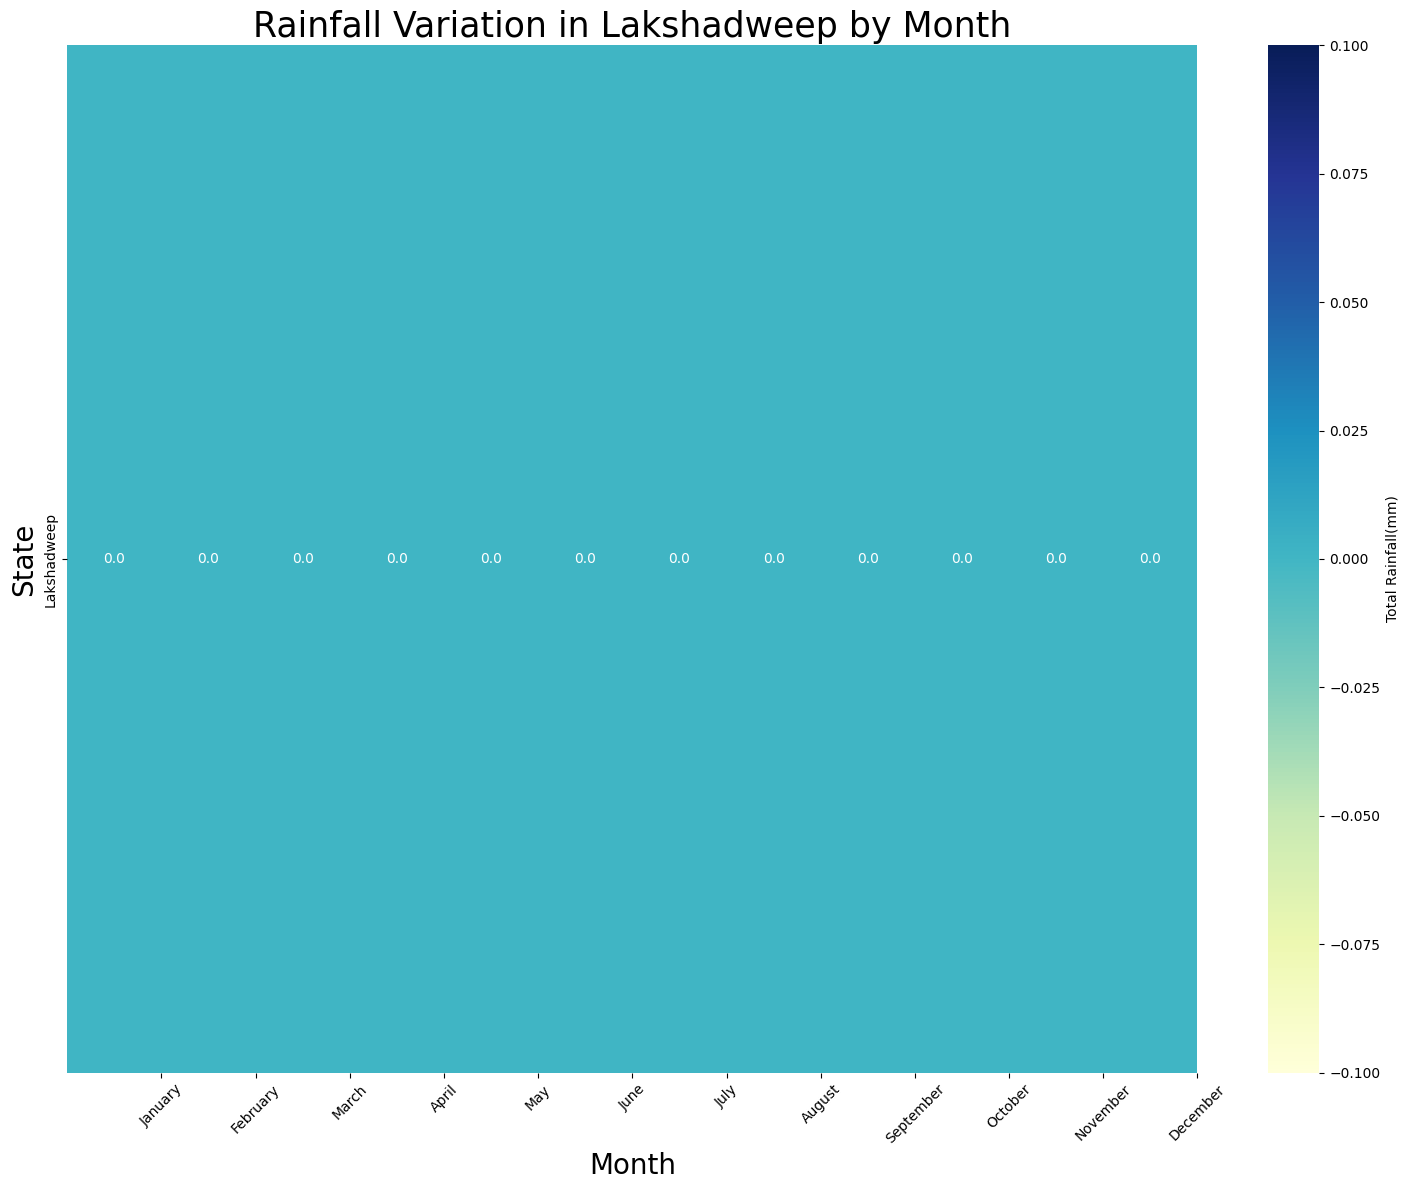

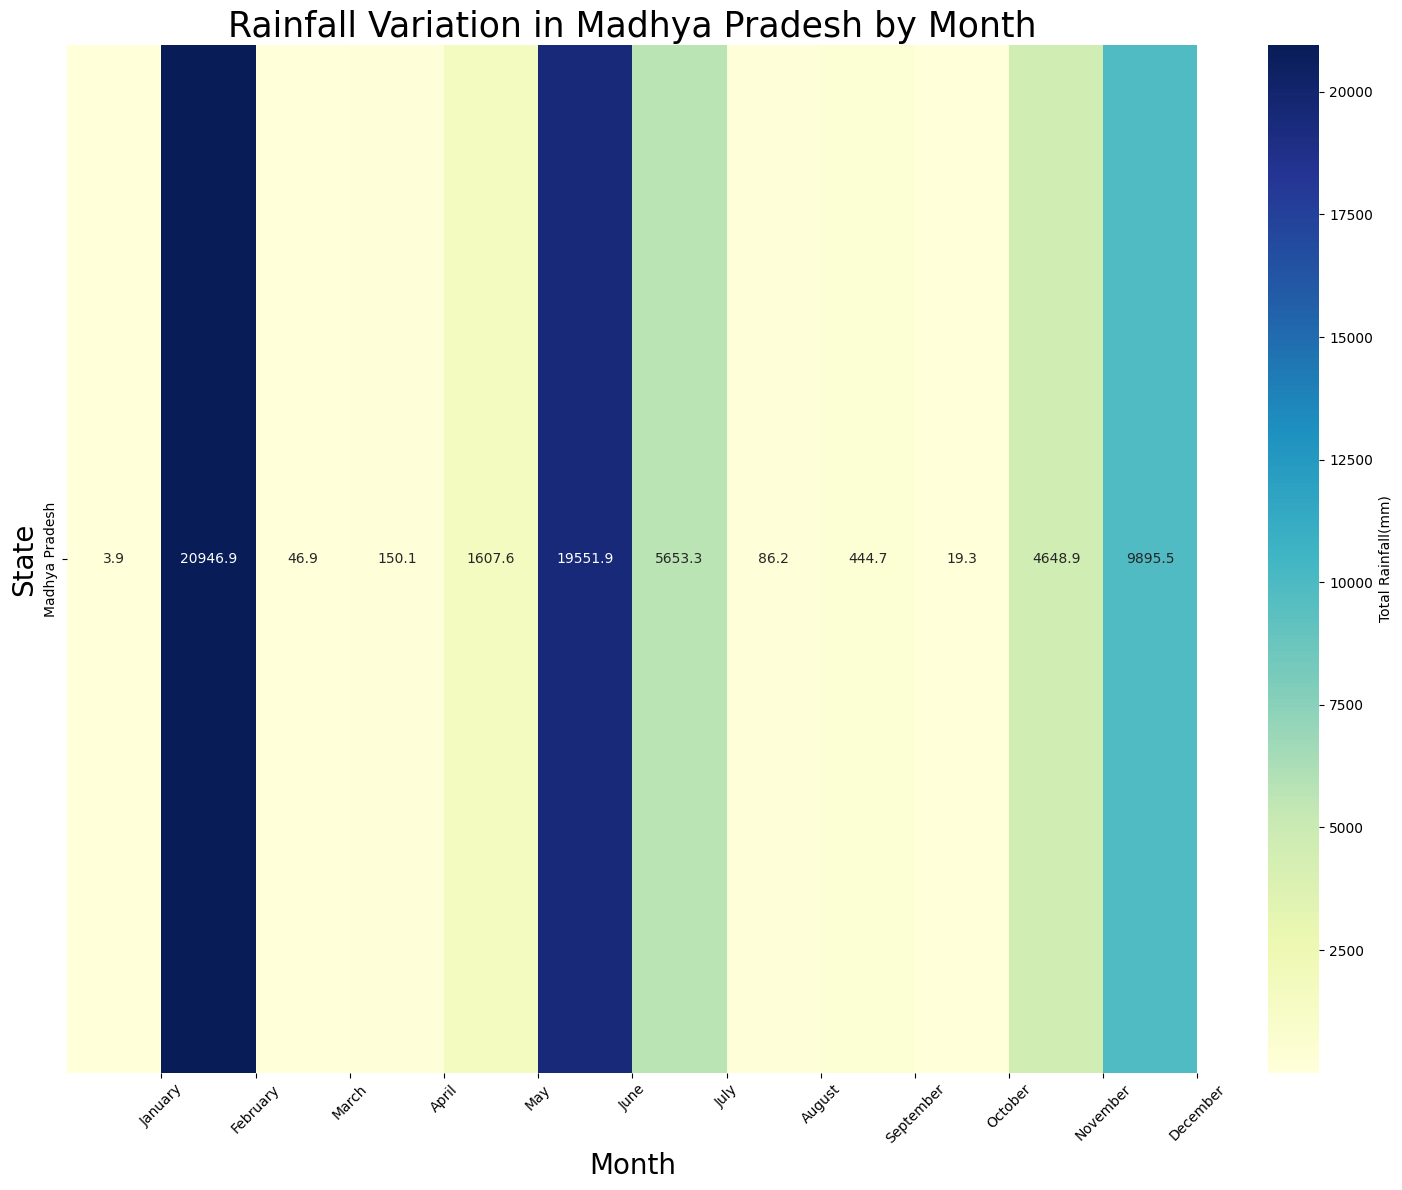

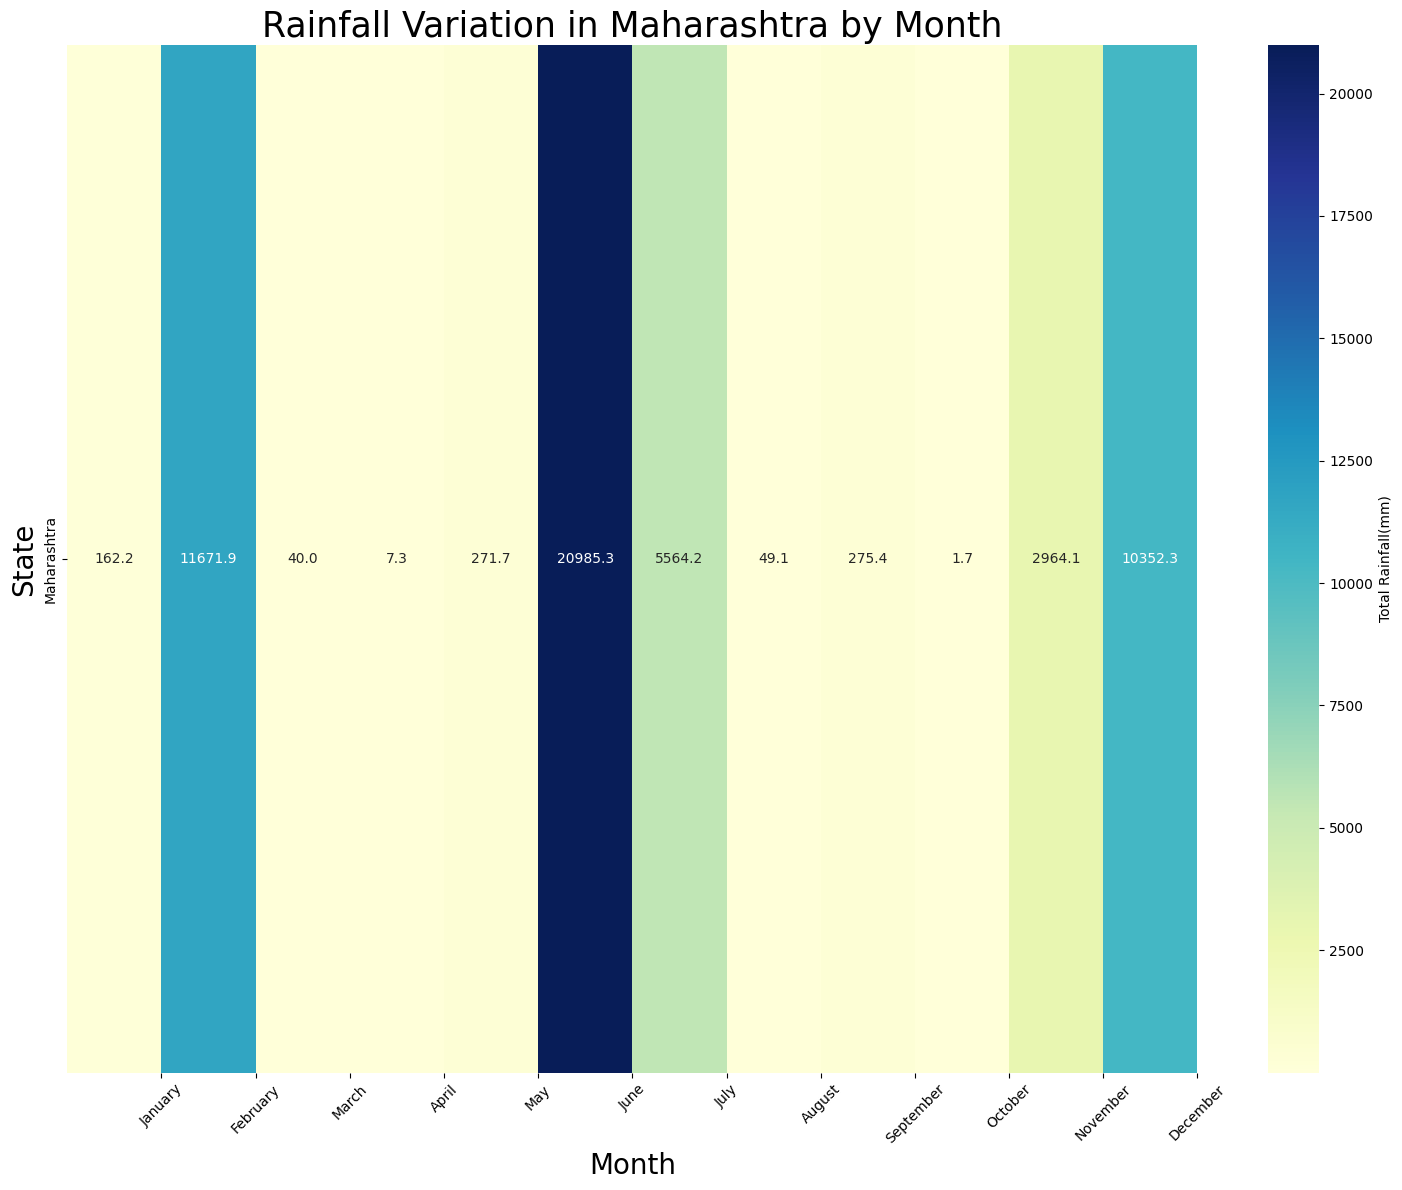

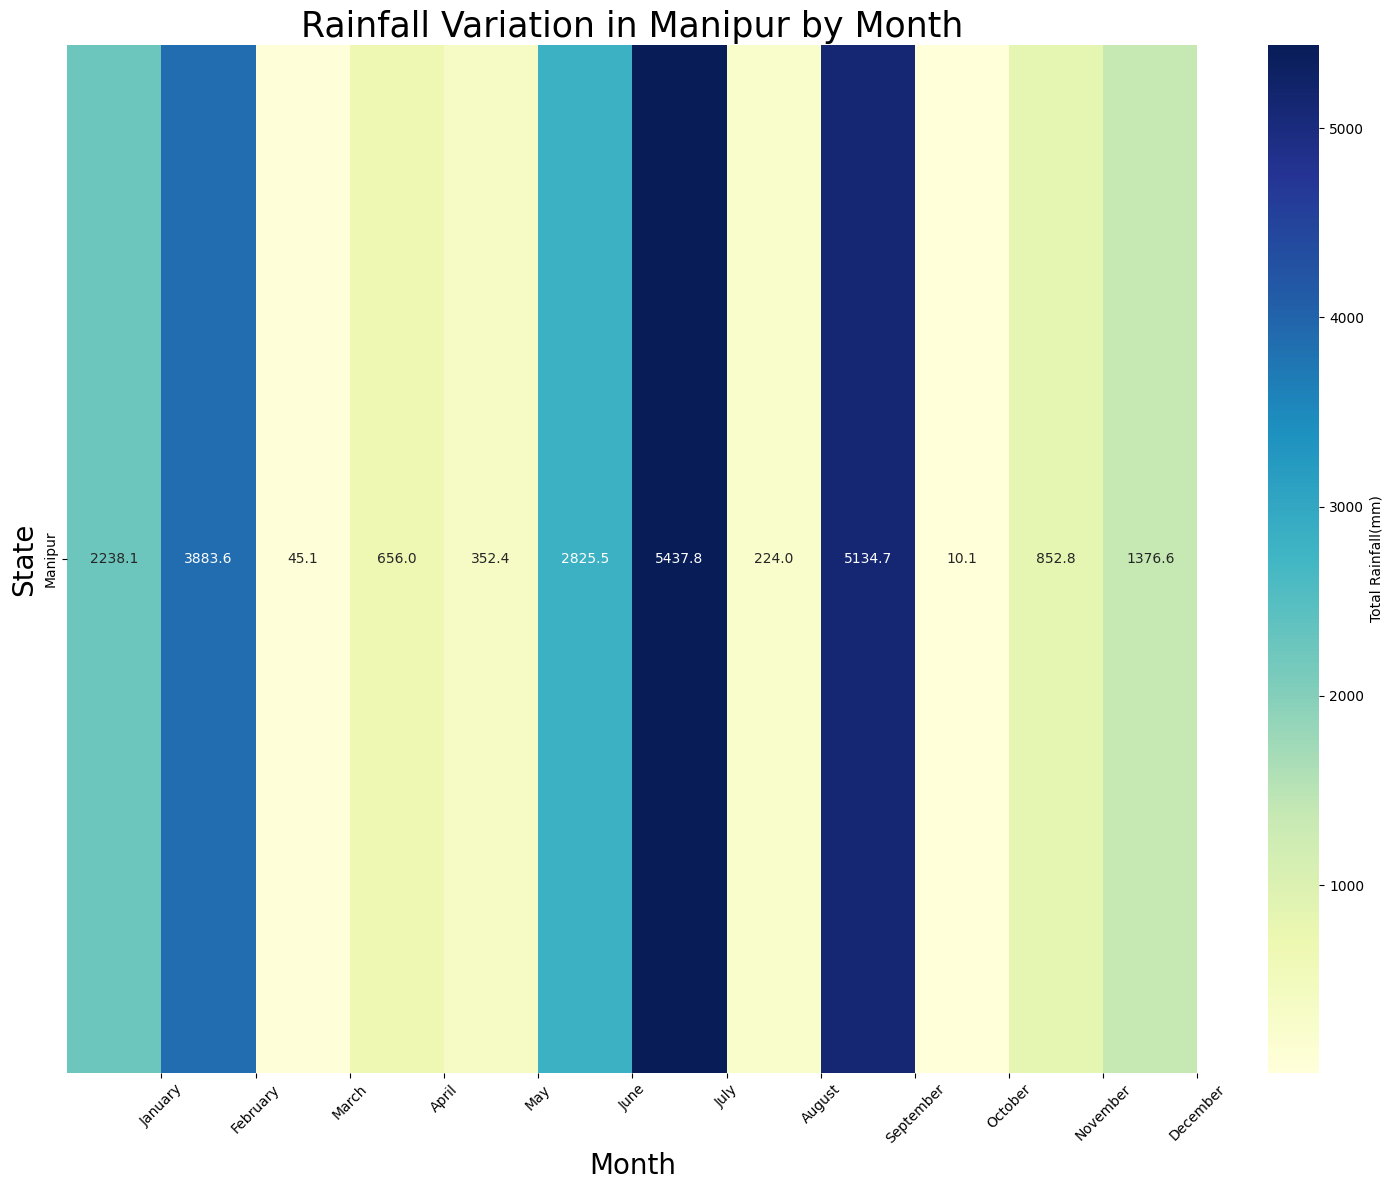

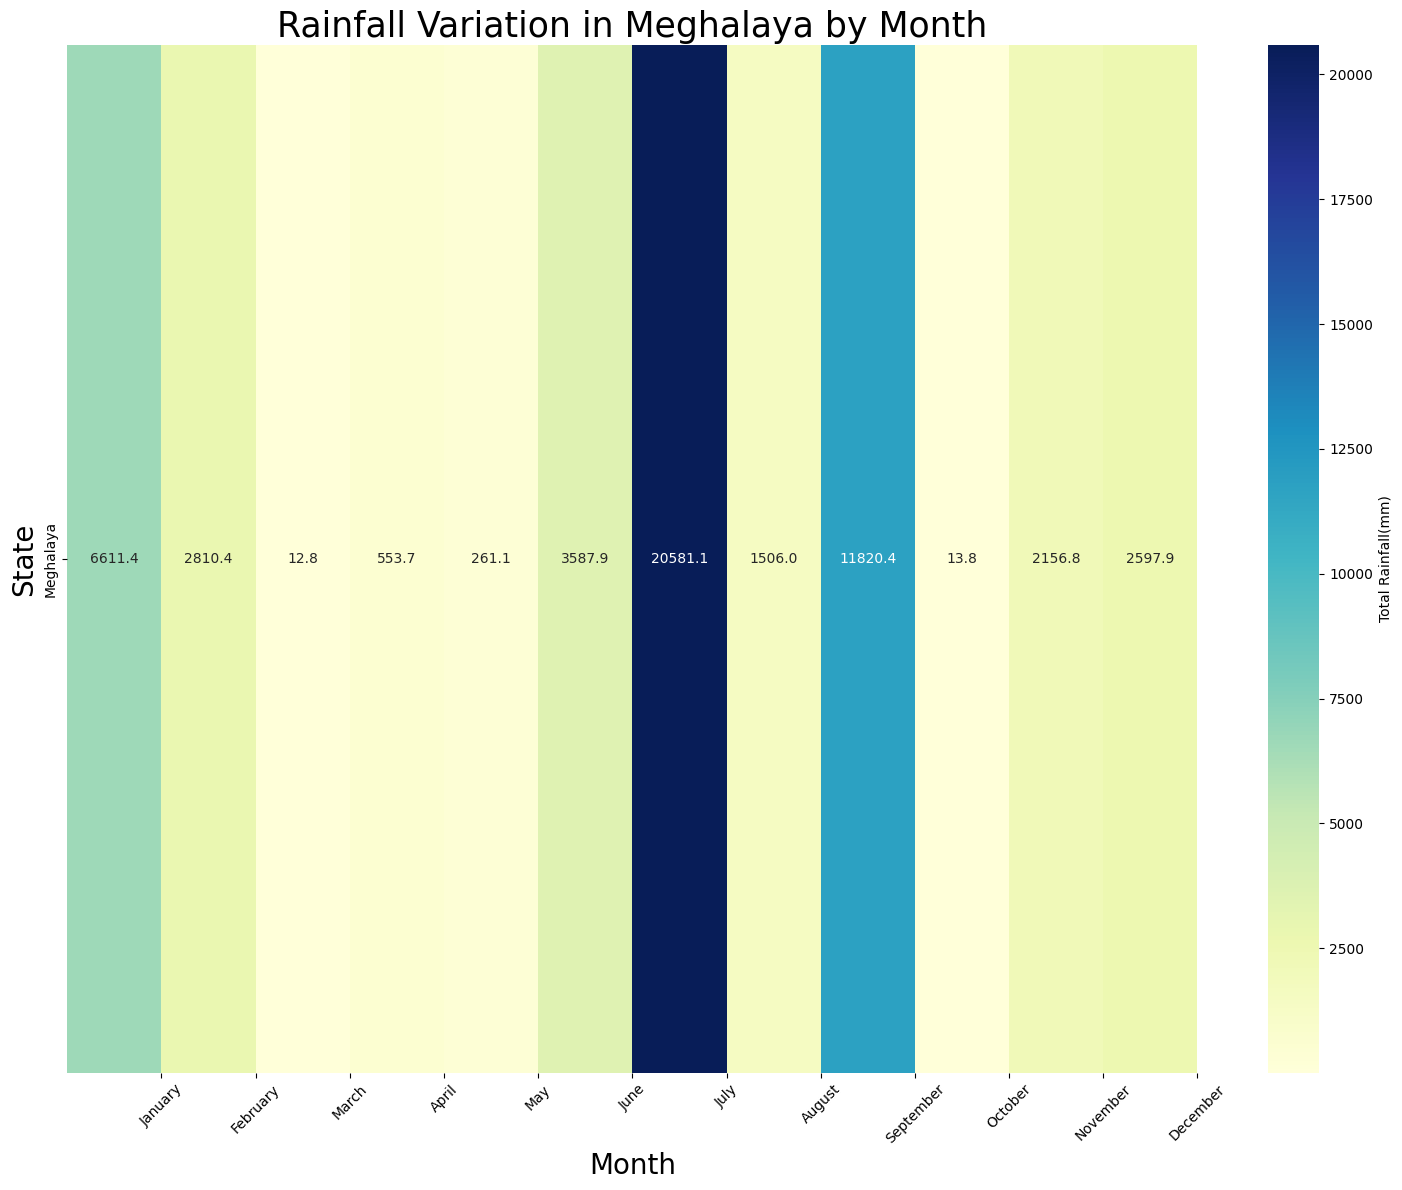

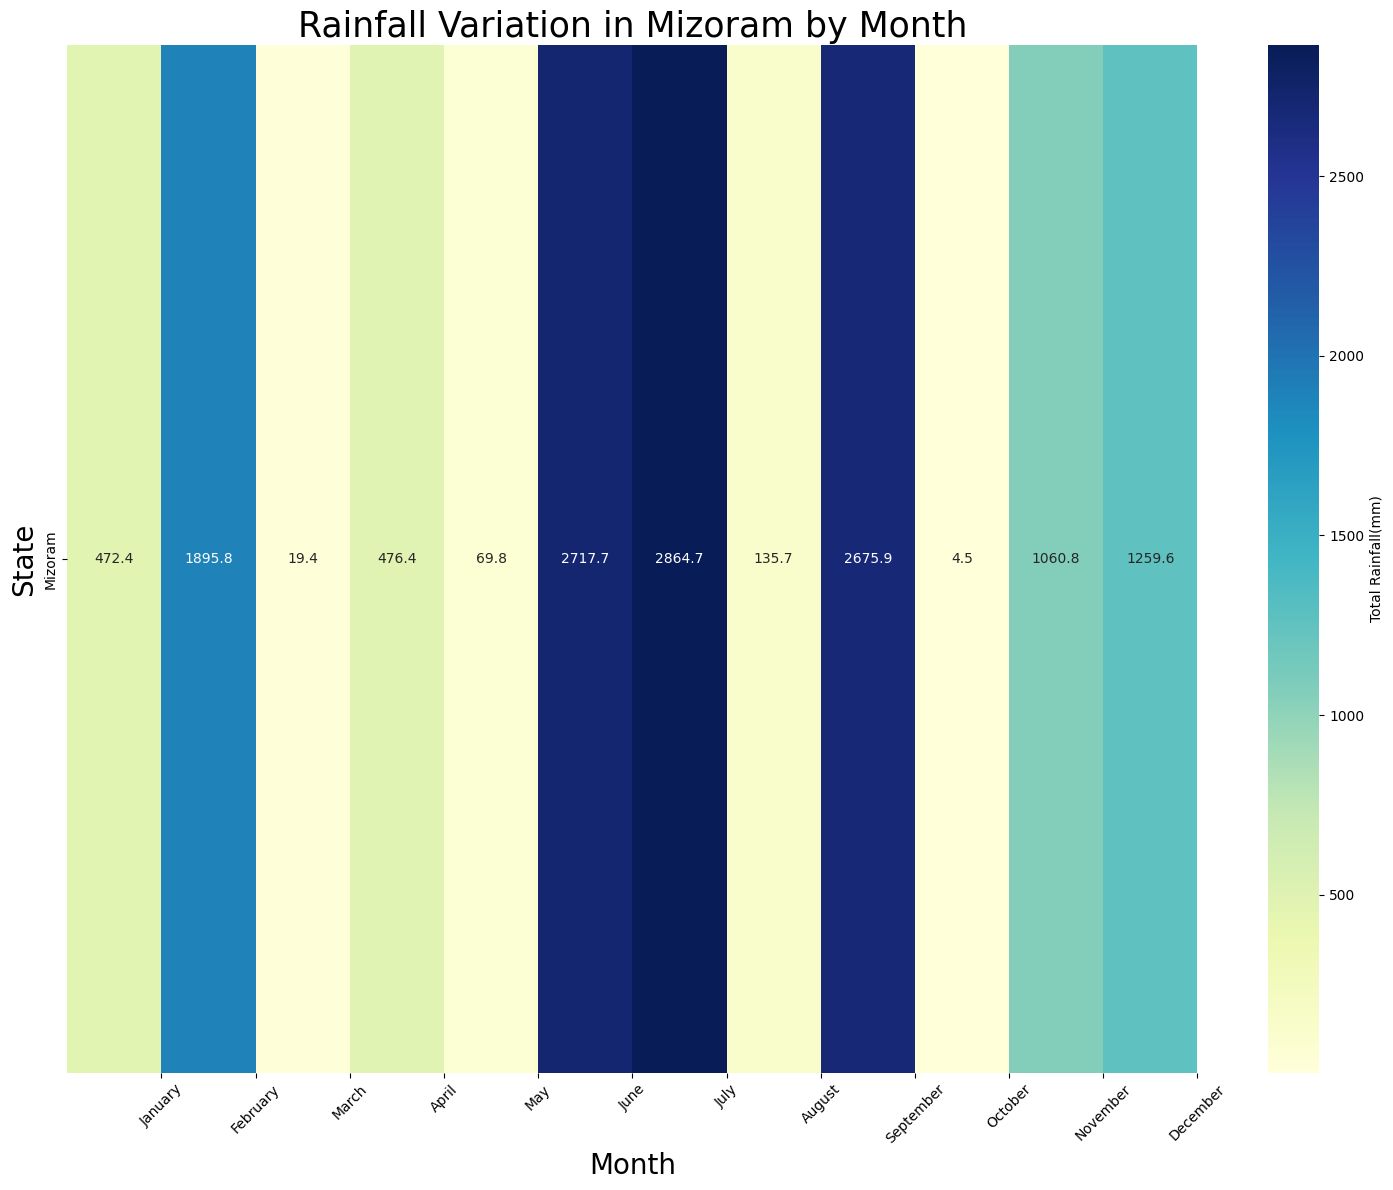

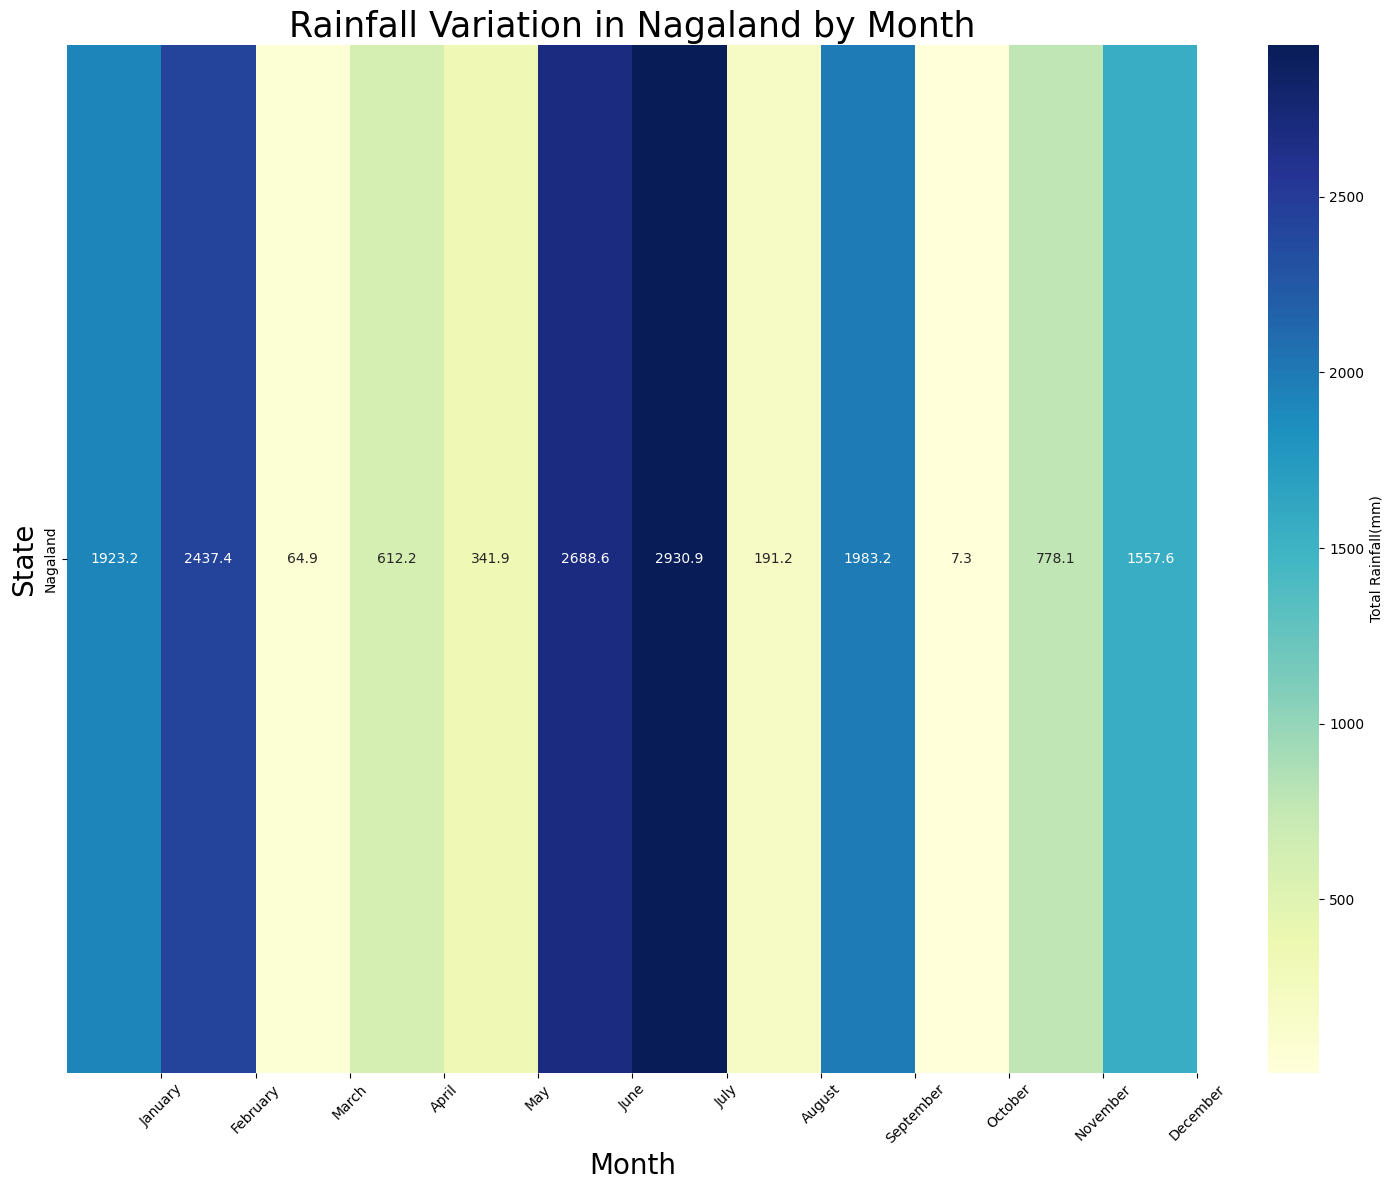

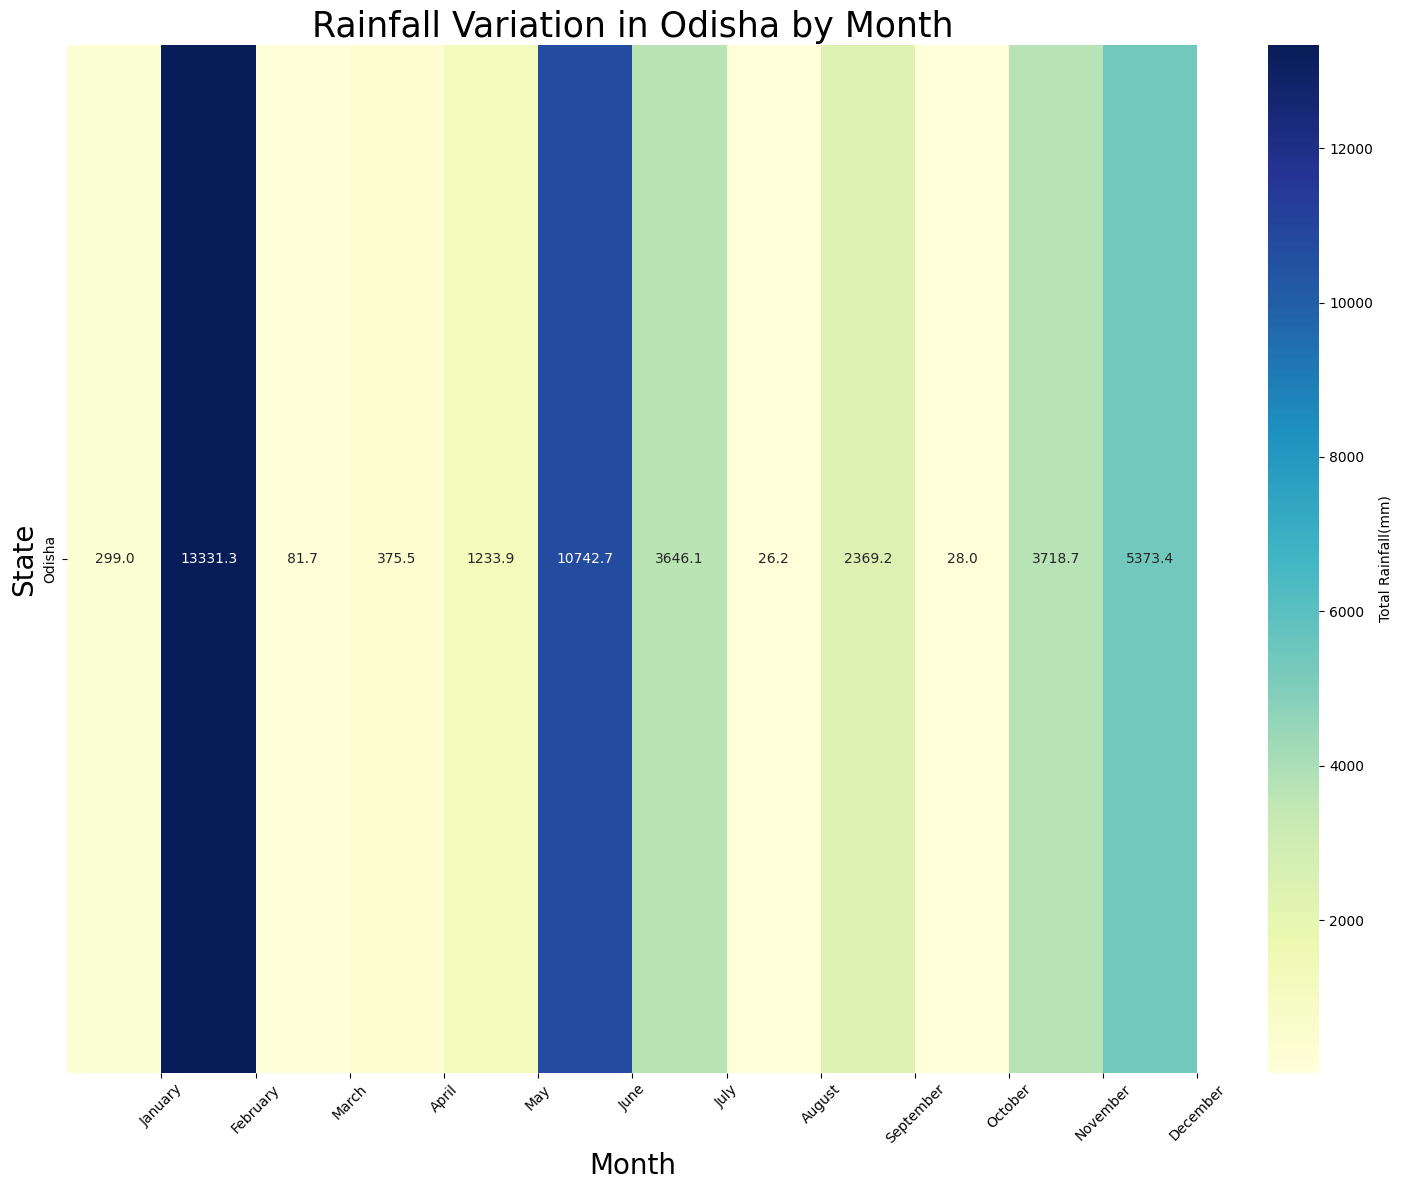

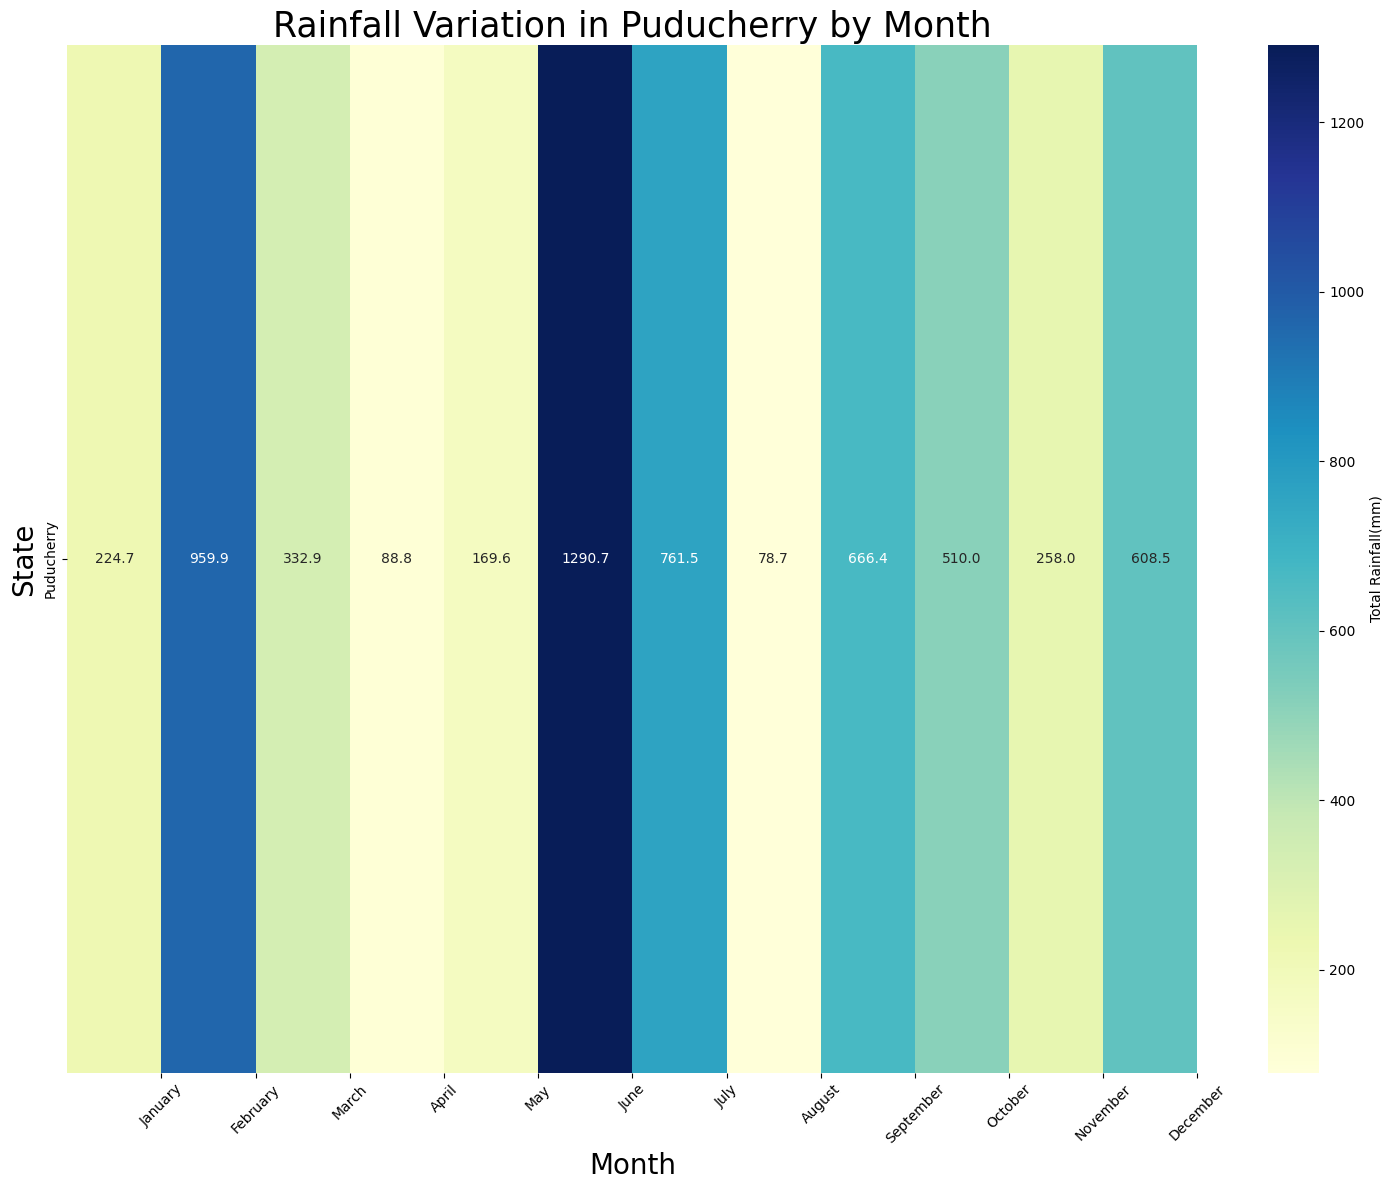

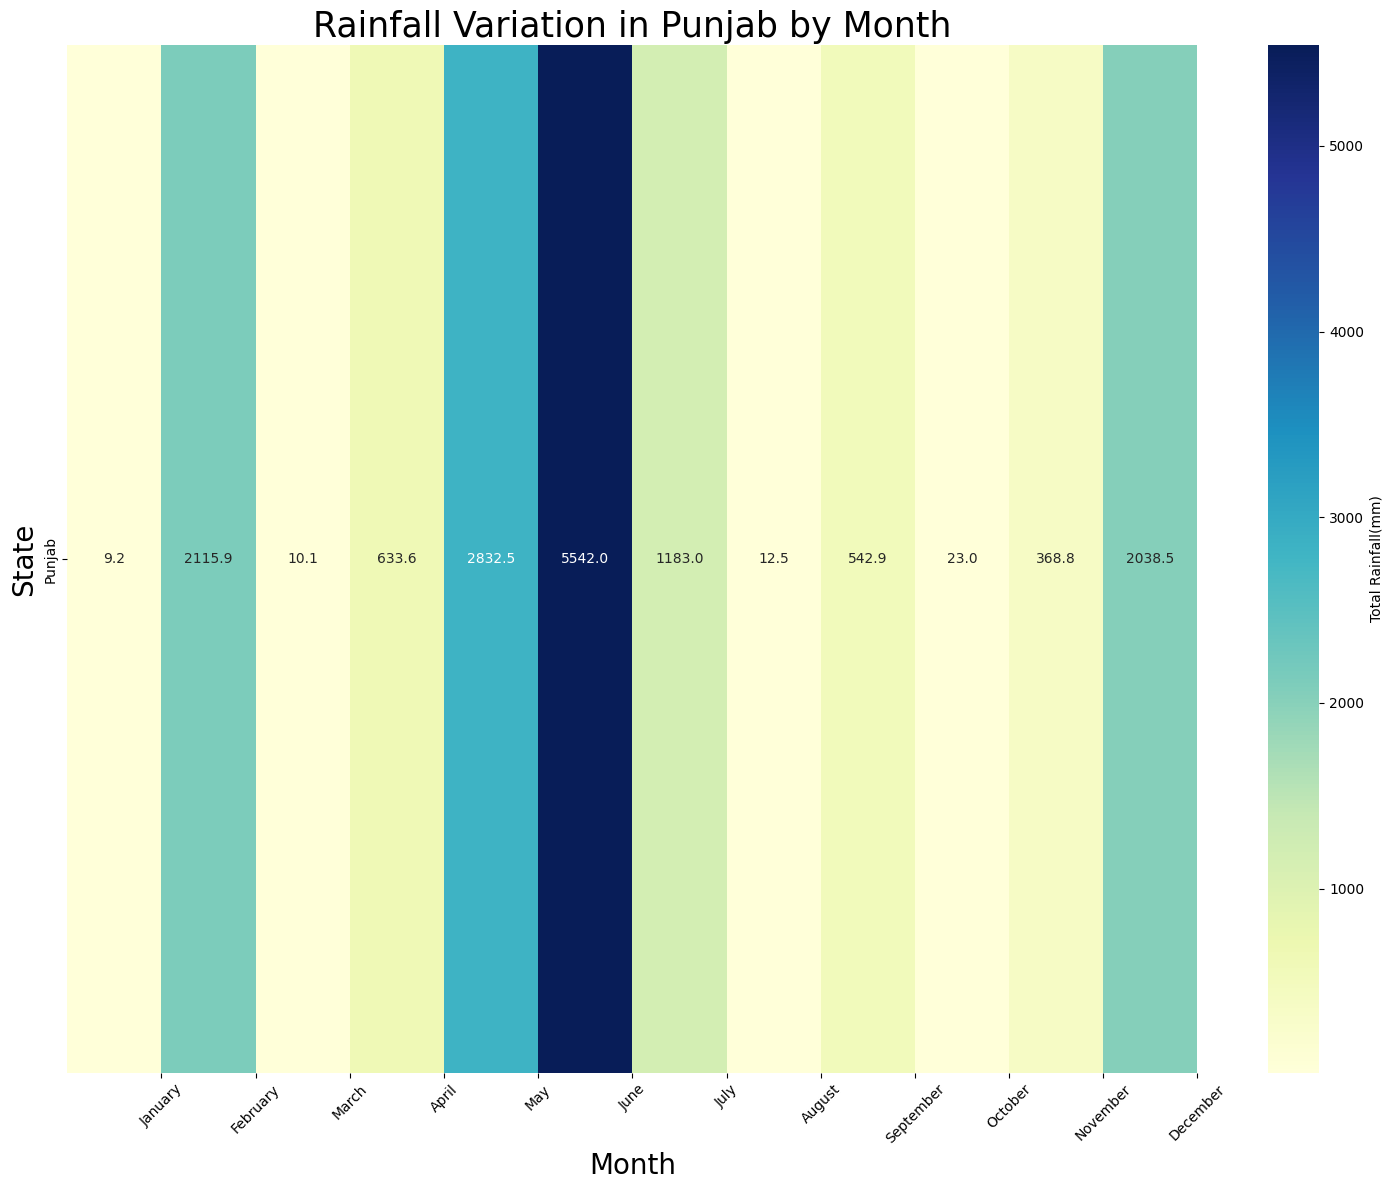

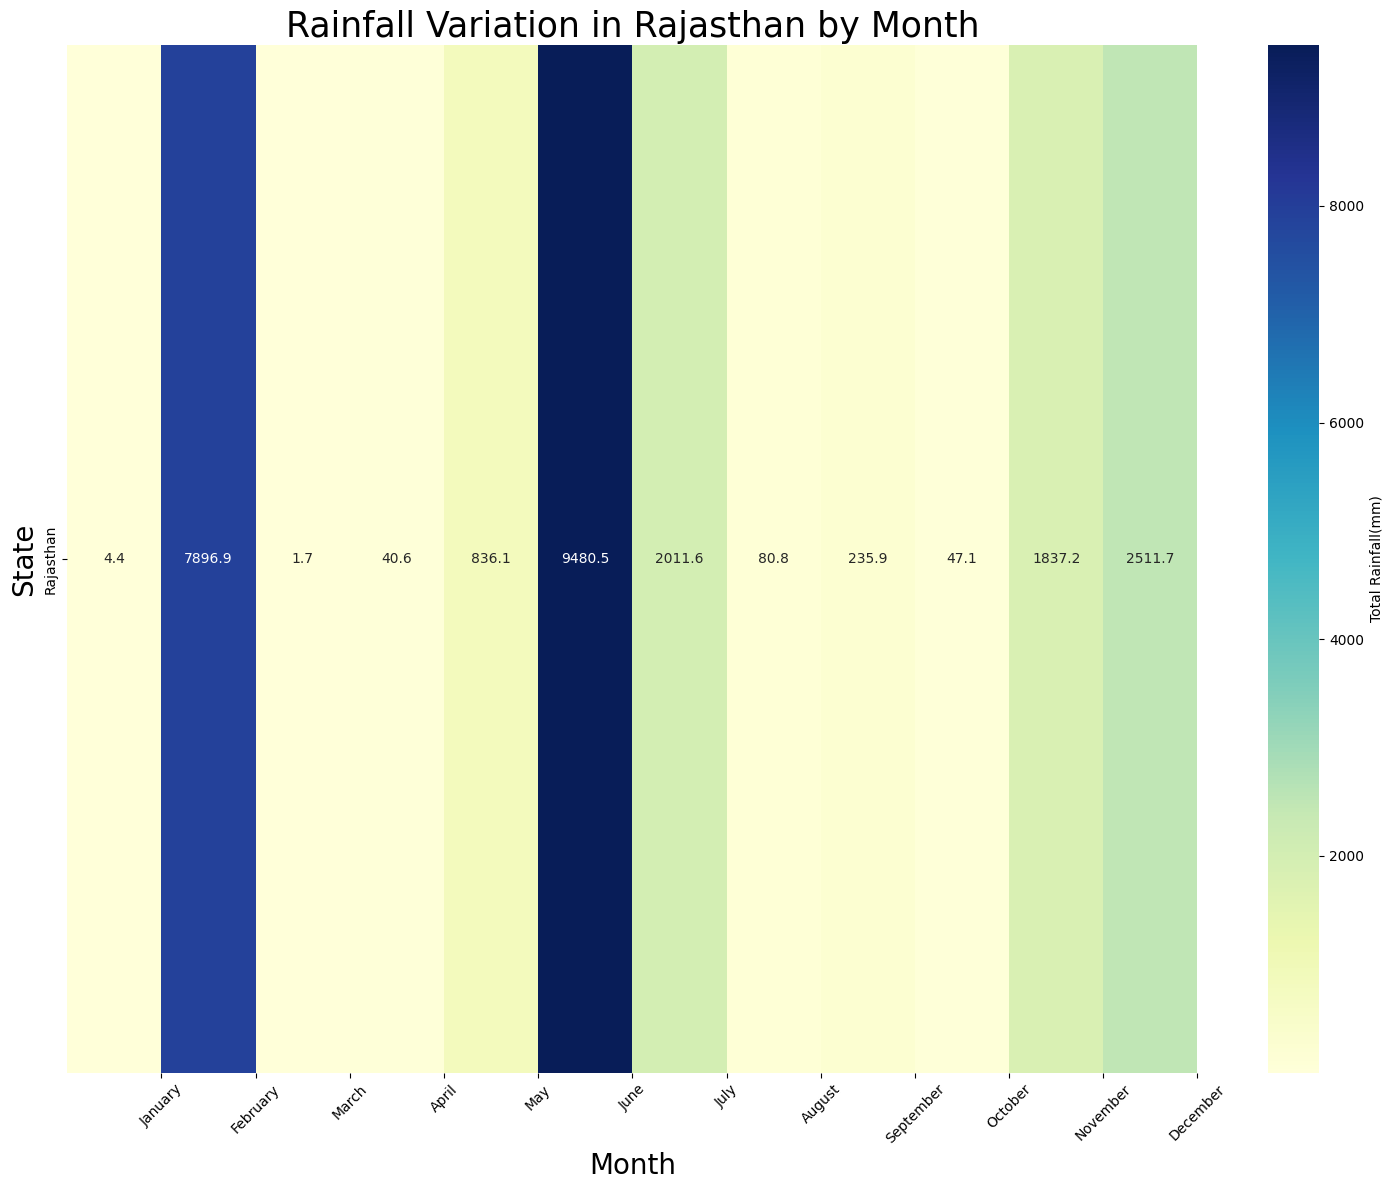

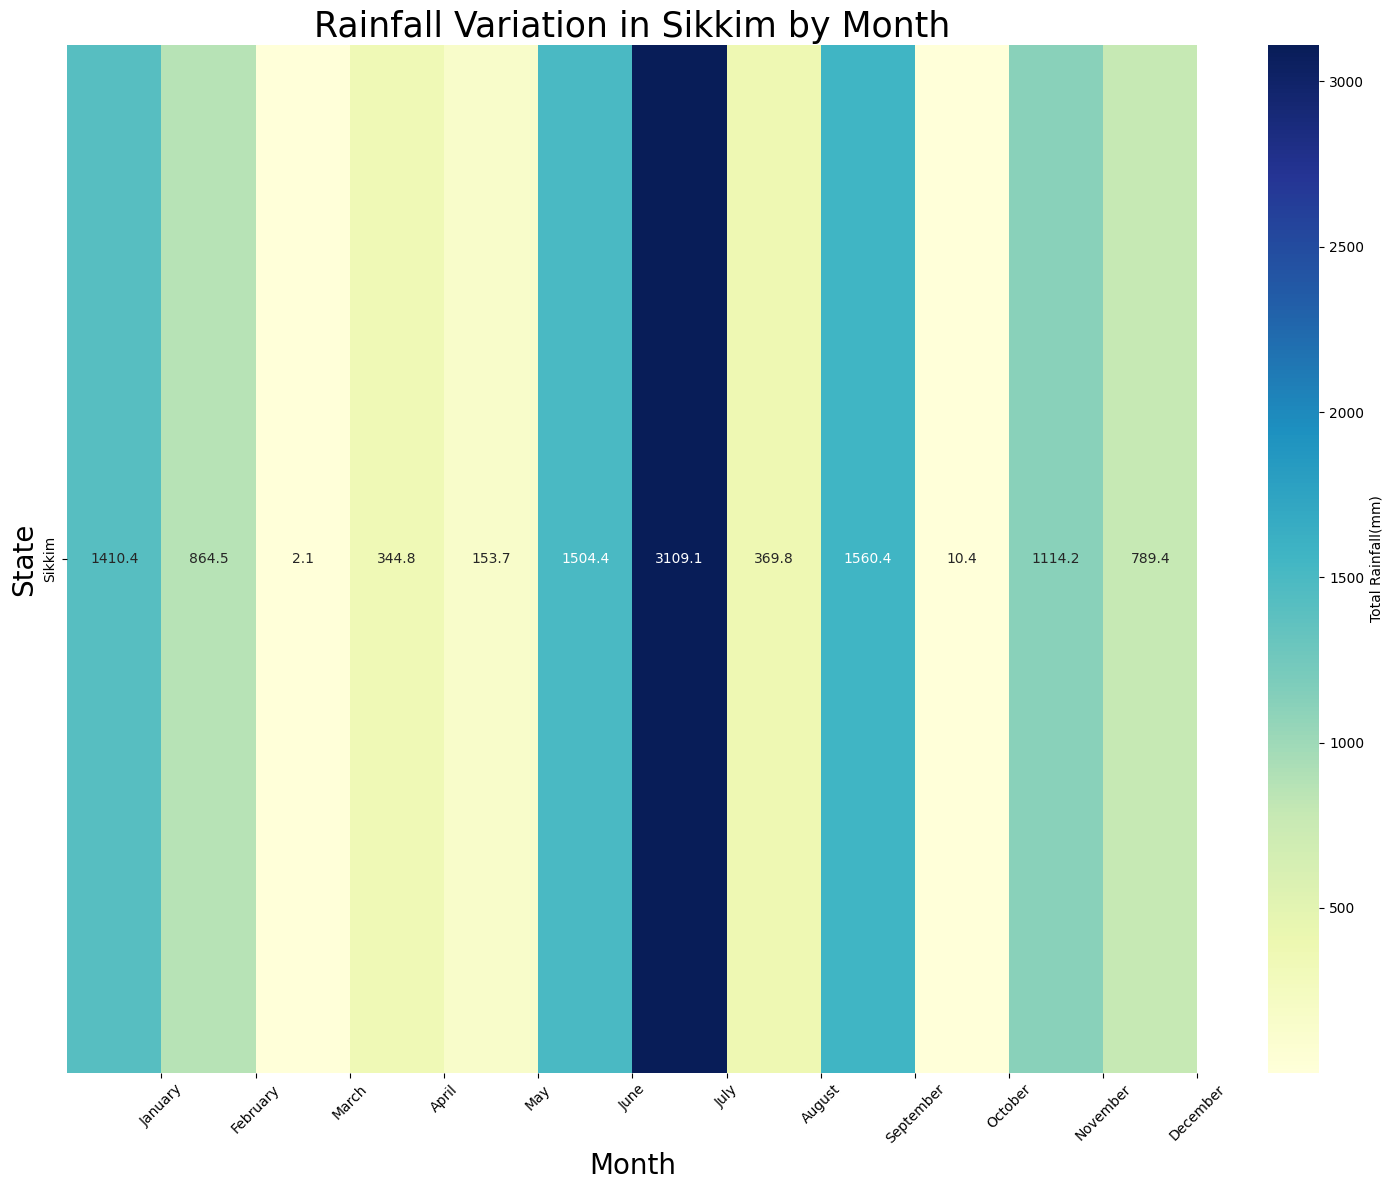

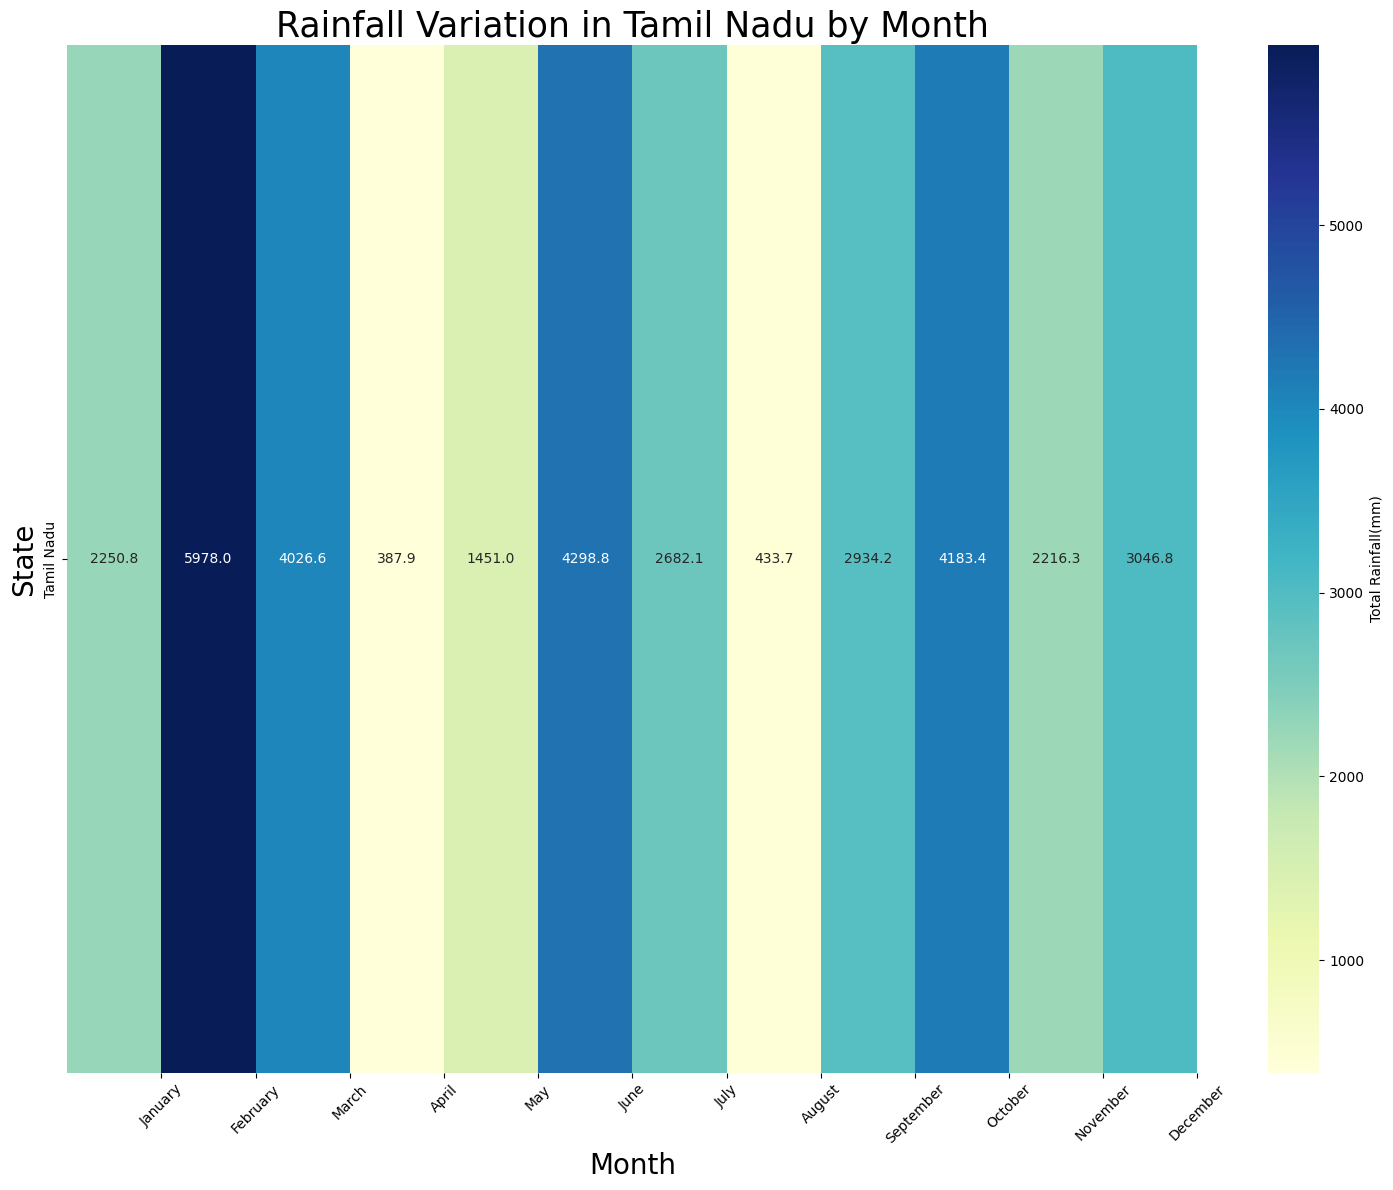

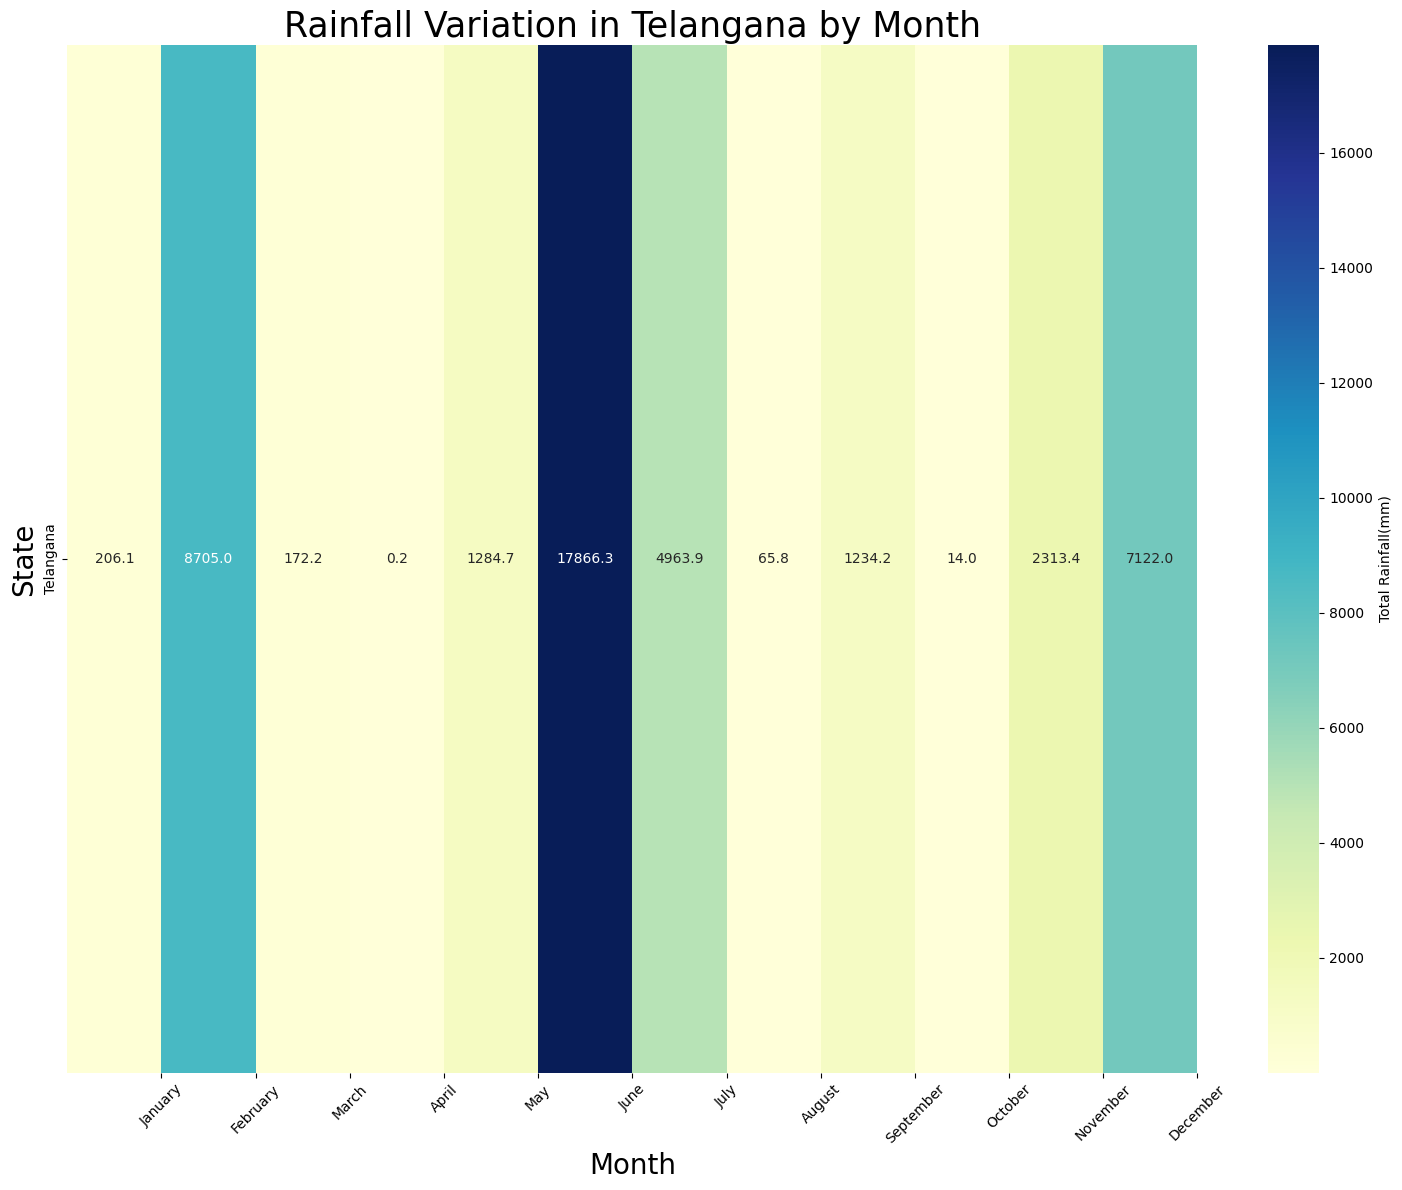

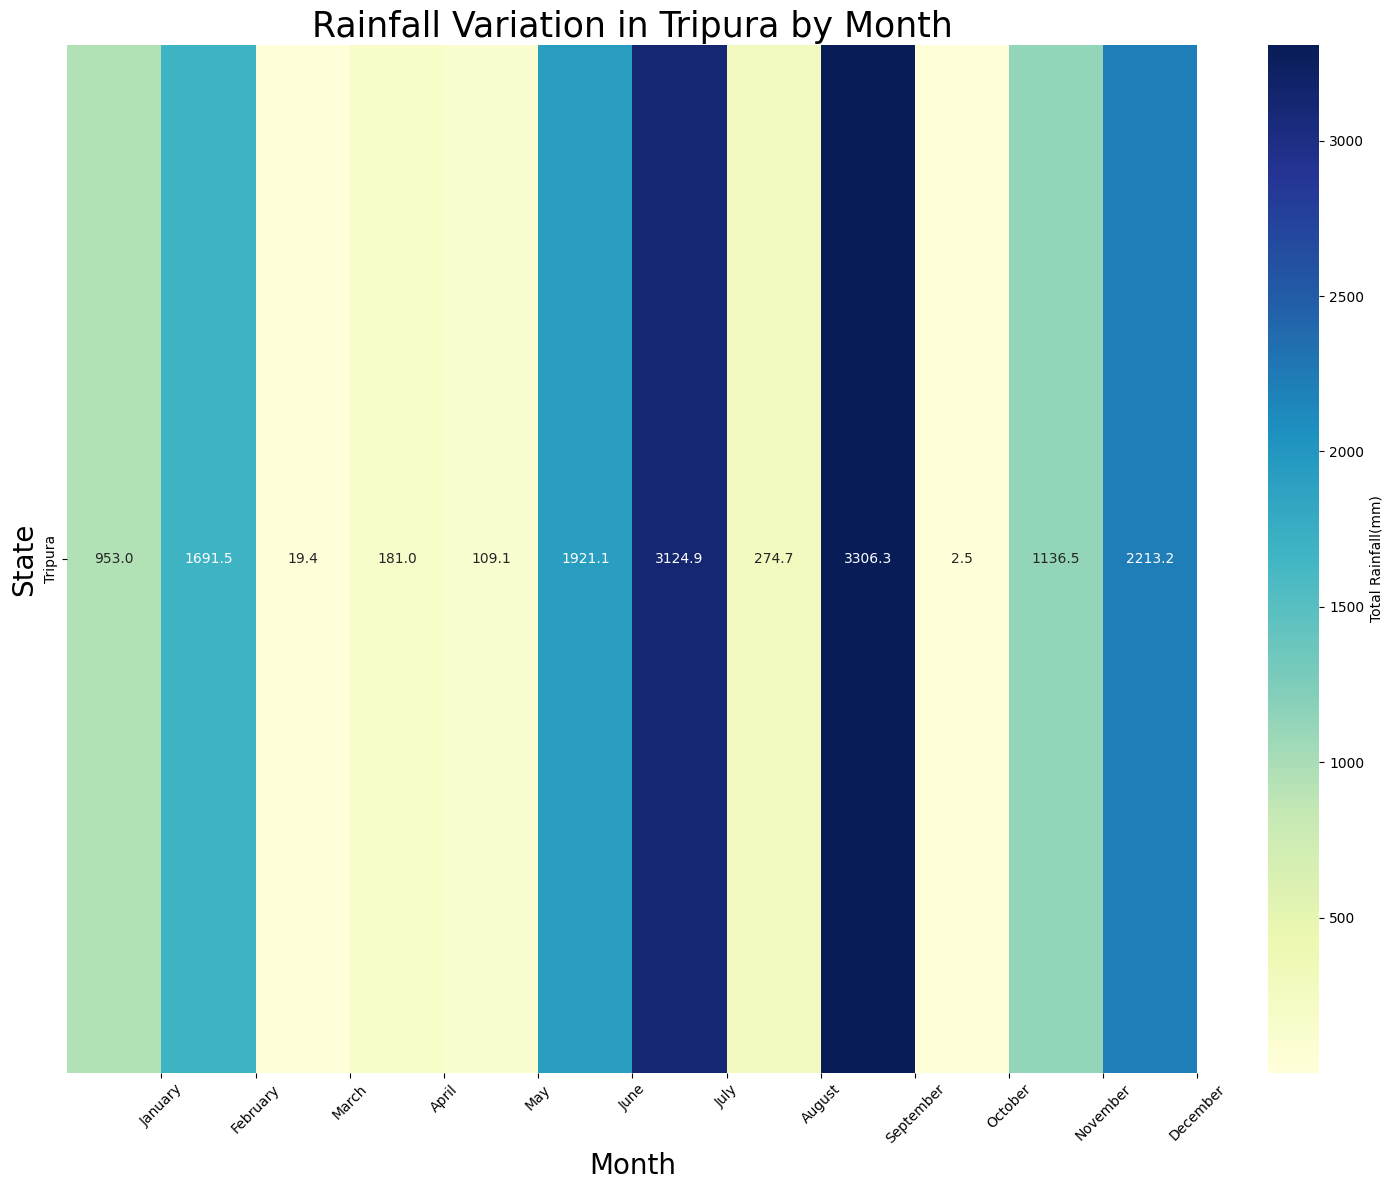

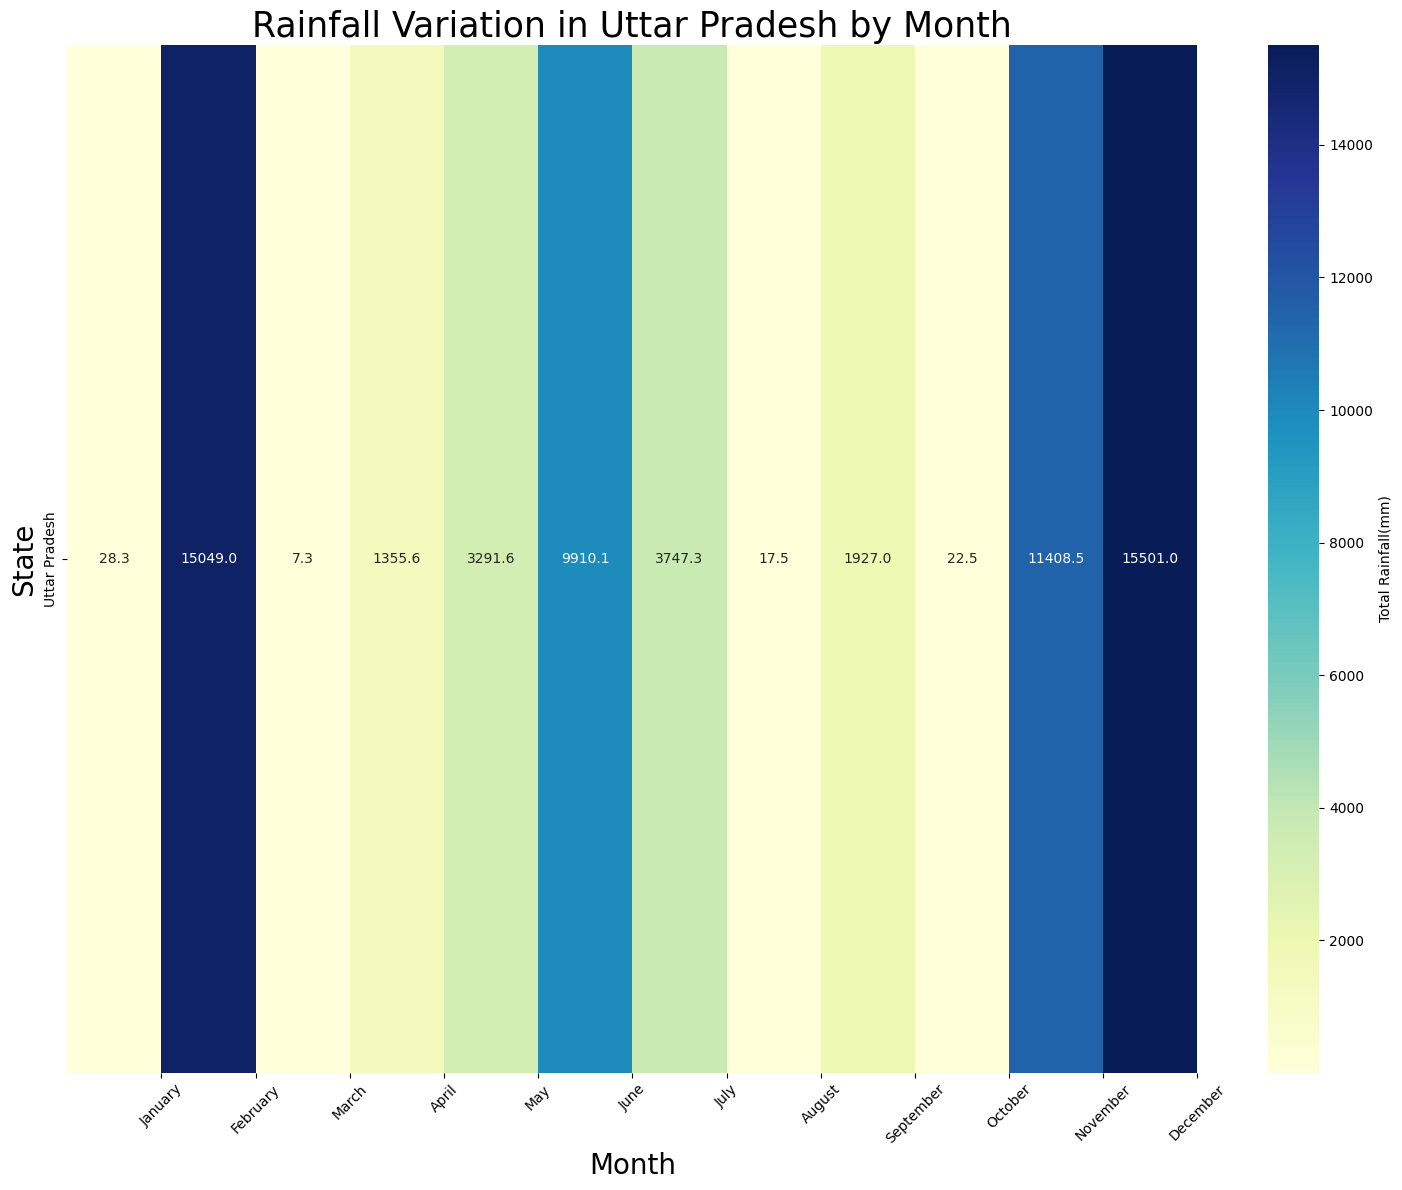

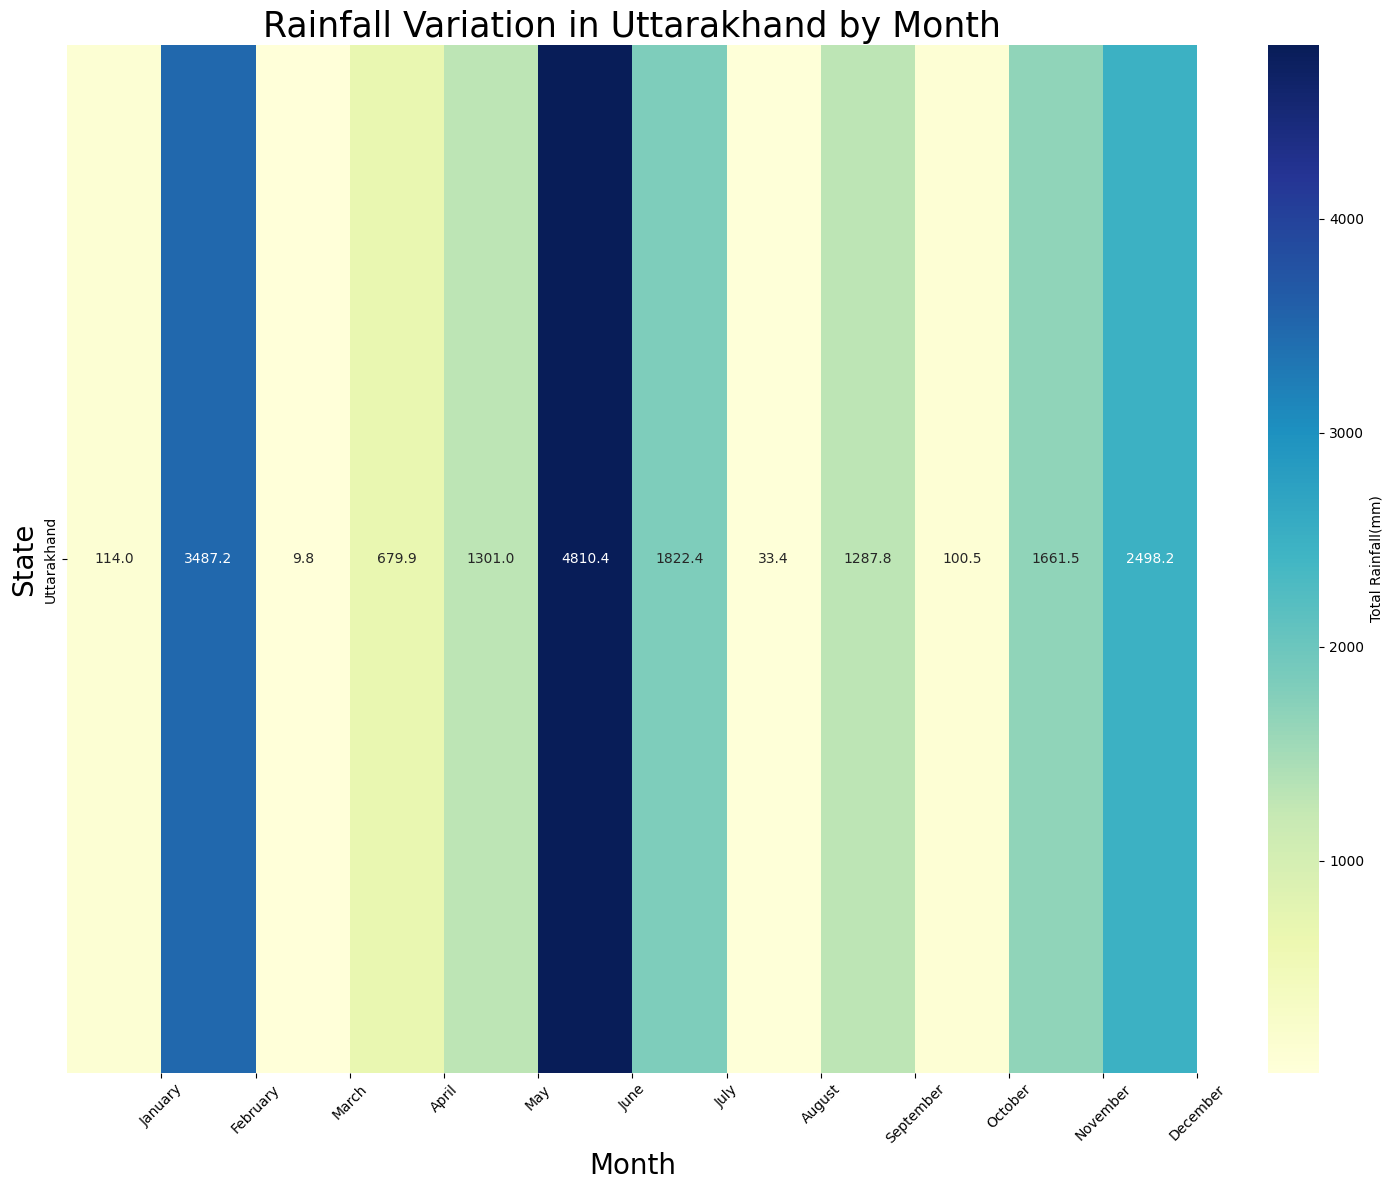

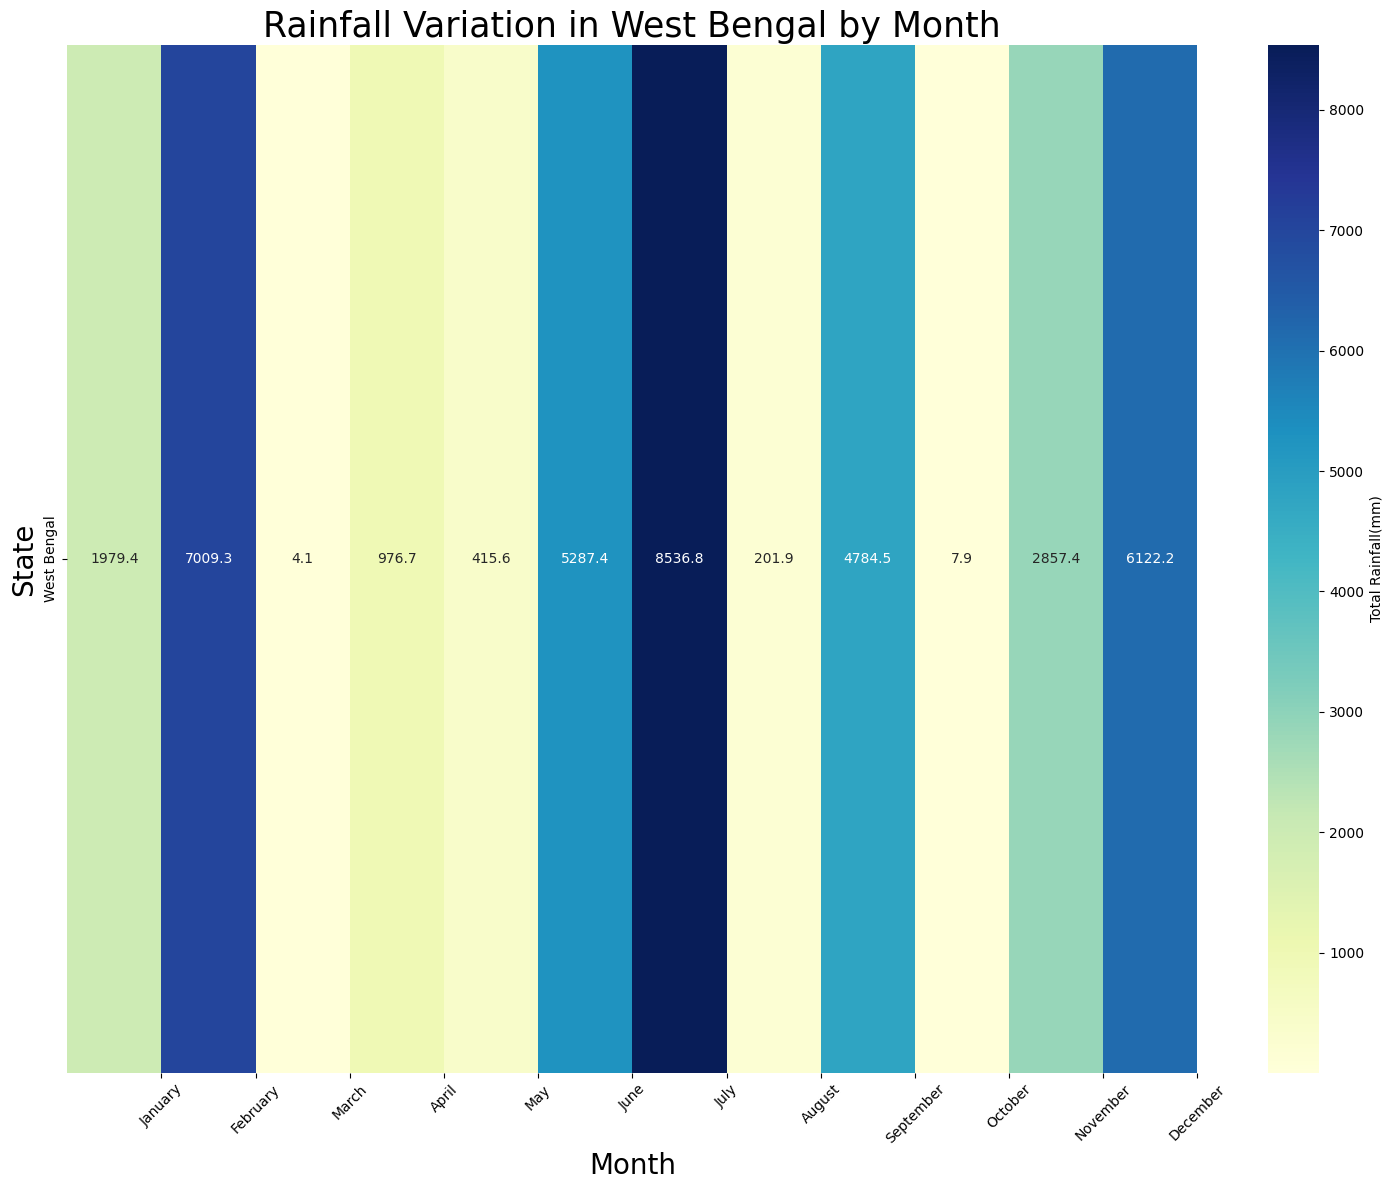

In [24]:
# Pivot the data into a matrix format for the heatmap
heatmap=df.pivot_table(index='State',columns='Month',values='Total',aggfunc='sum')
# Sort the states
heatmap=heatmap.sort_index()
for state in heatmap.index:
    plt.figure(figsize=(15,12))
    sns.heatmap(heatmap.loc[[state]],cmap='YlGnBu',annot=True,fmt='.1f',cbar_kws={'label':'Total Rainfall(mm)'})
    plt.xlabel('Month',fontsize=20)
    plt.ylabel('State',fontsize=20)
    plt.title(f'Rainfall Variation in {state} by Month',fontsize=25)
    plt.xticks(tick_positions,month_names,rotation=45)
    # Set custom month labels on the x-axis
    plt.tight_layout()
    plt.show()

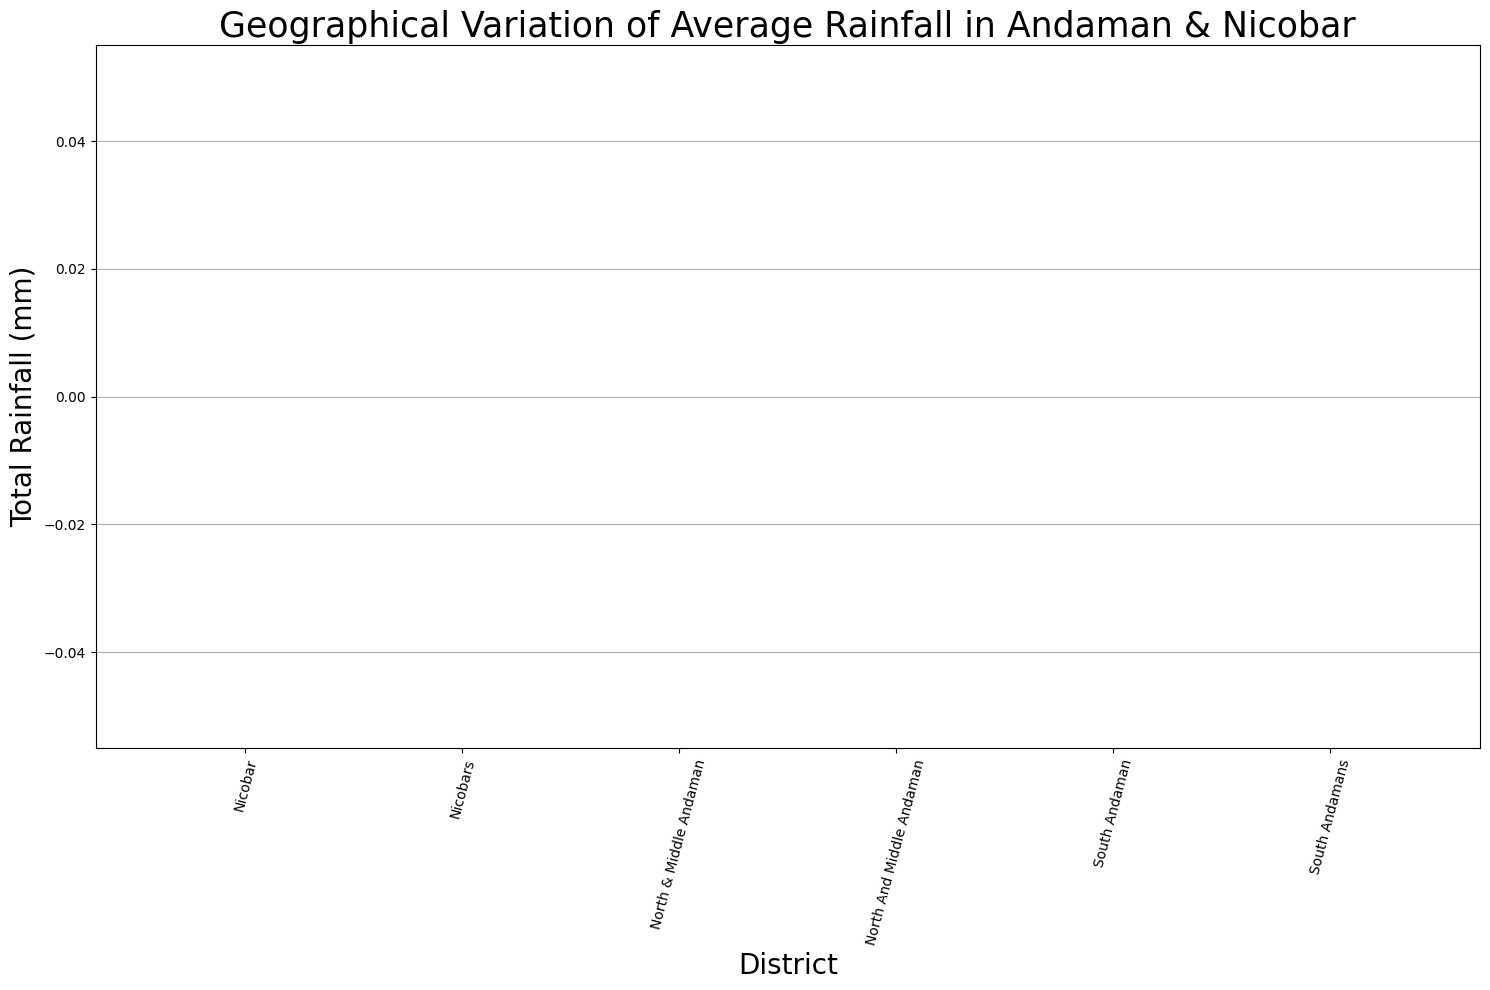

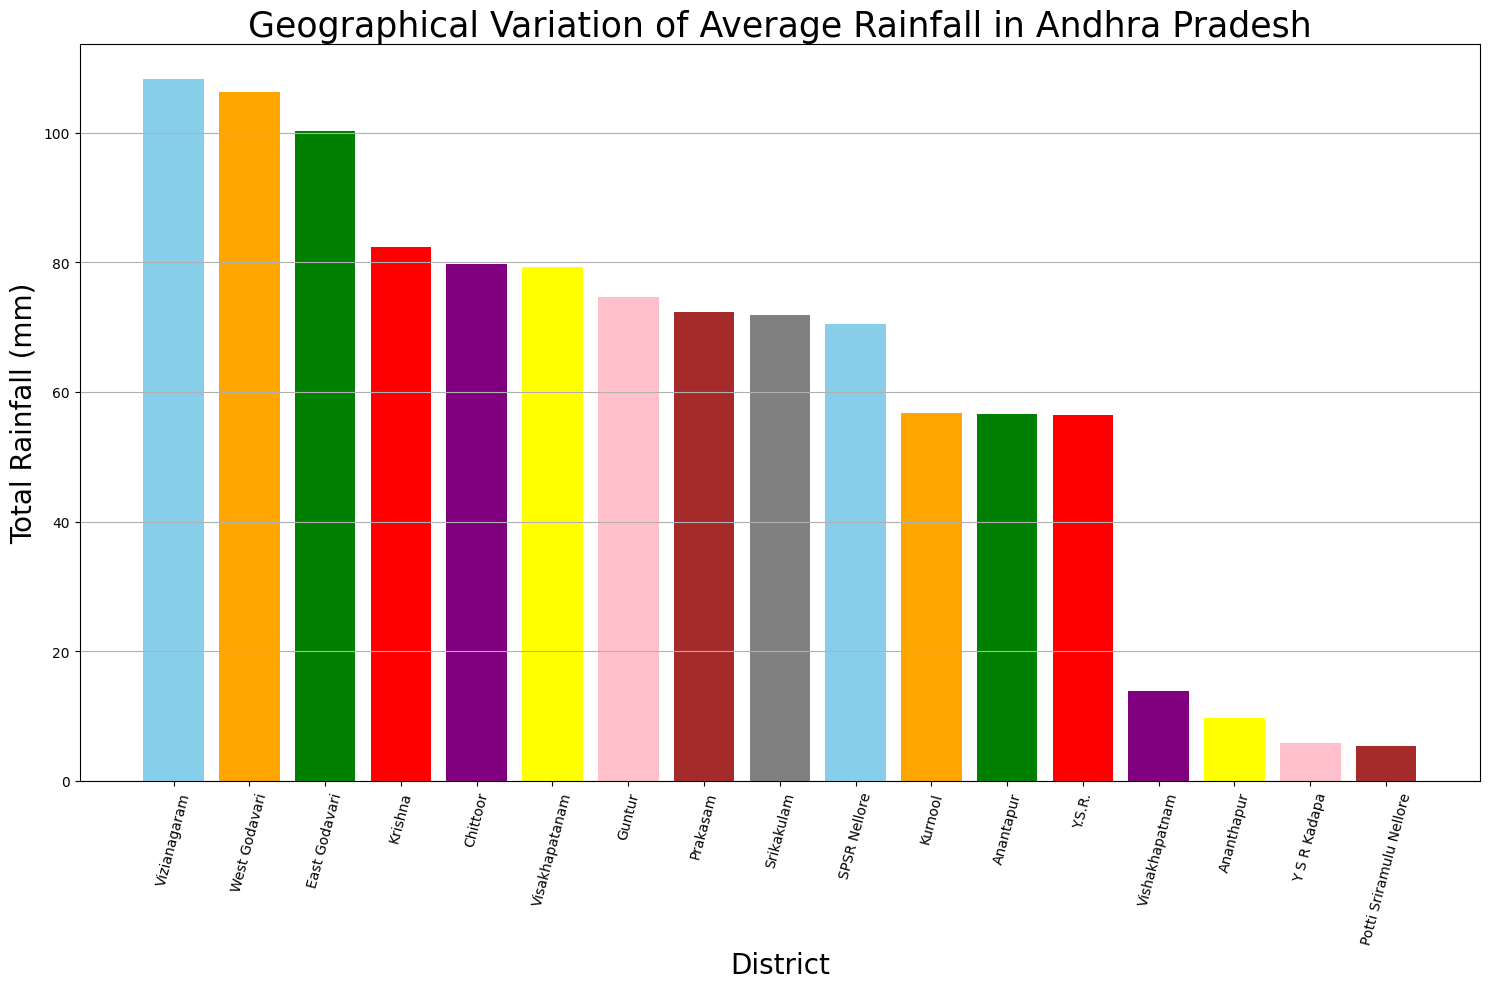

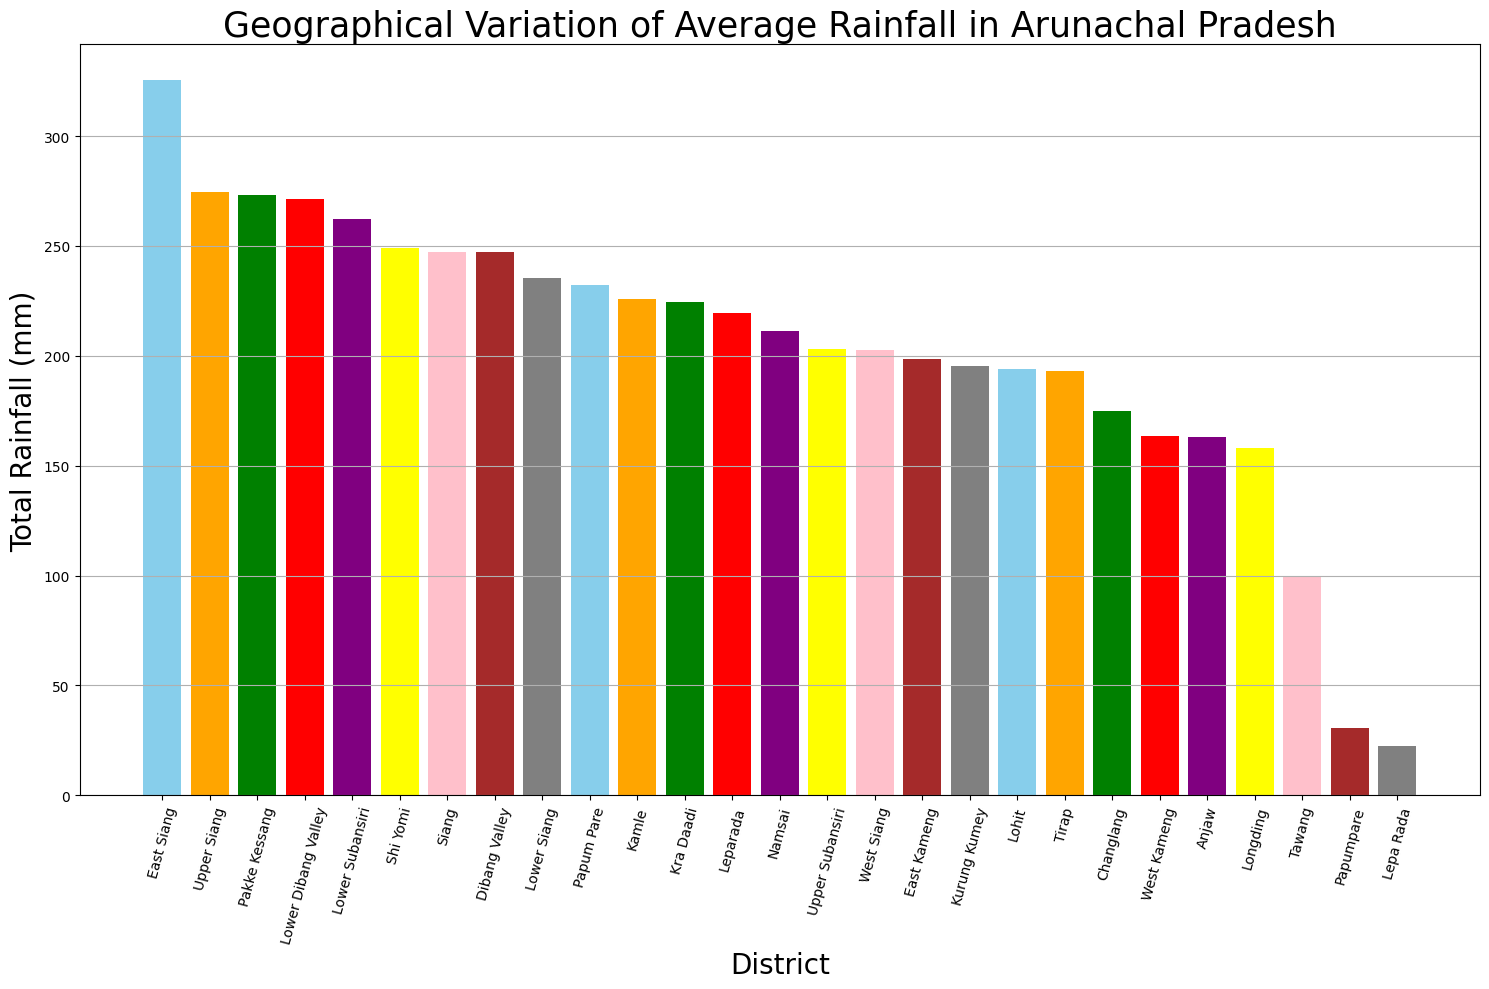

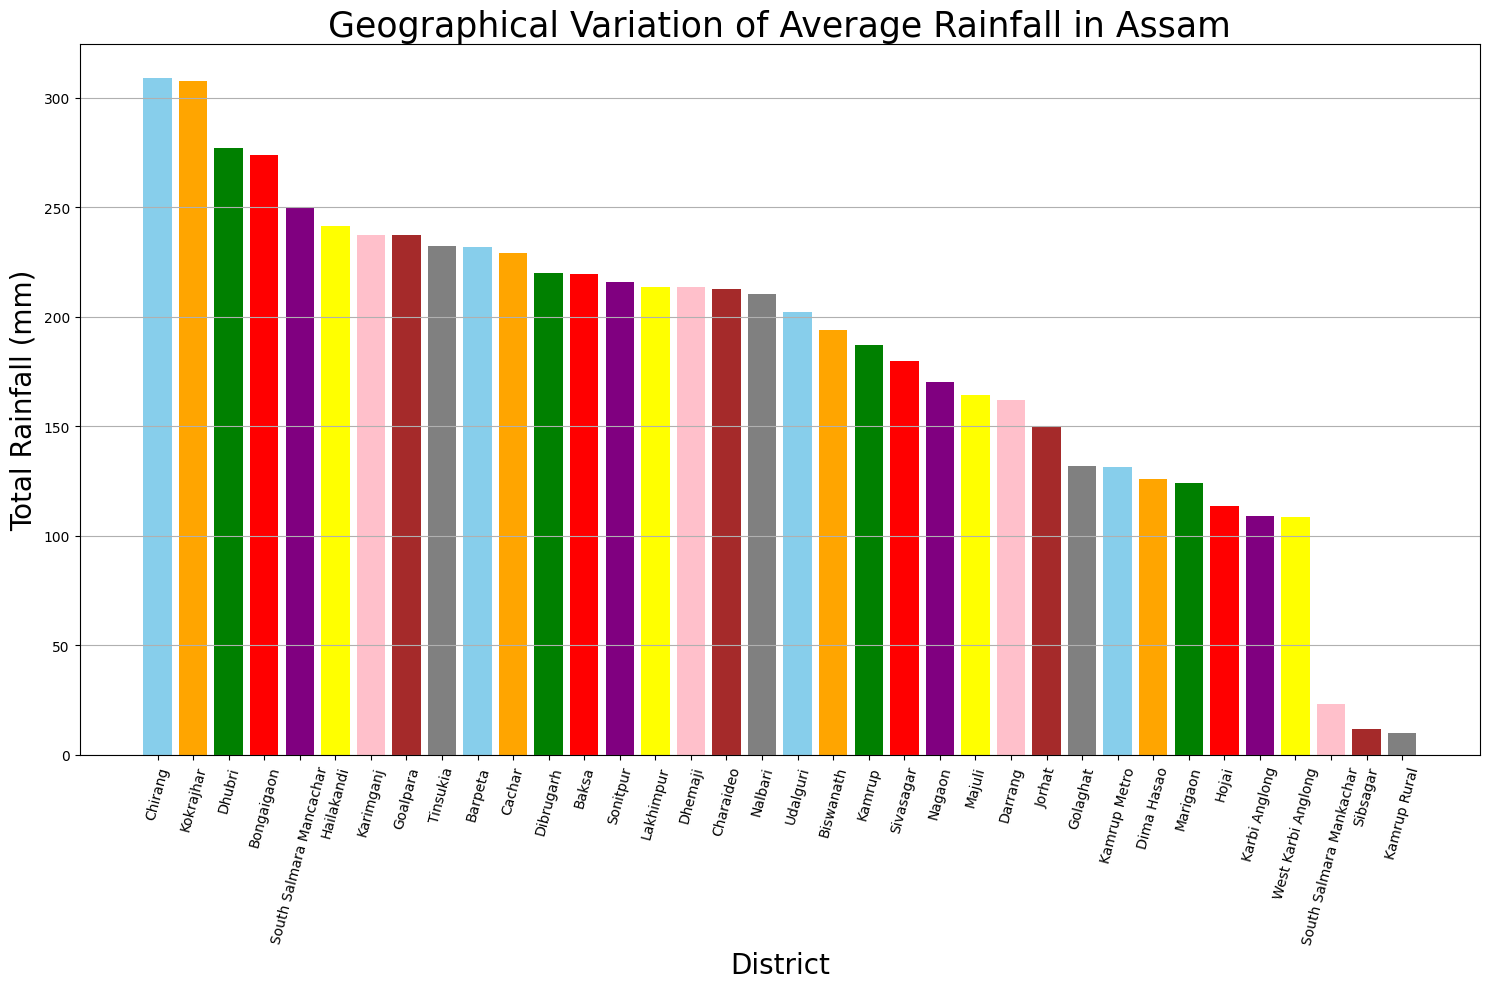

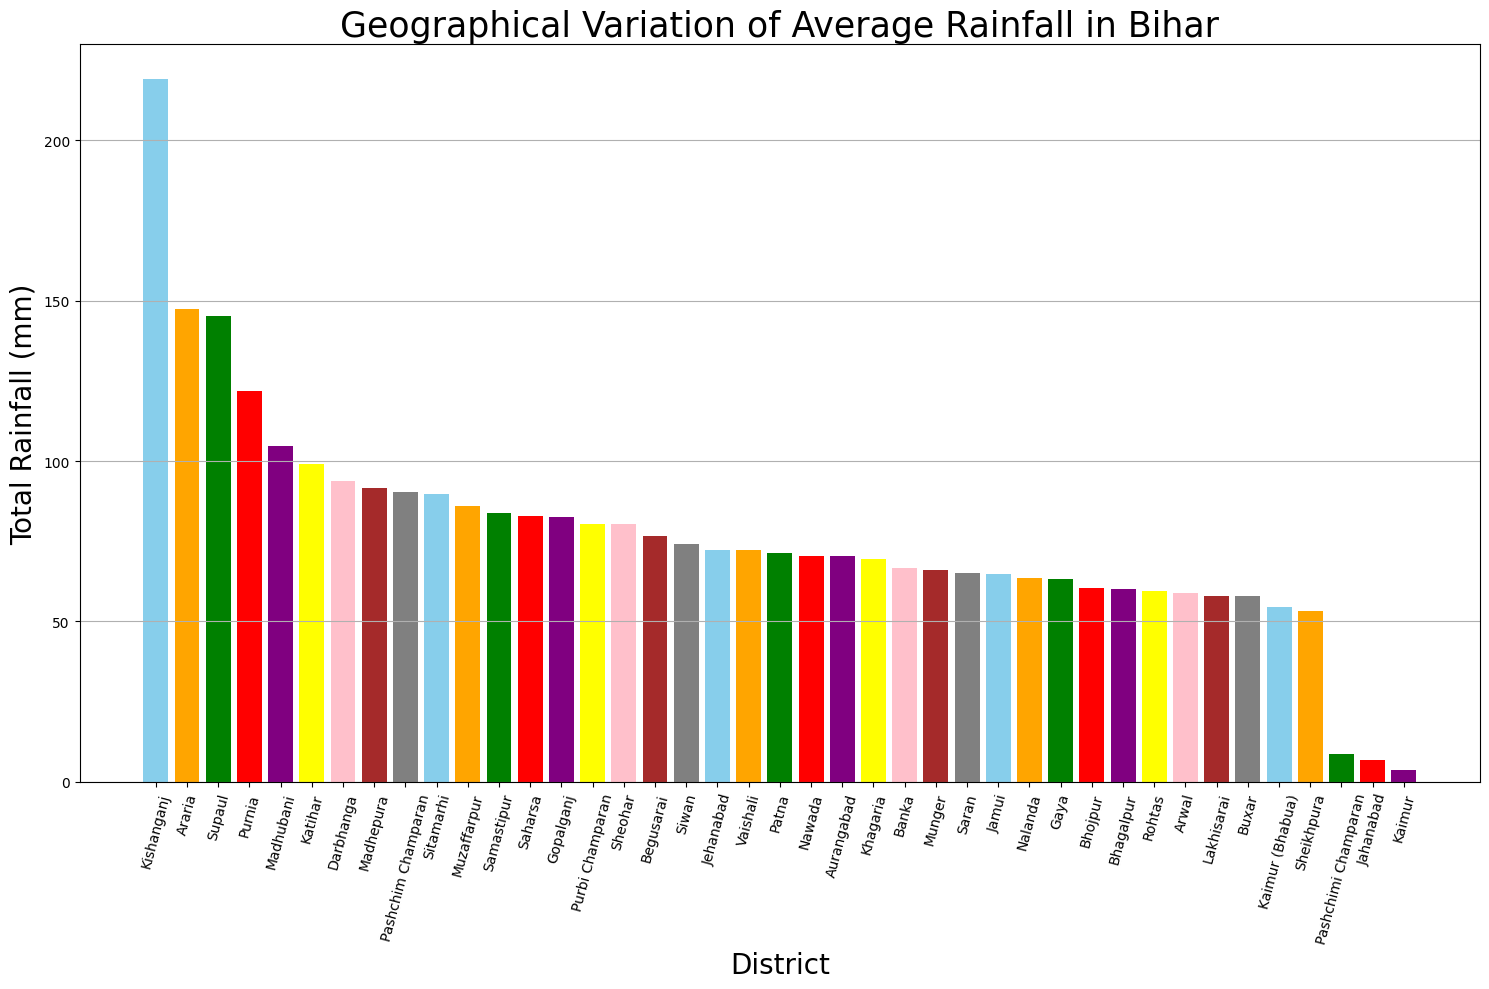

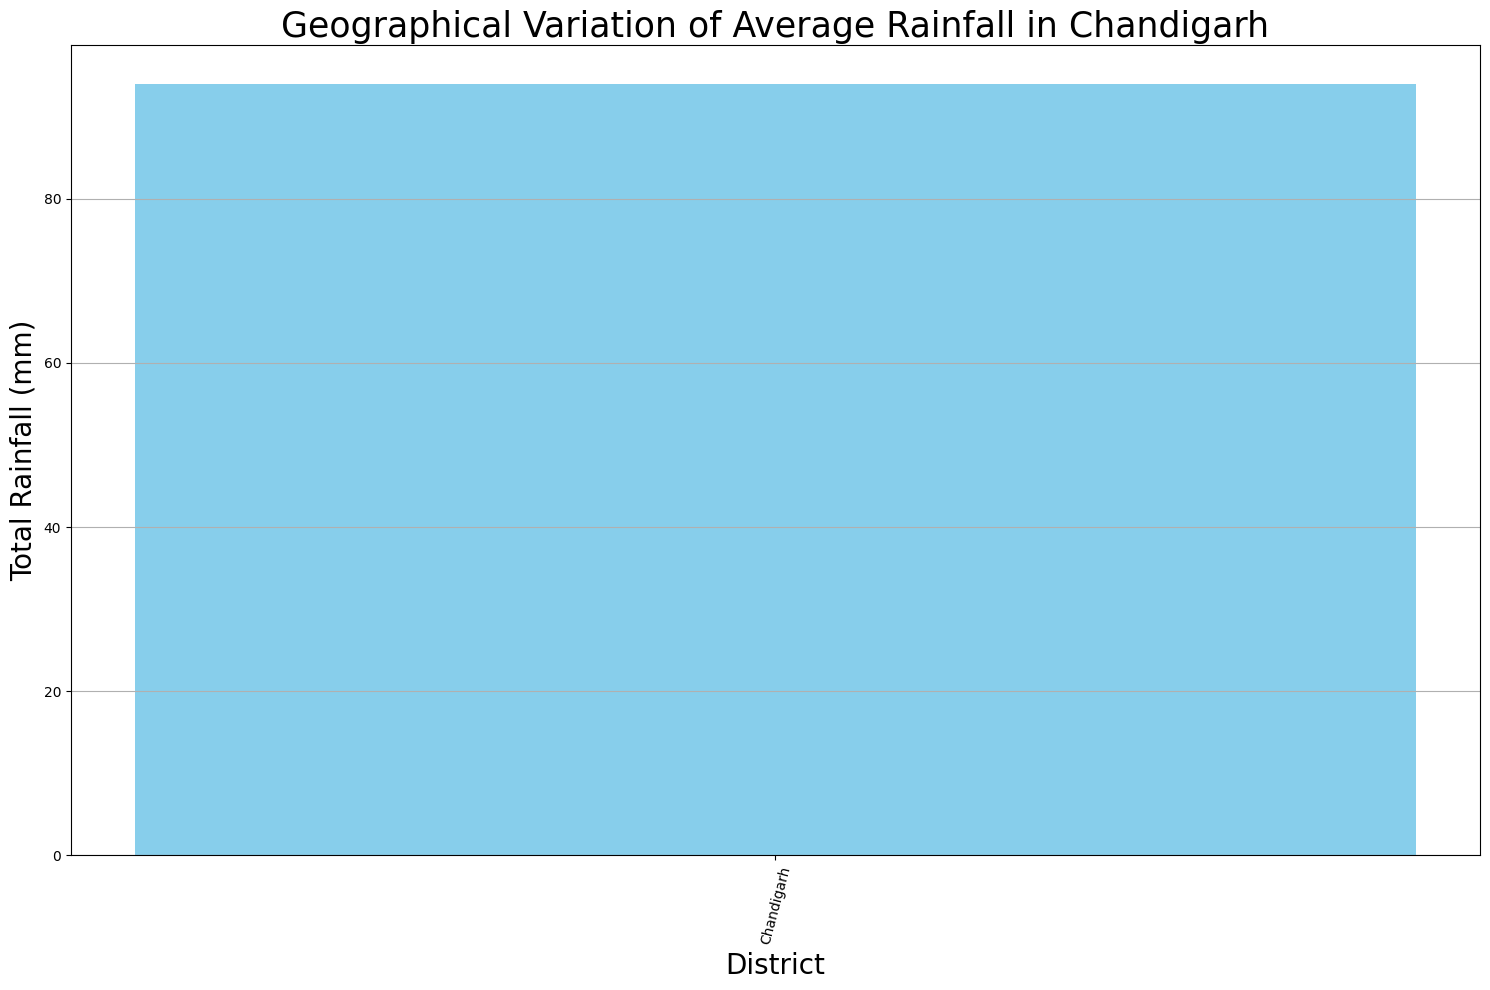

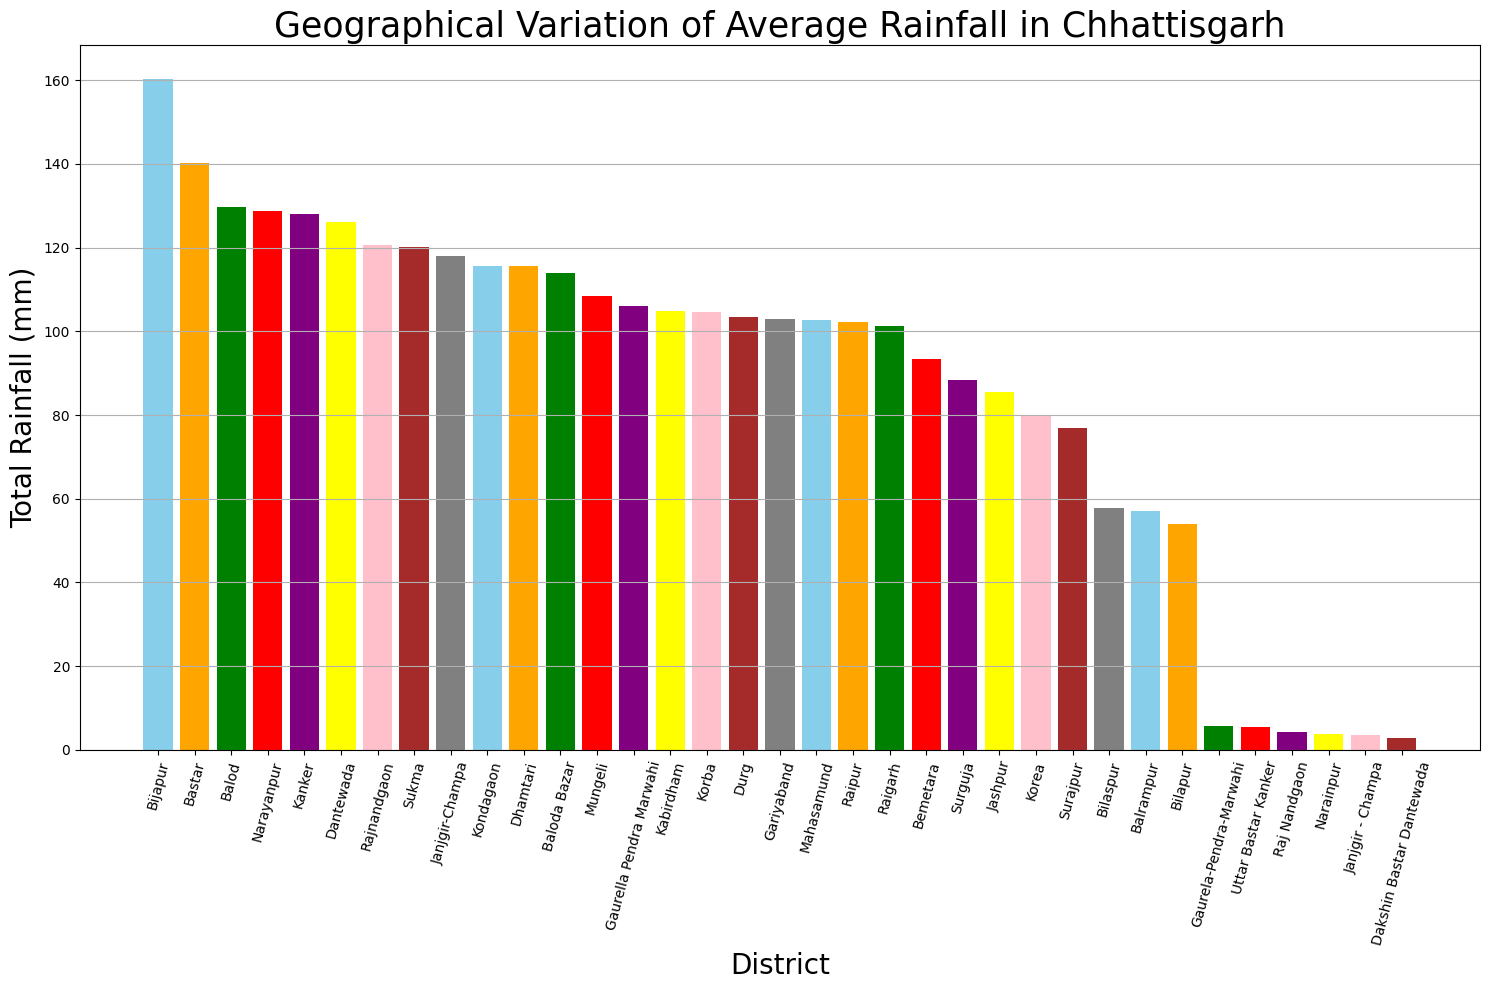

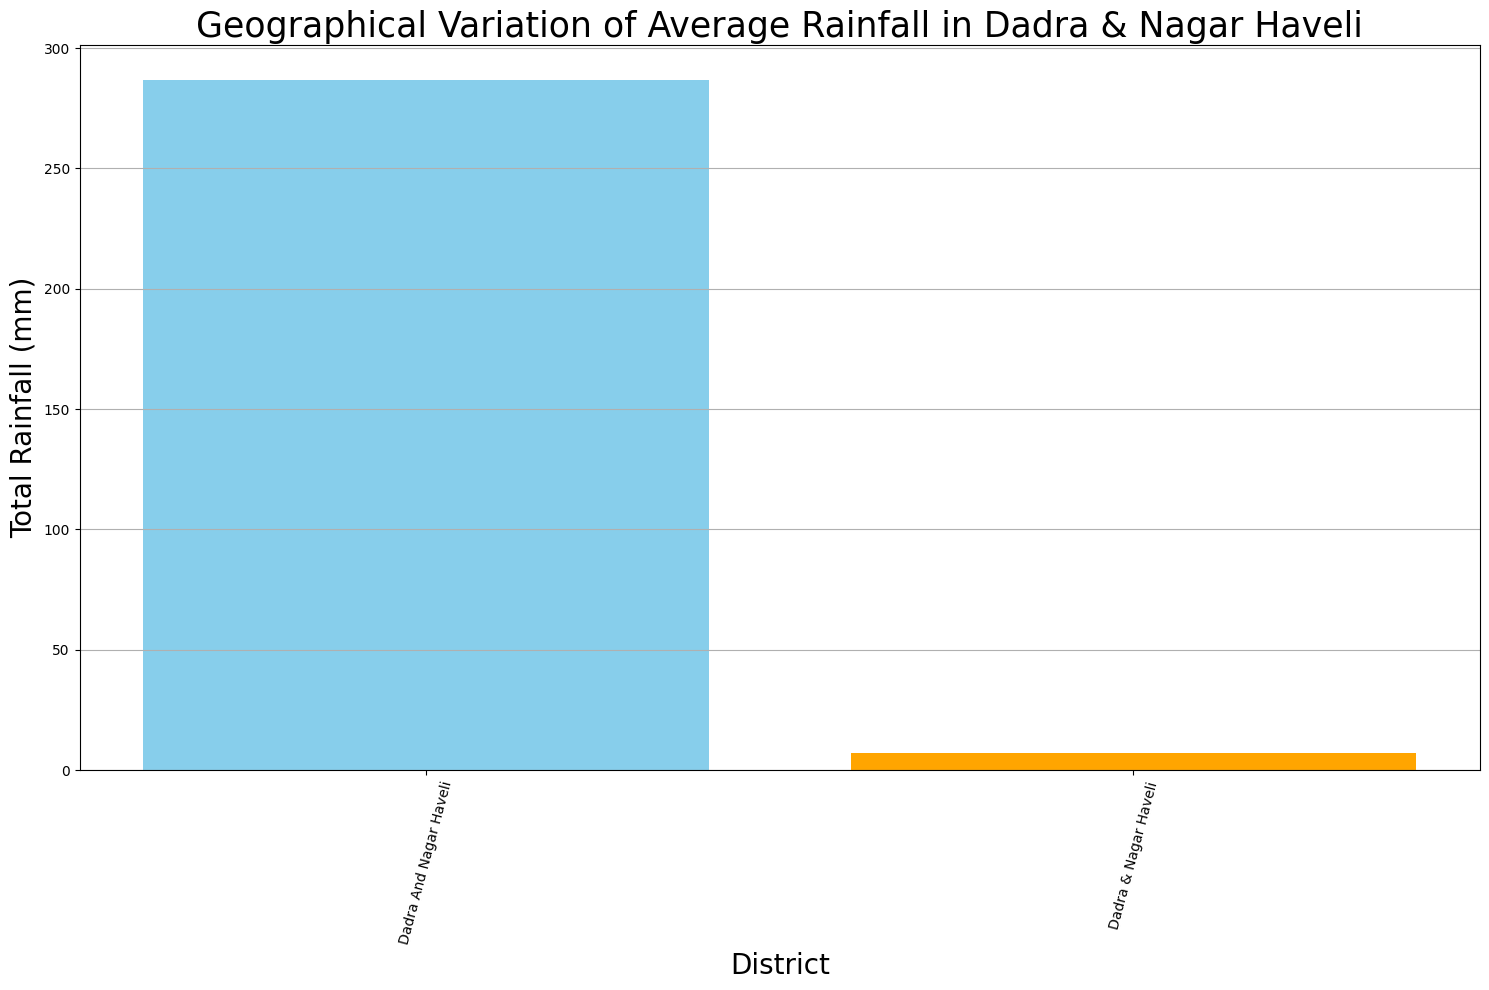

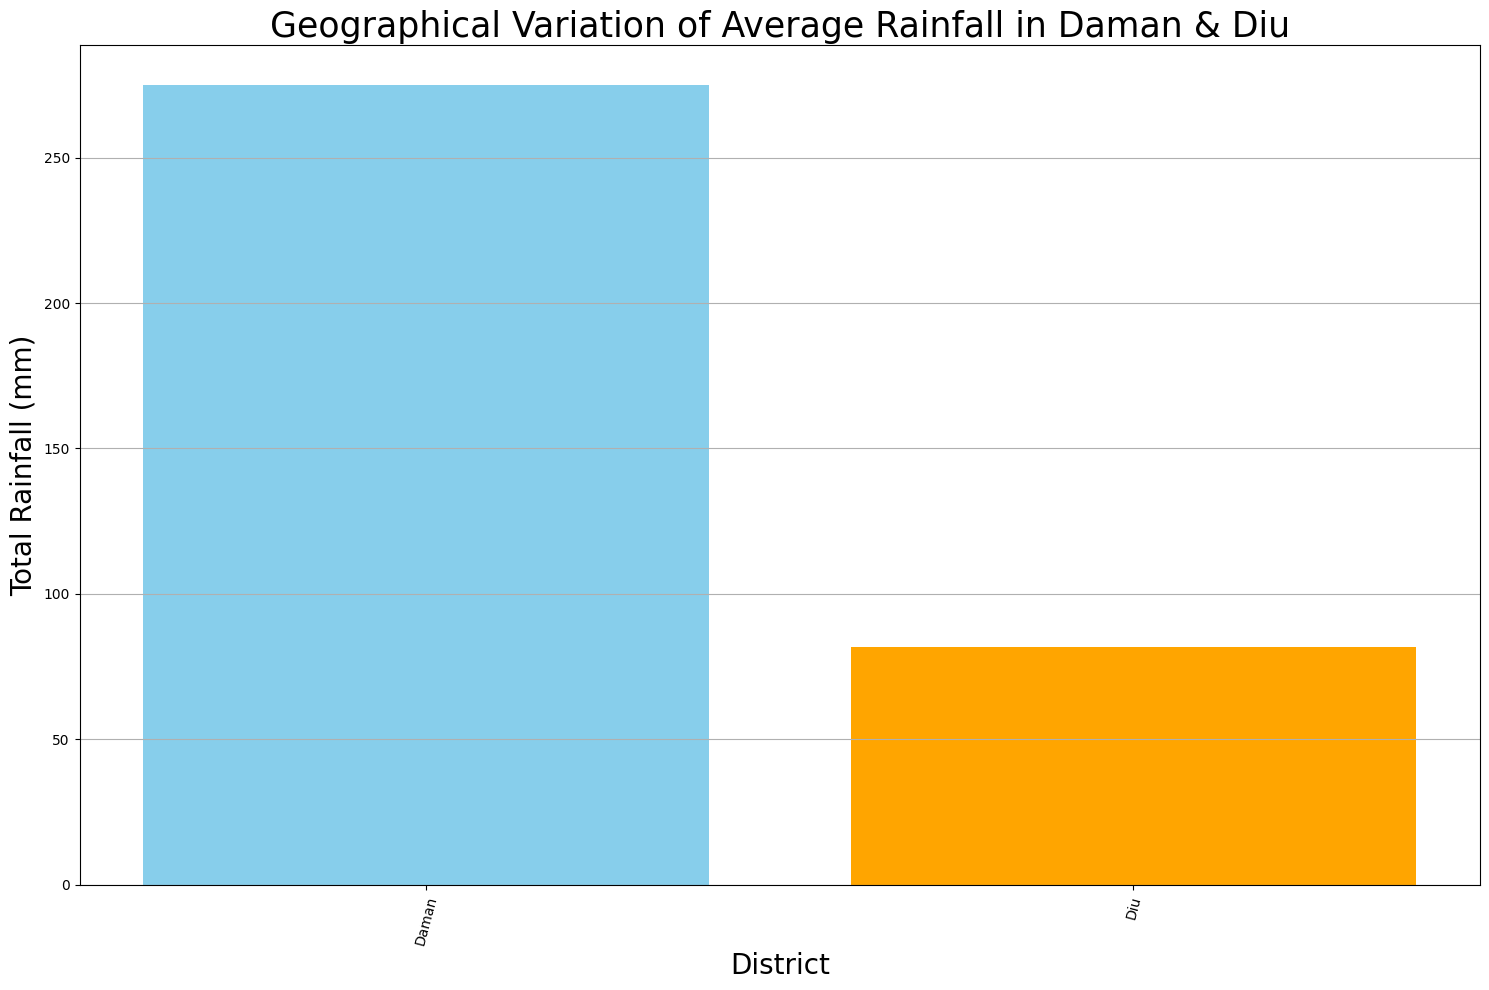

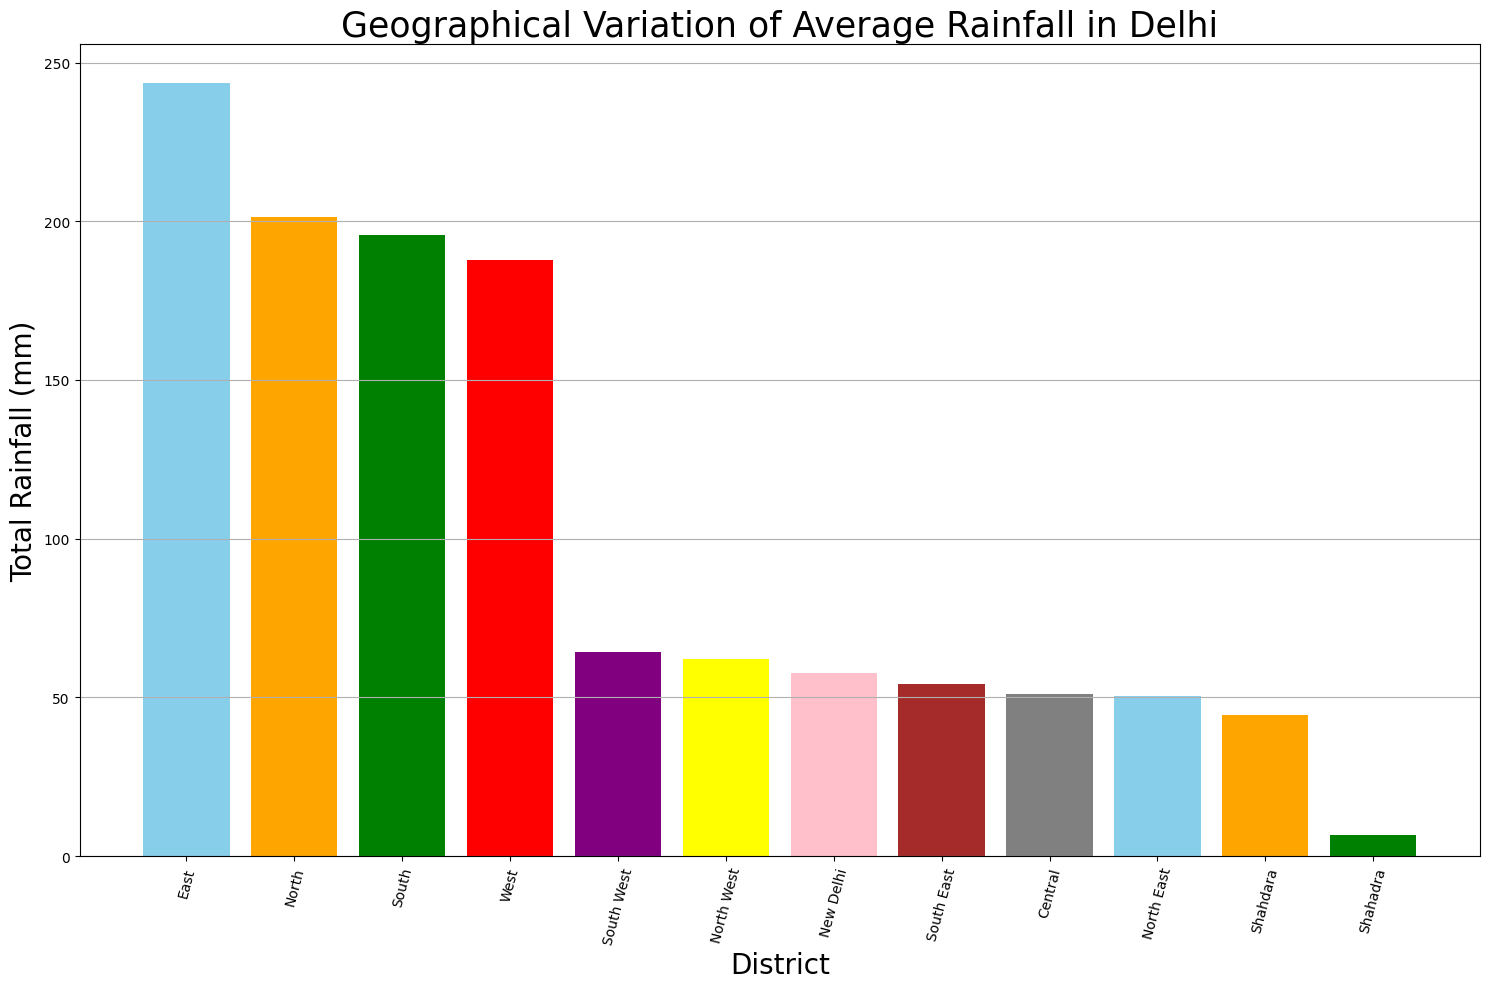

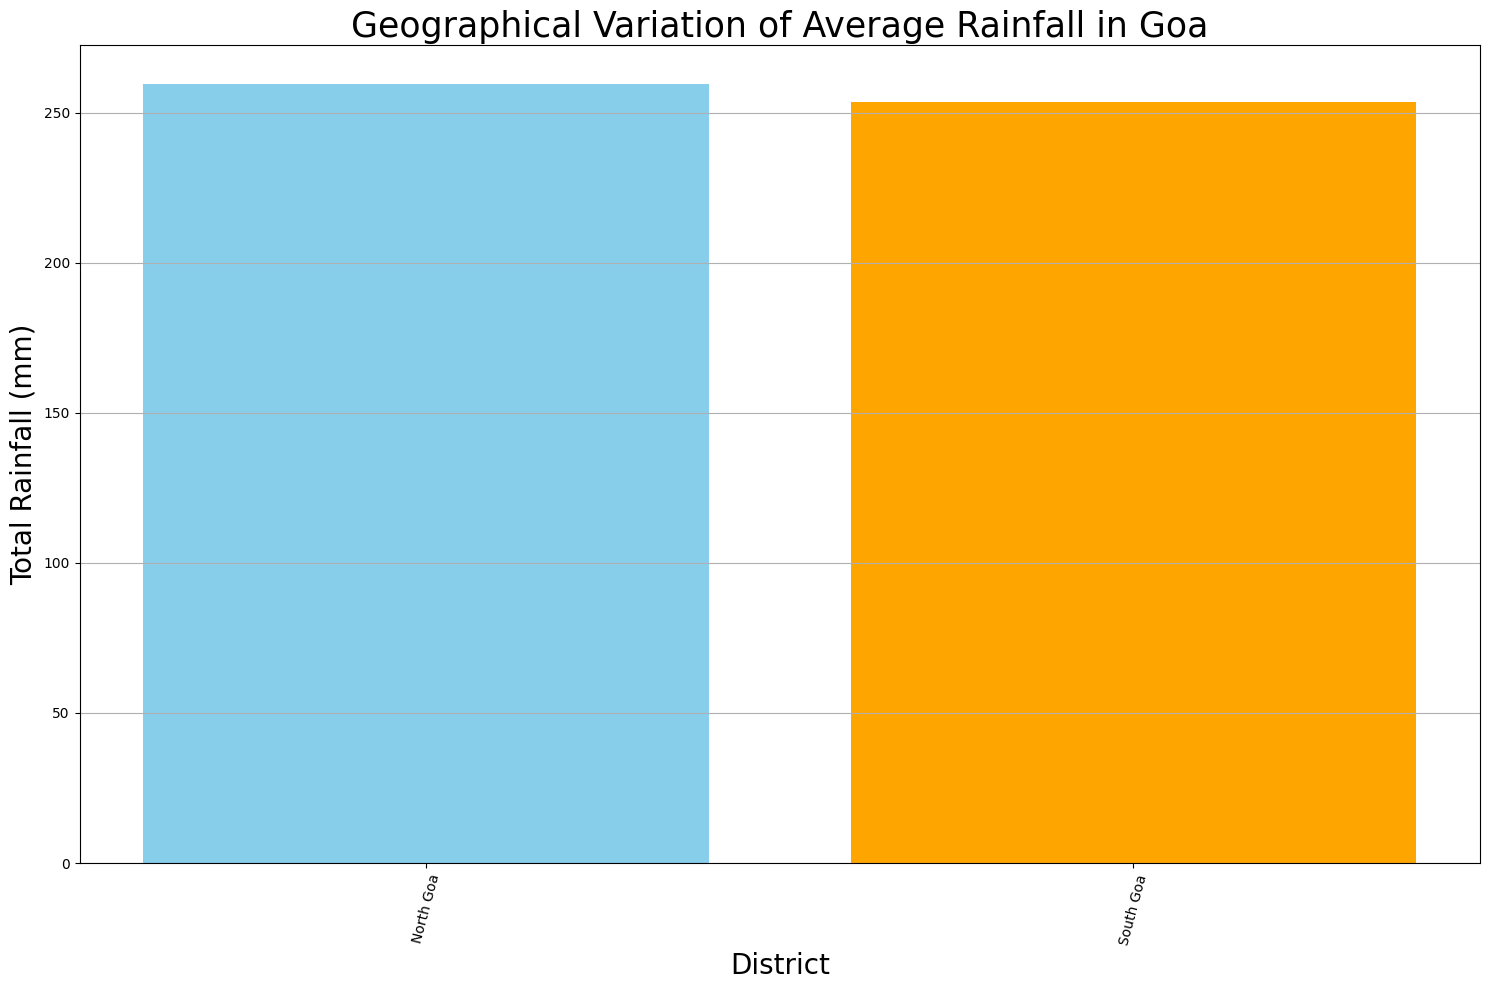

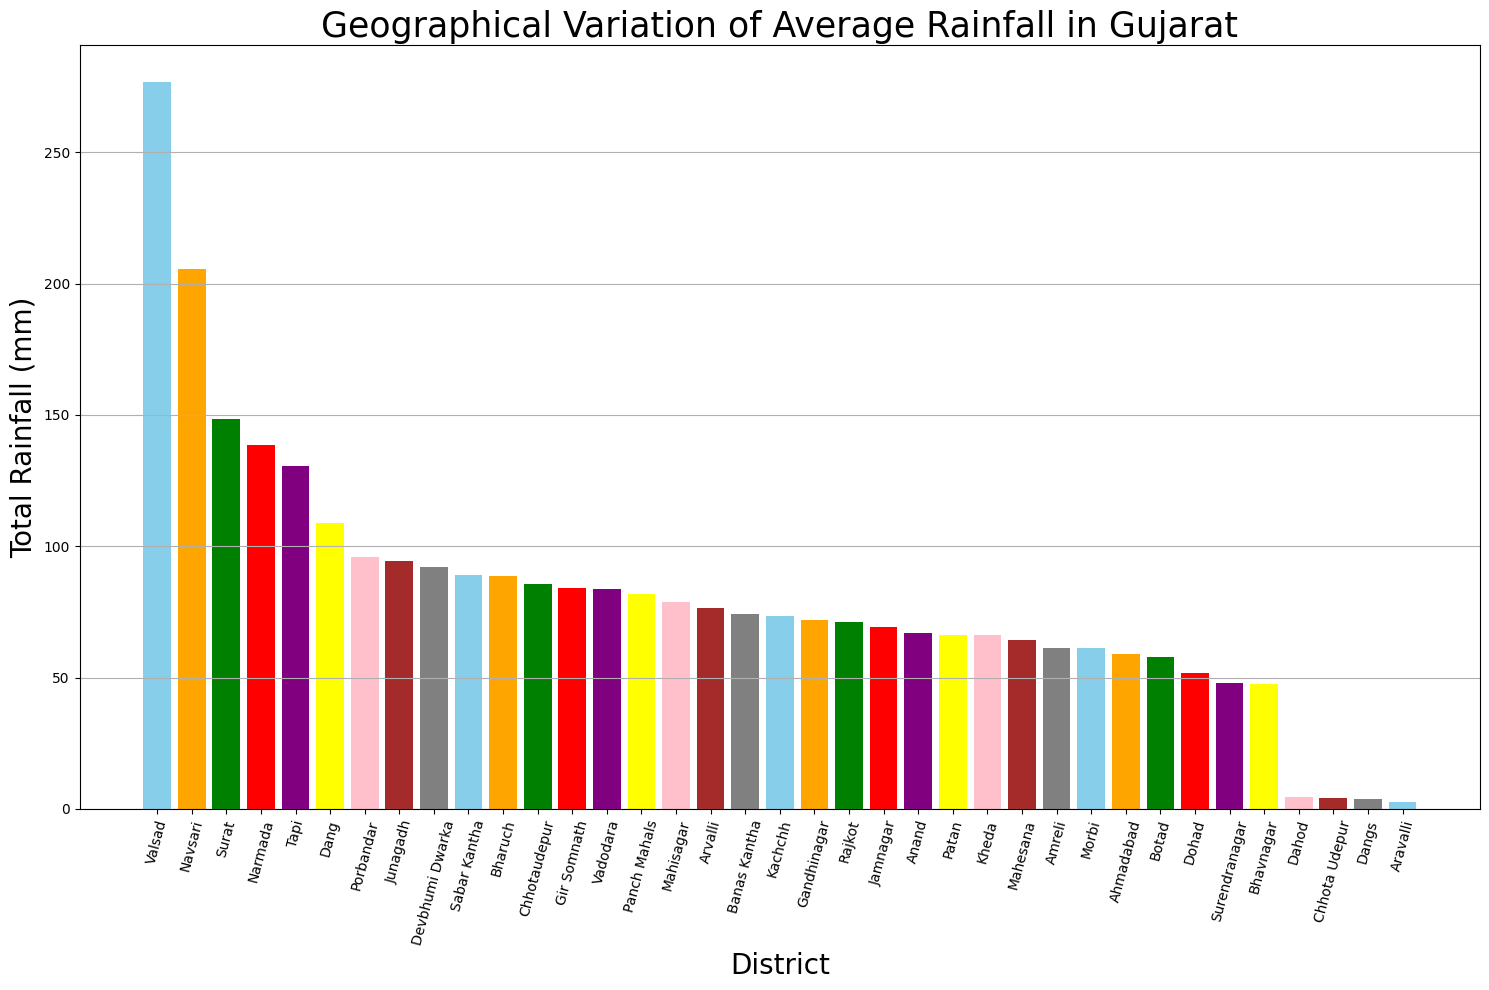

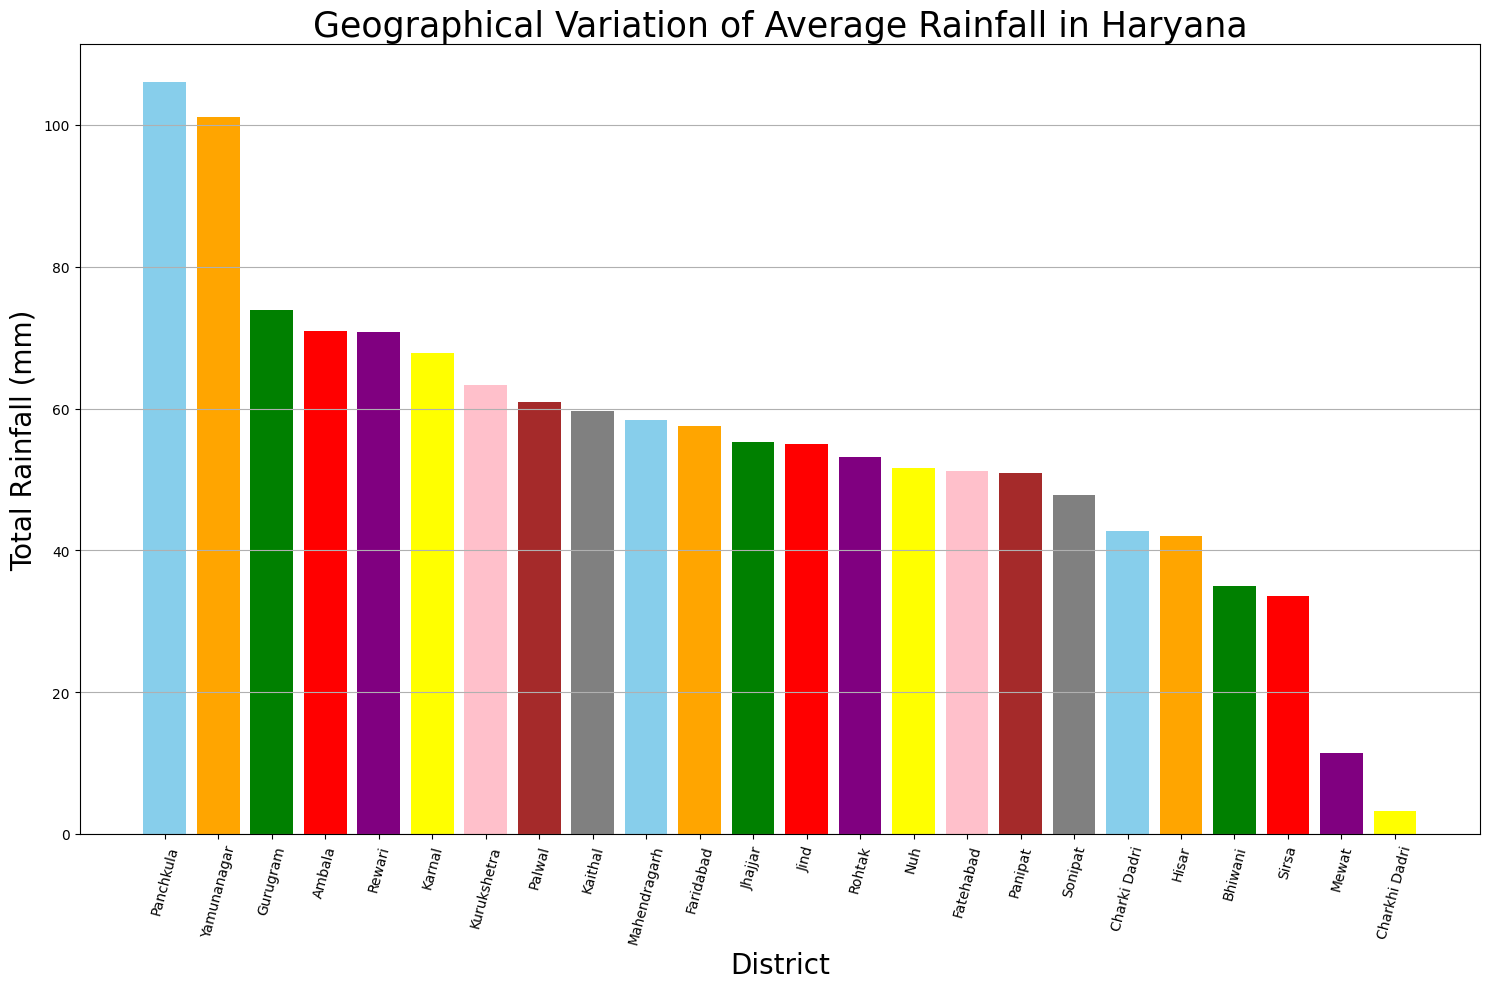

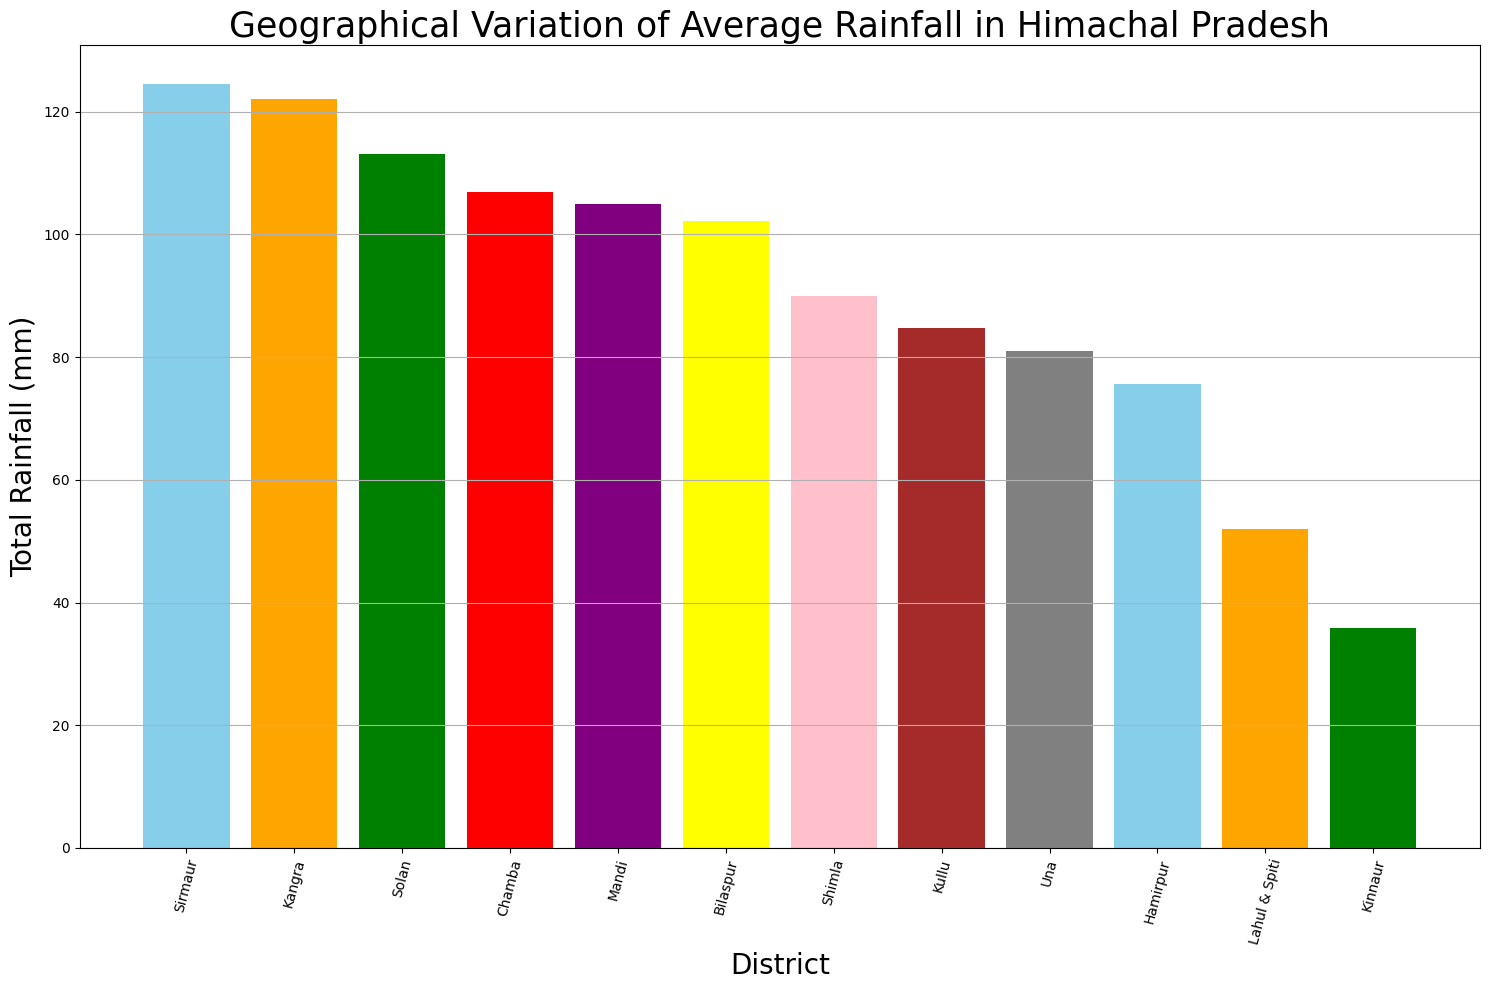

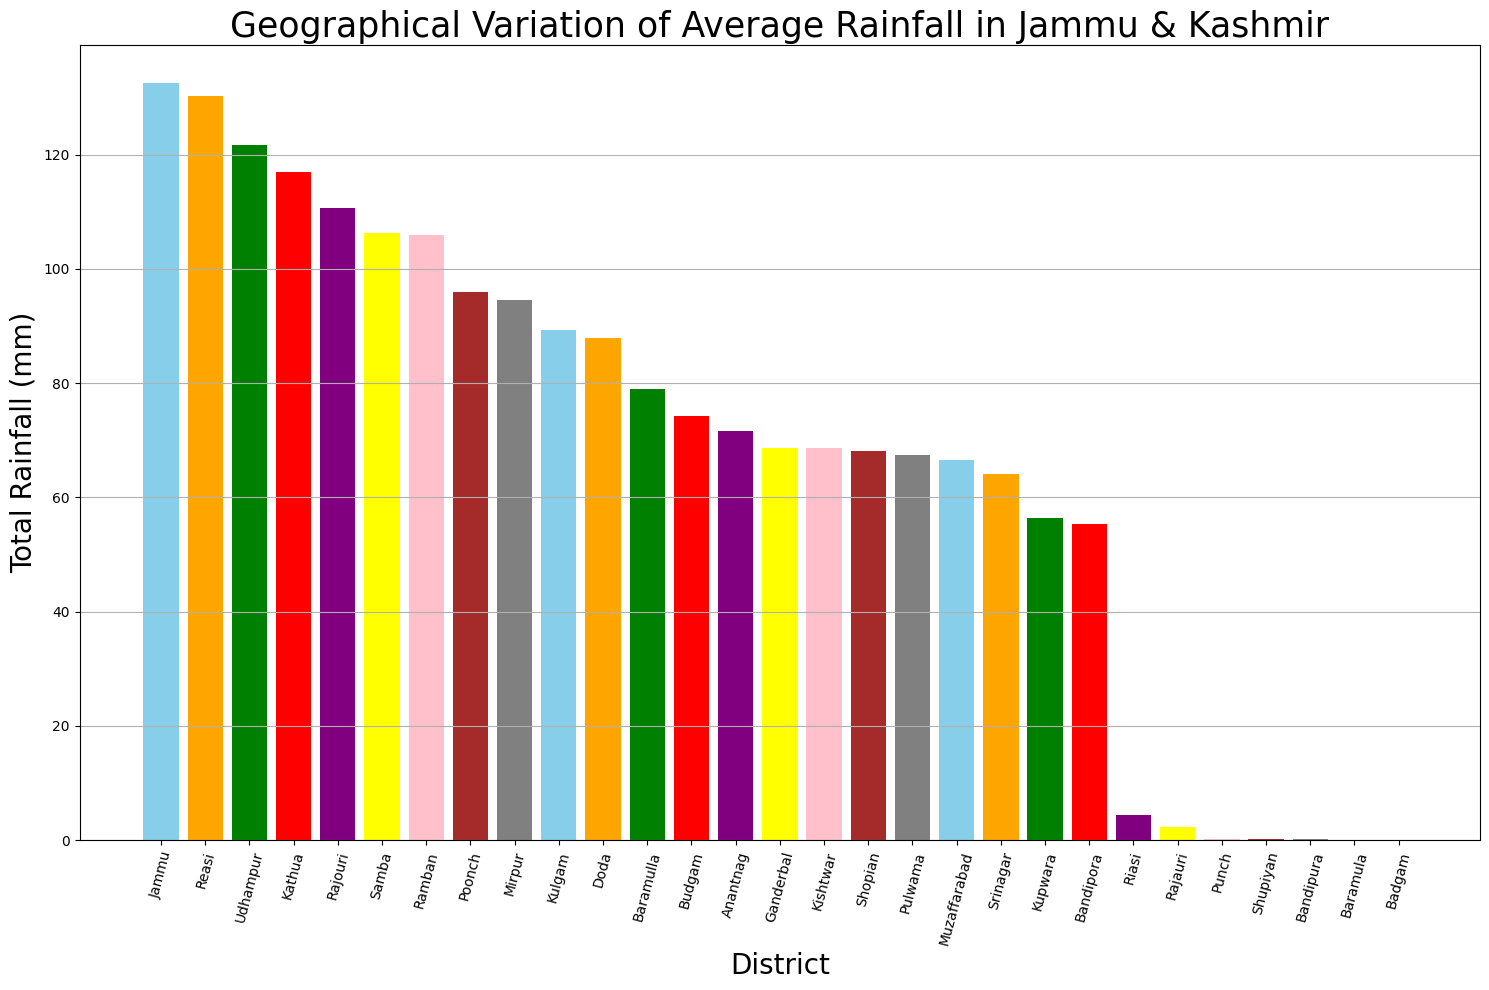

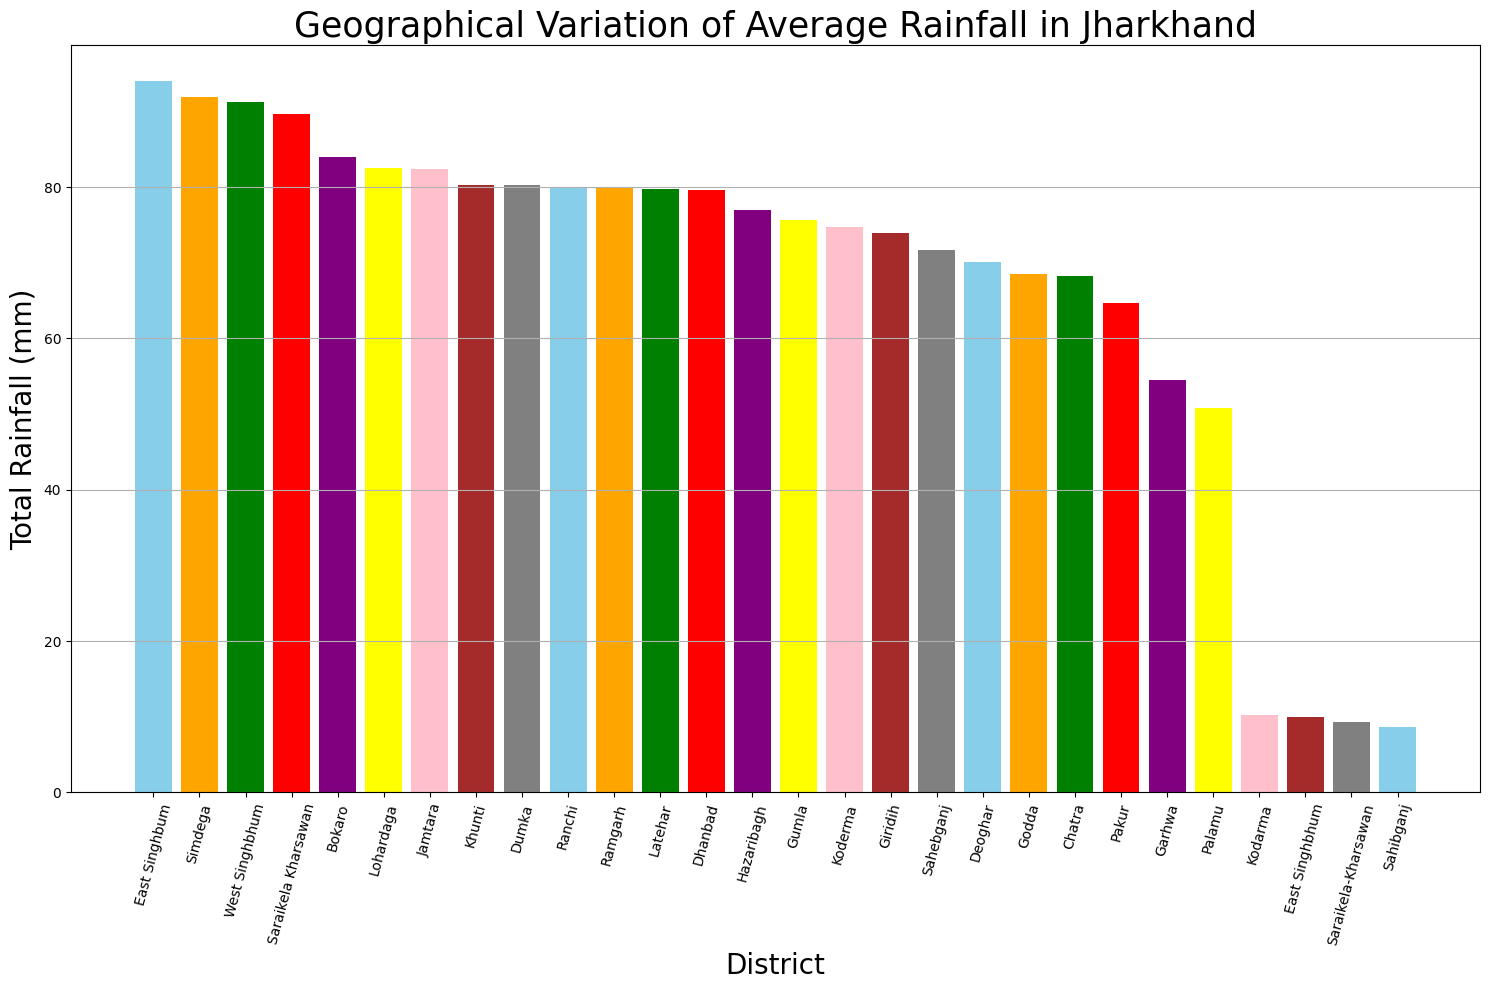

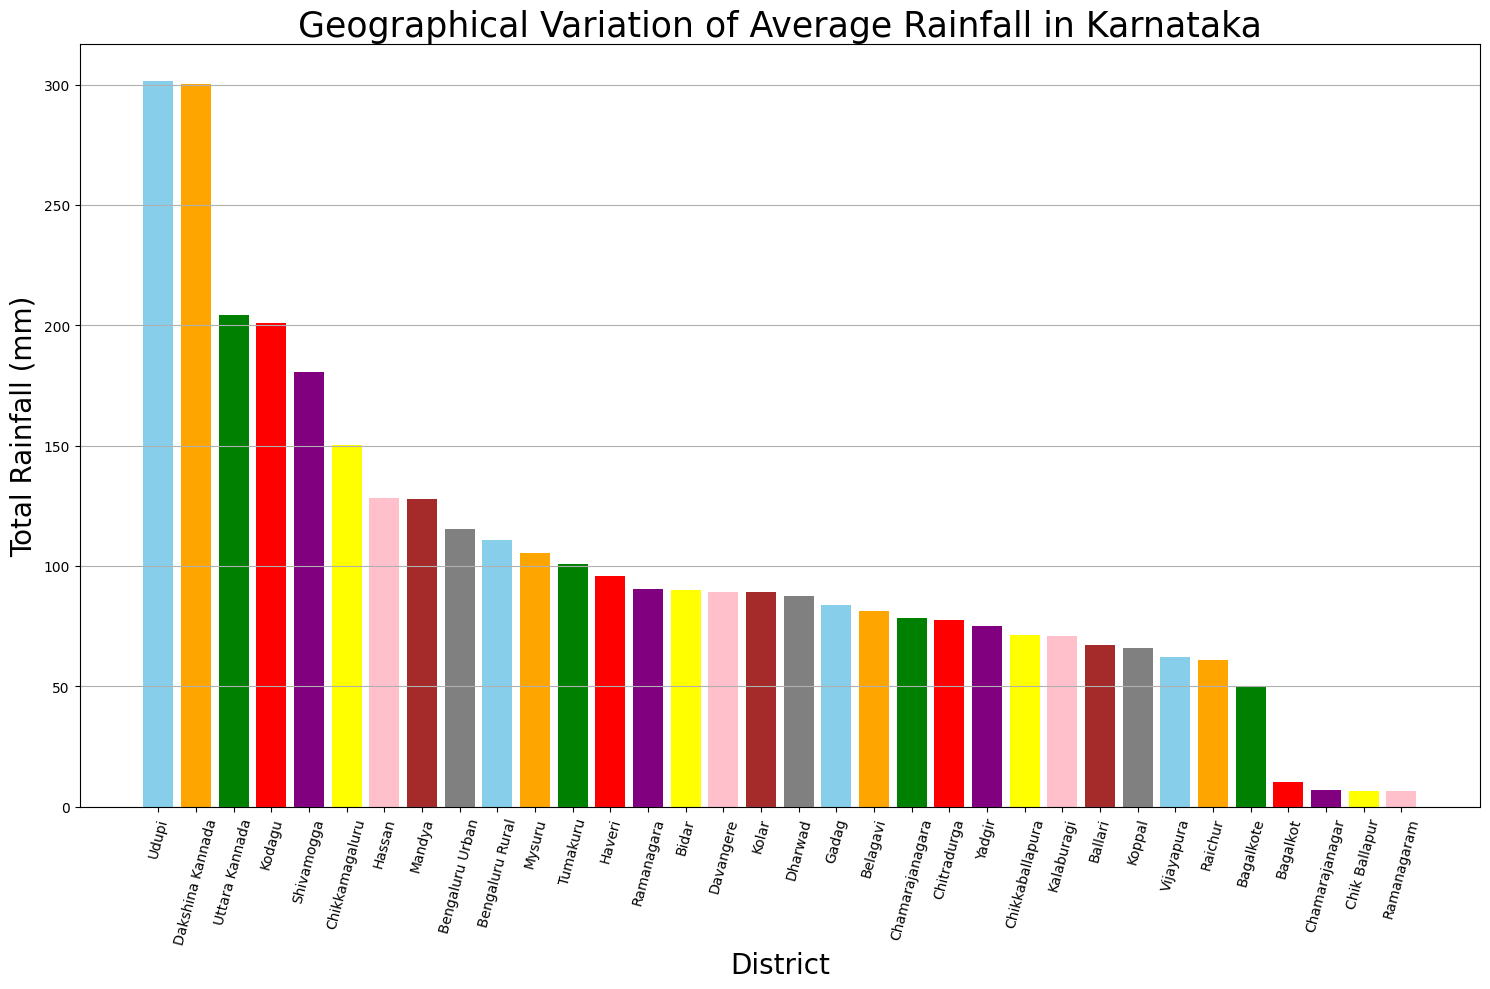

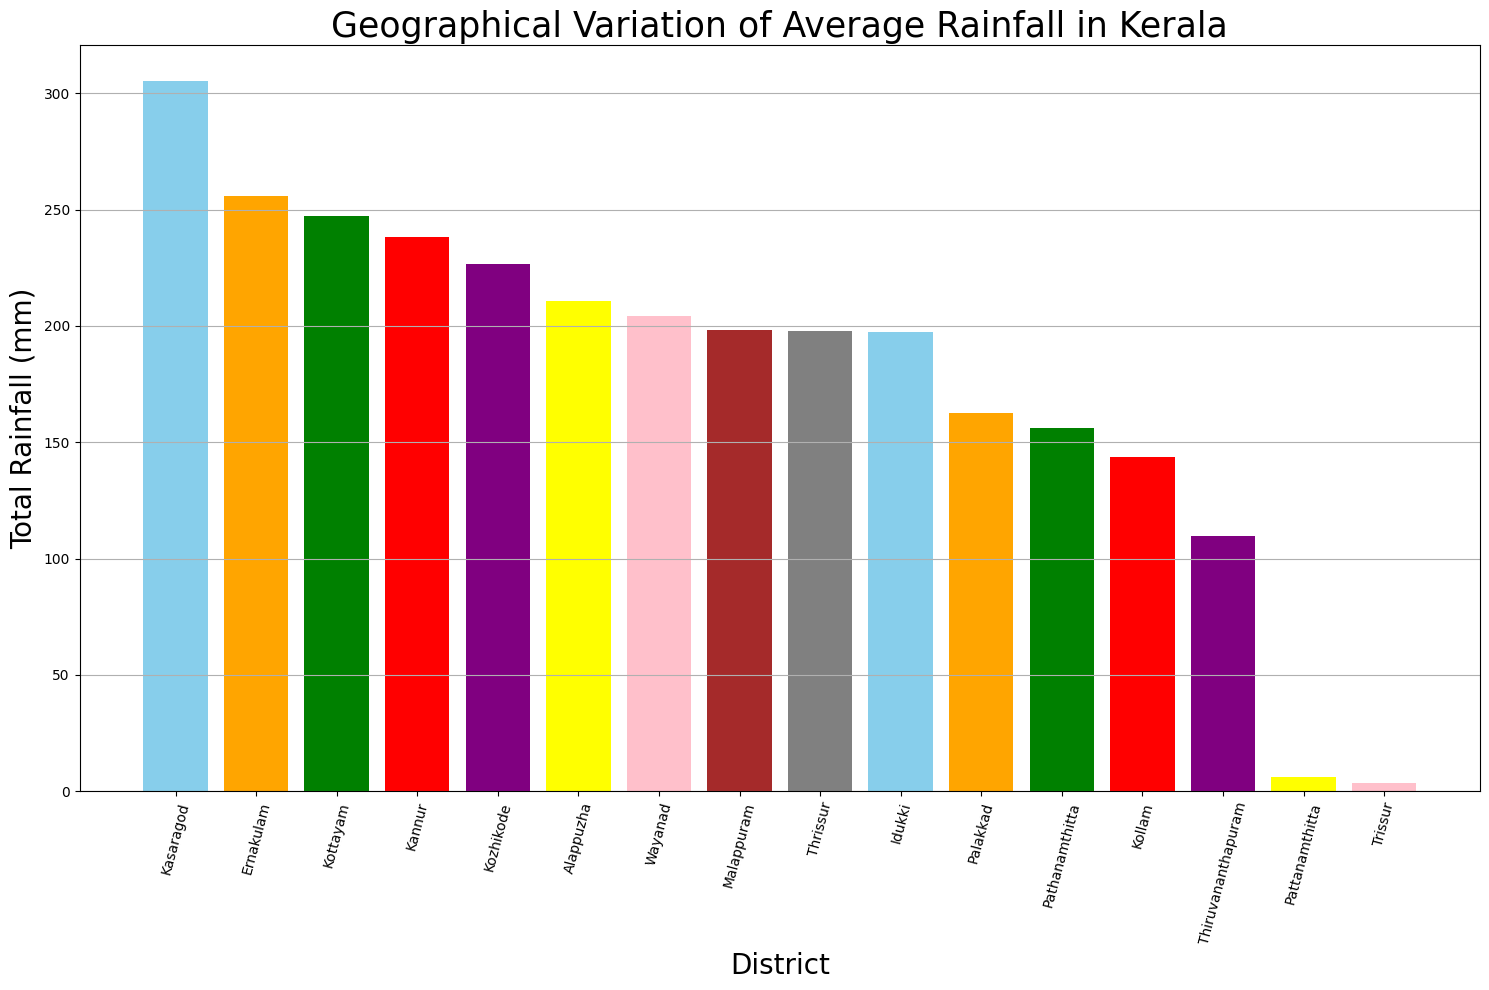

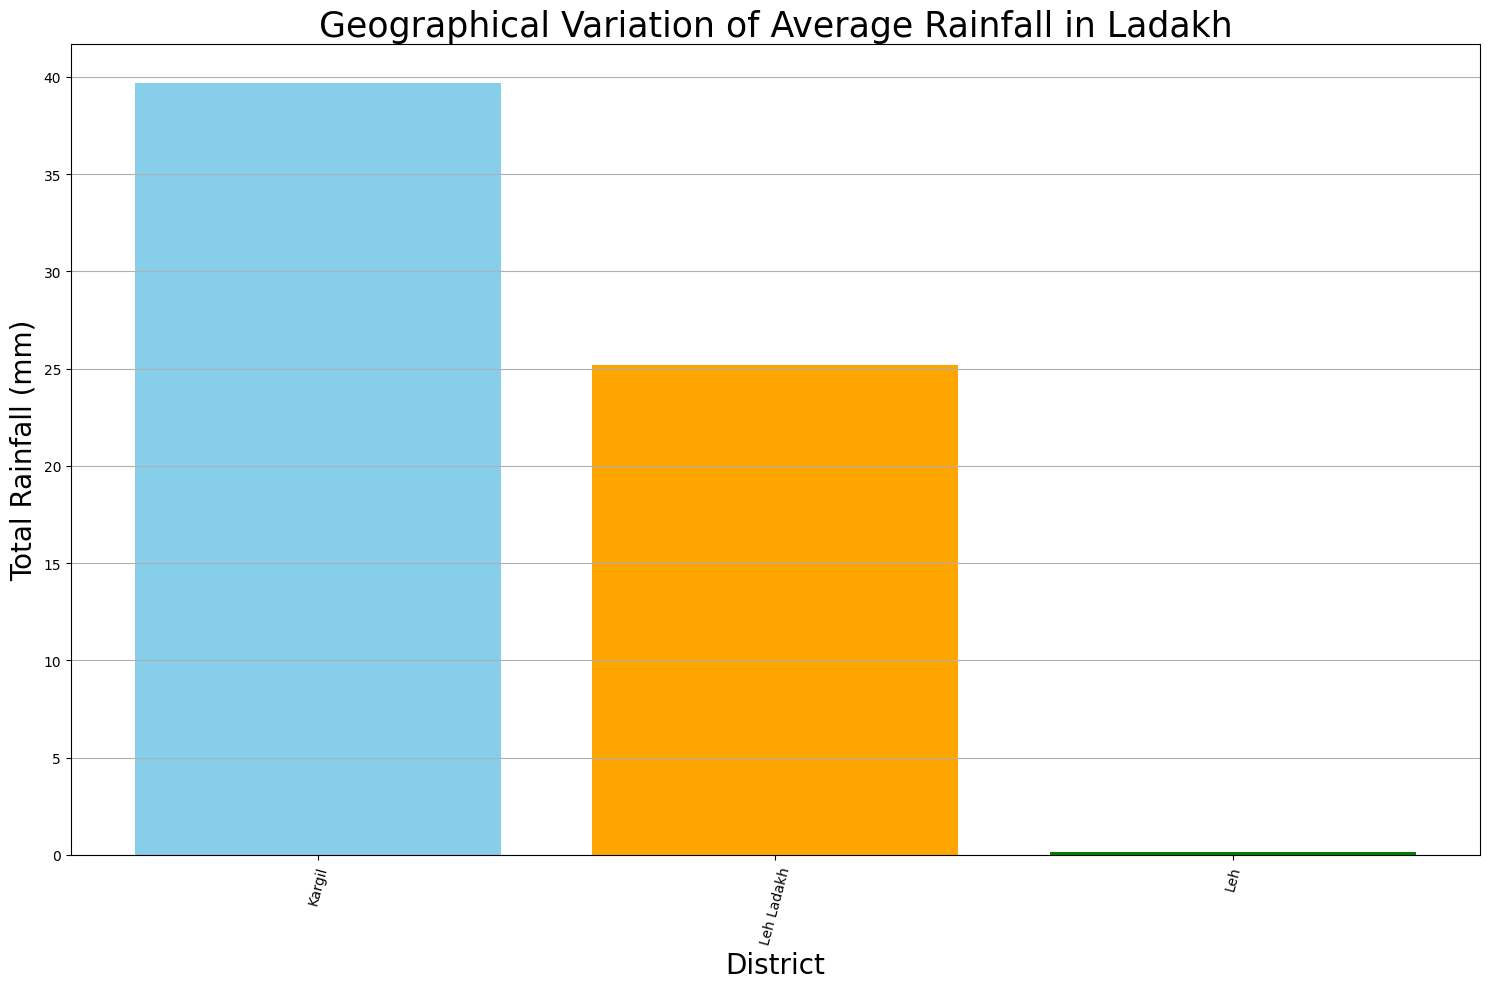

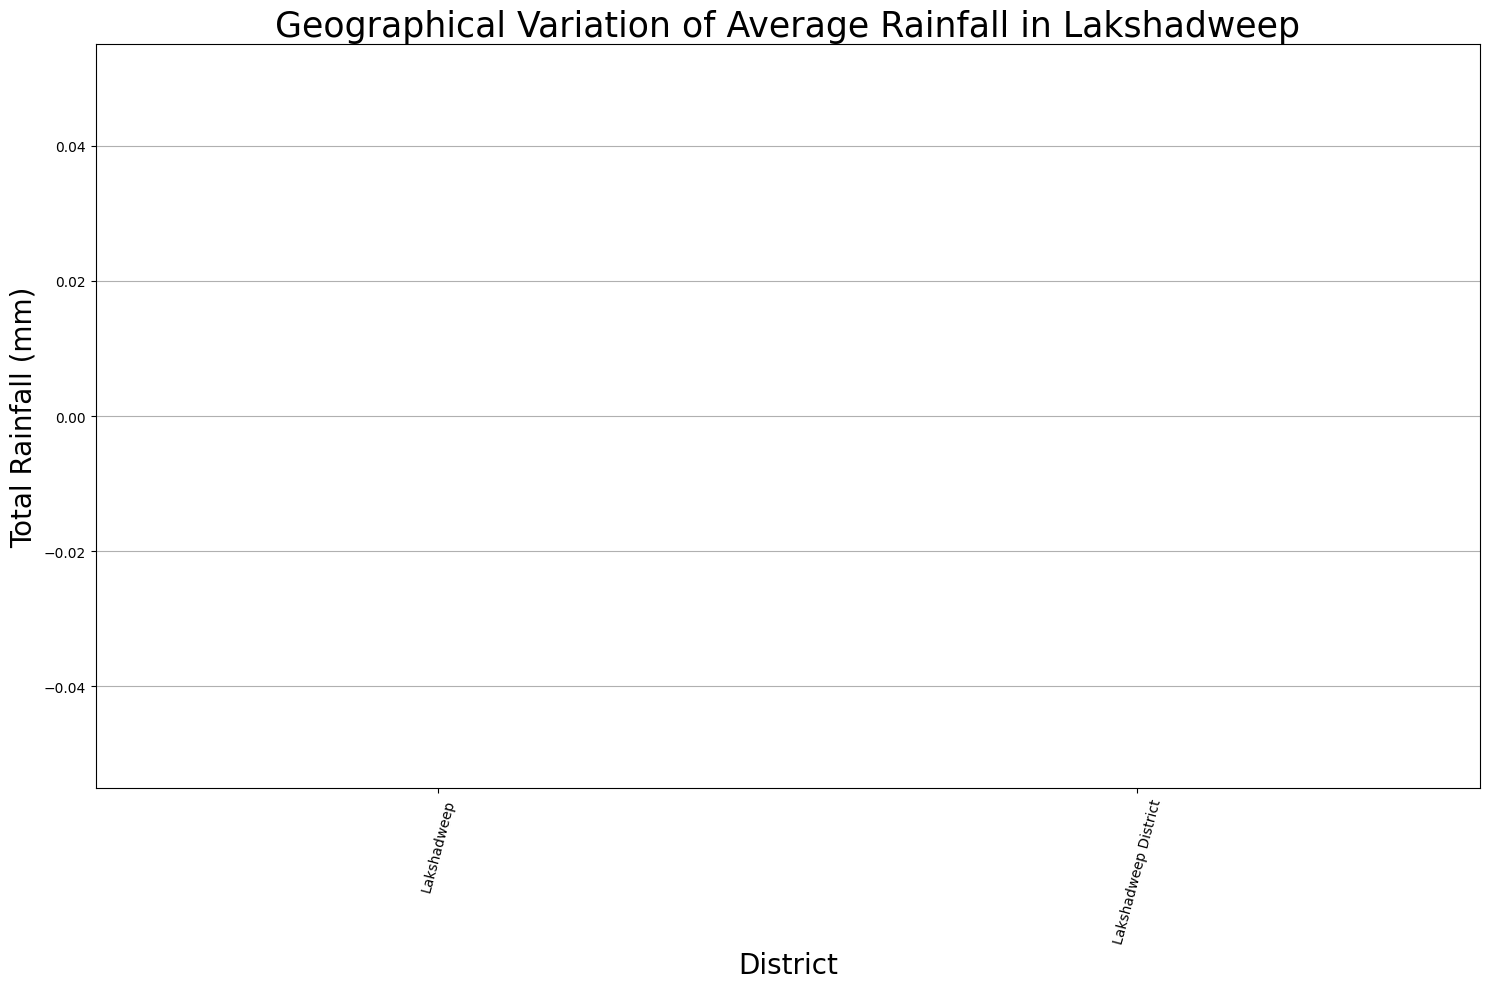

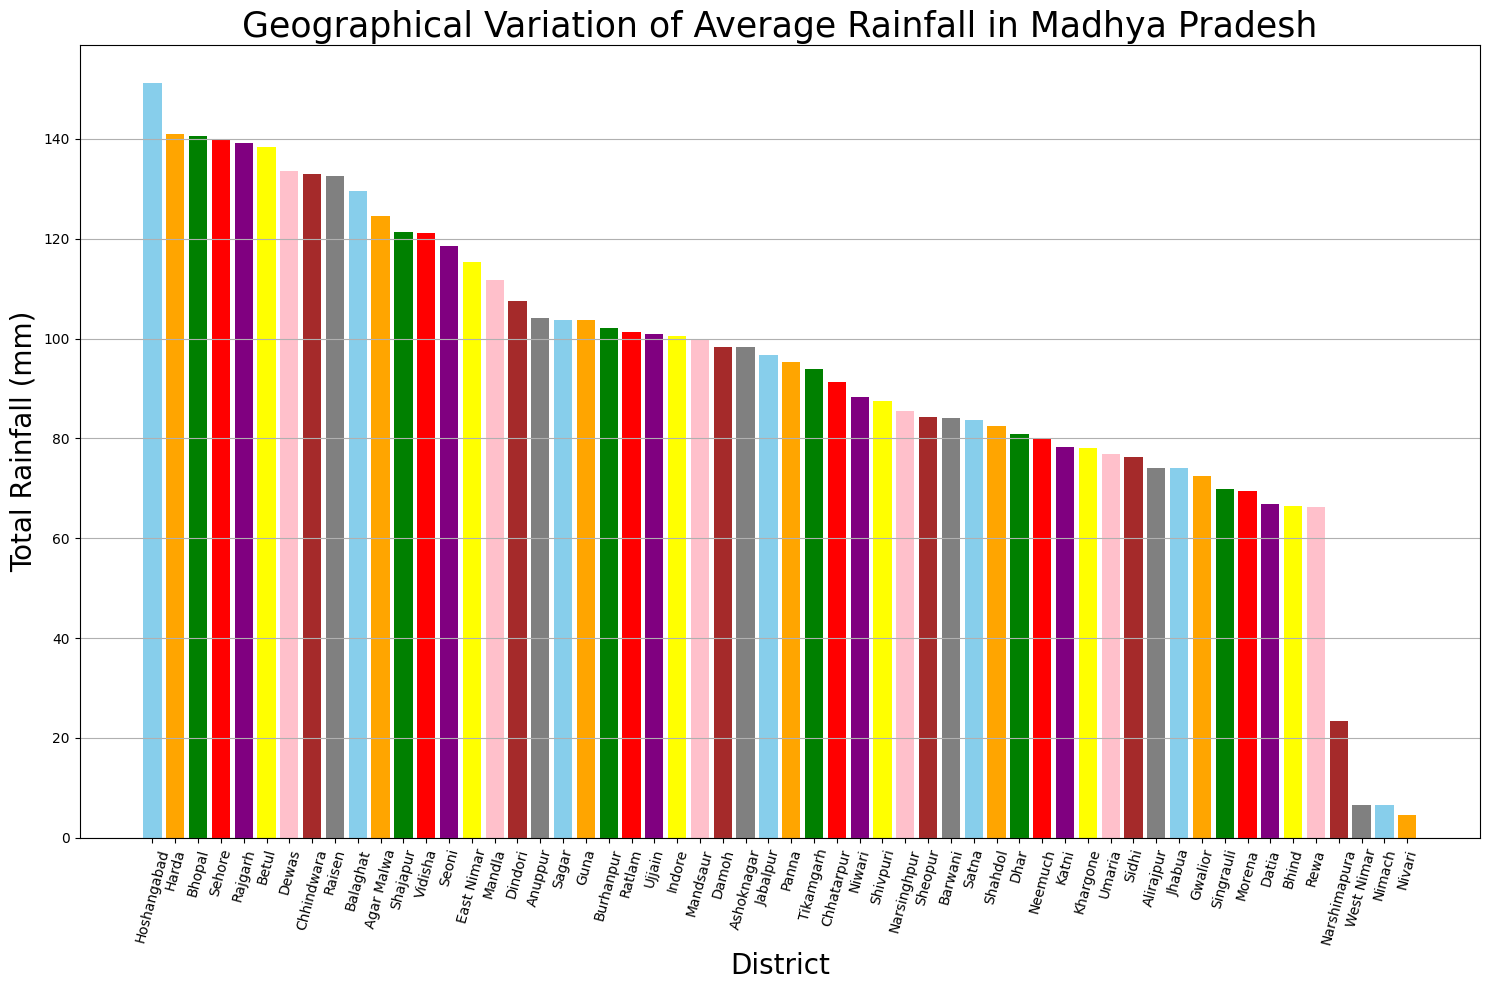

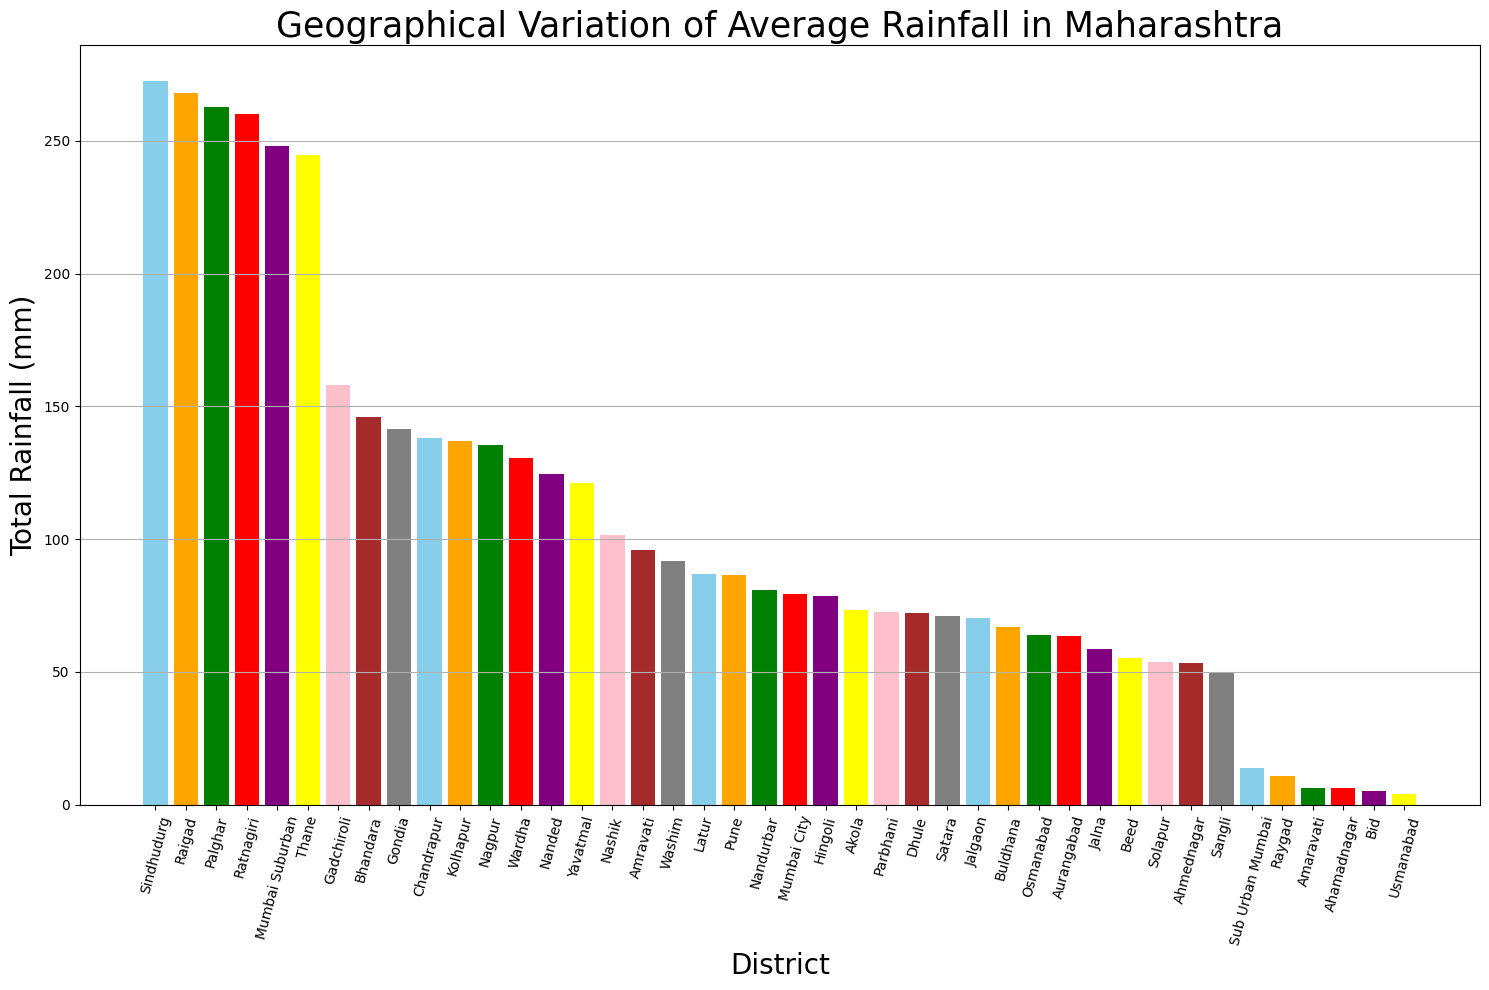

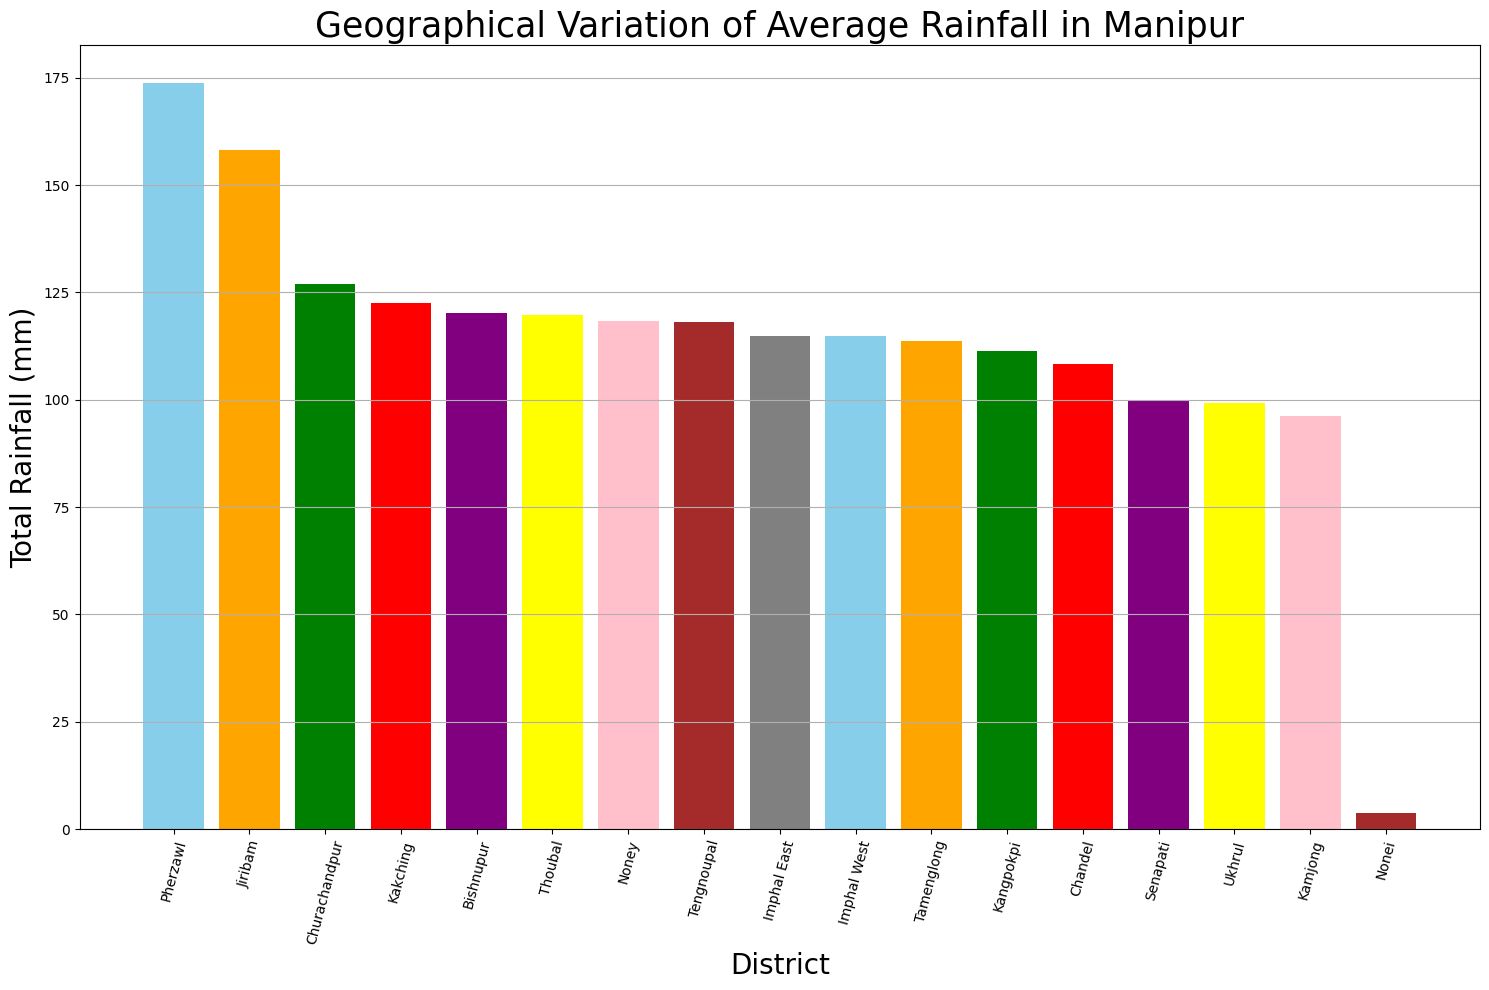

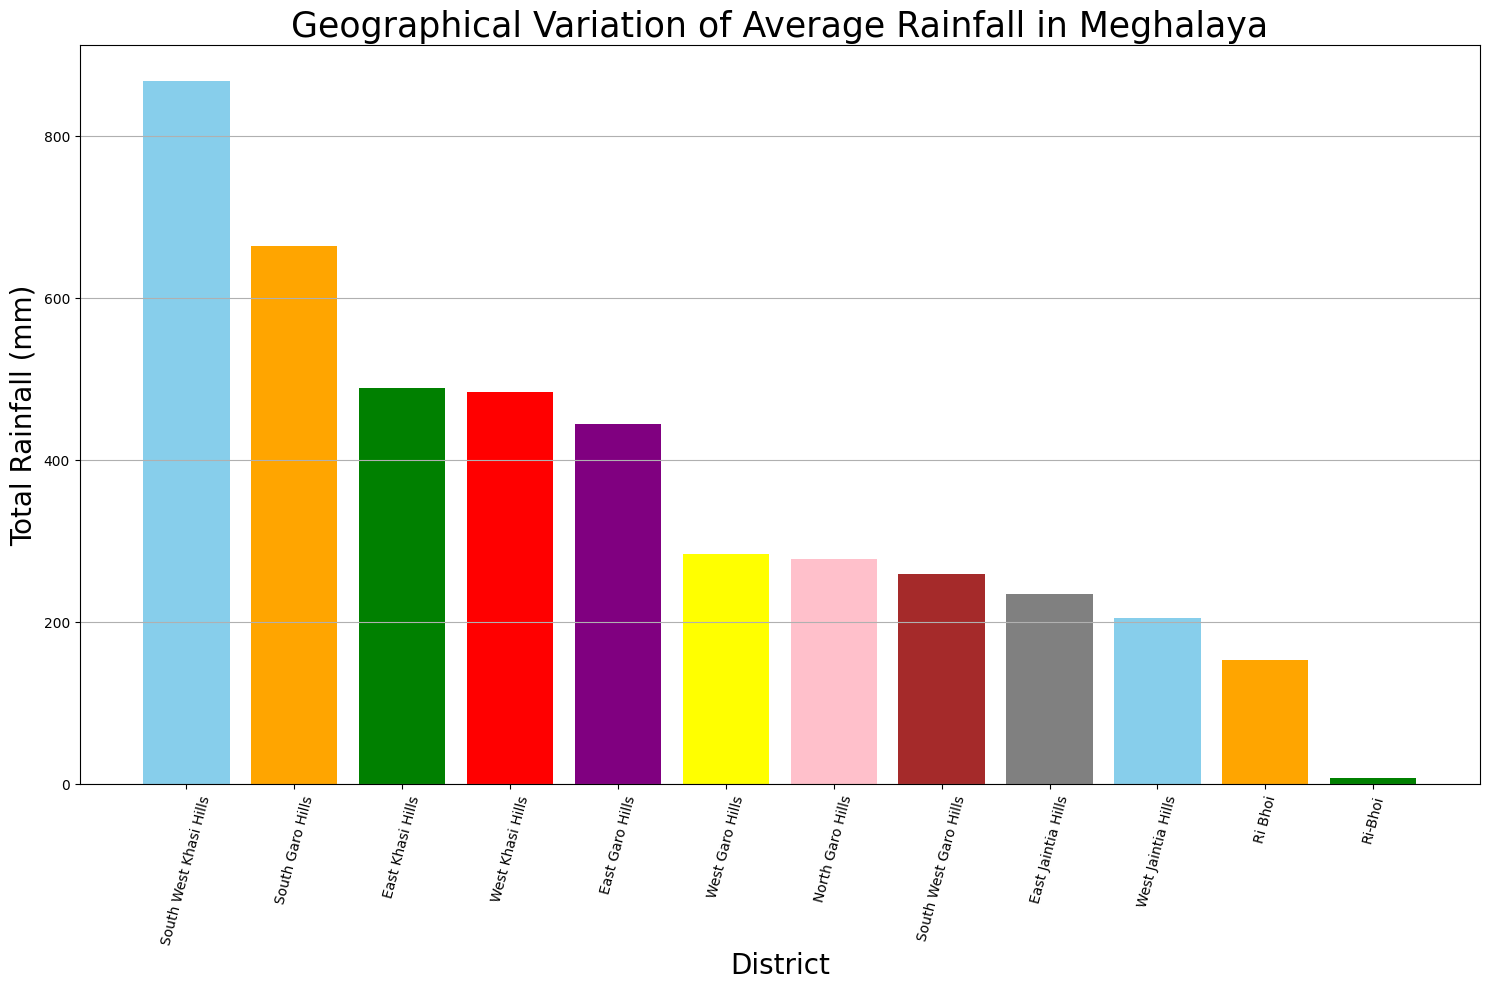

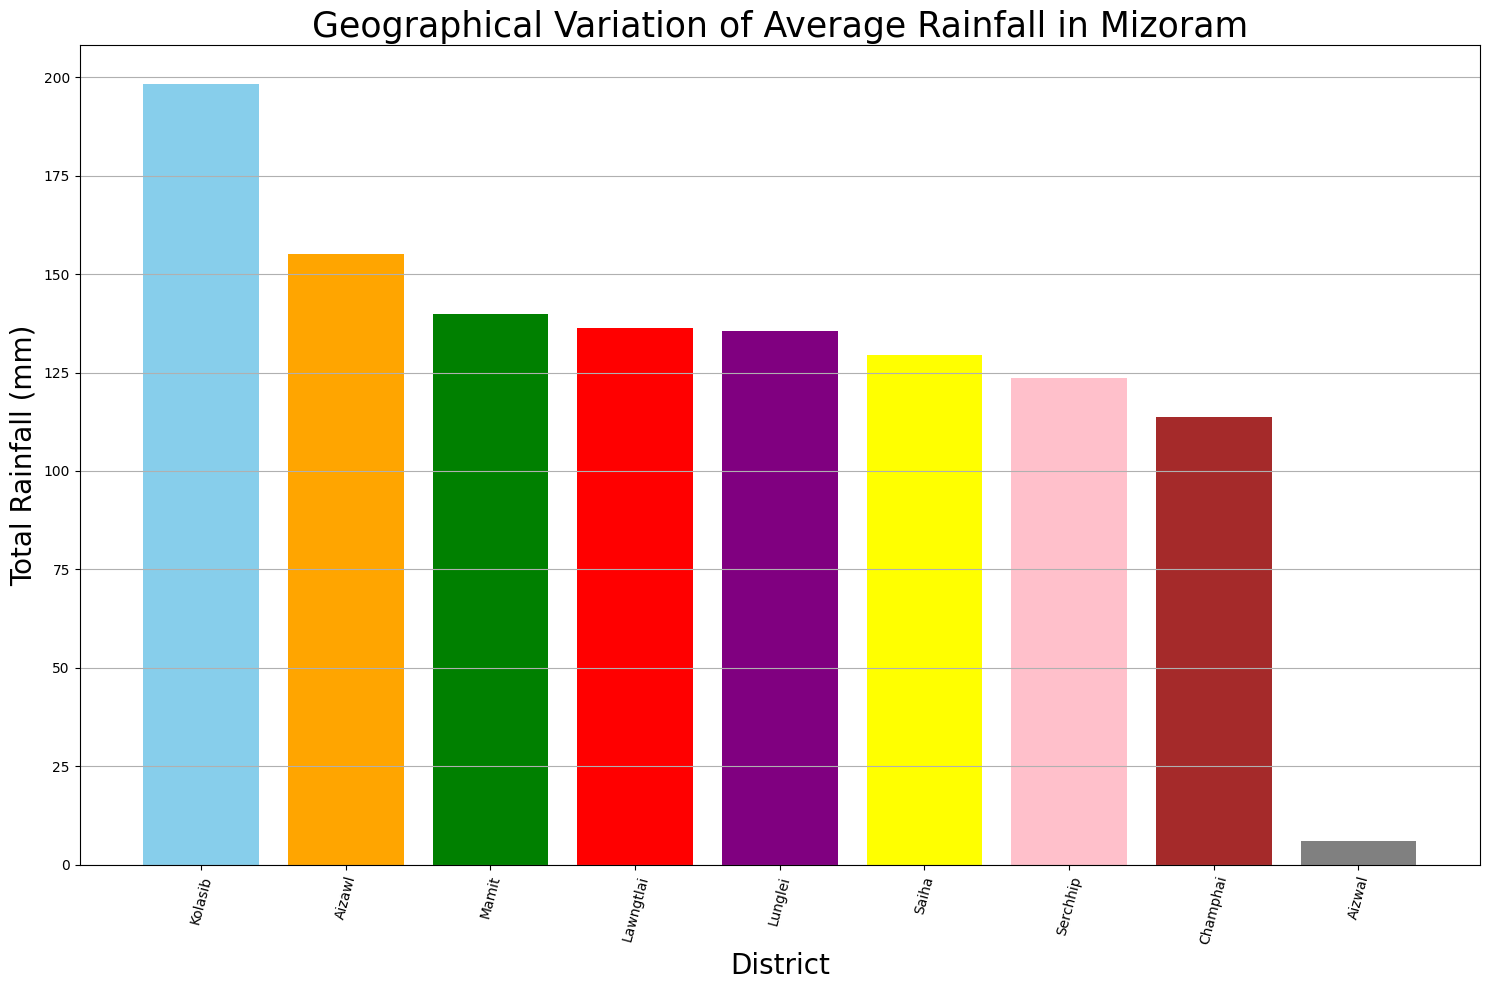

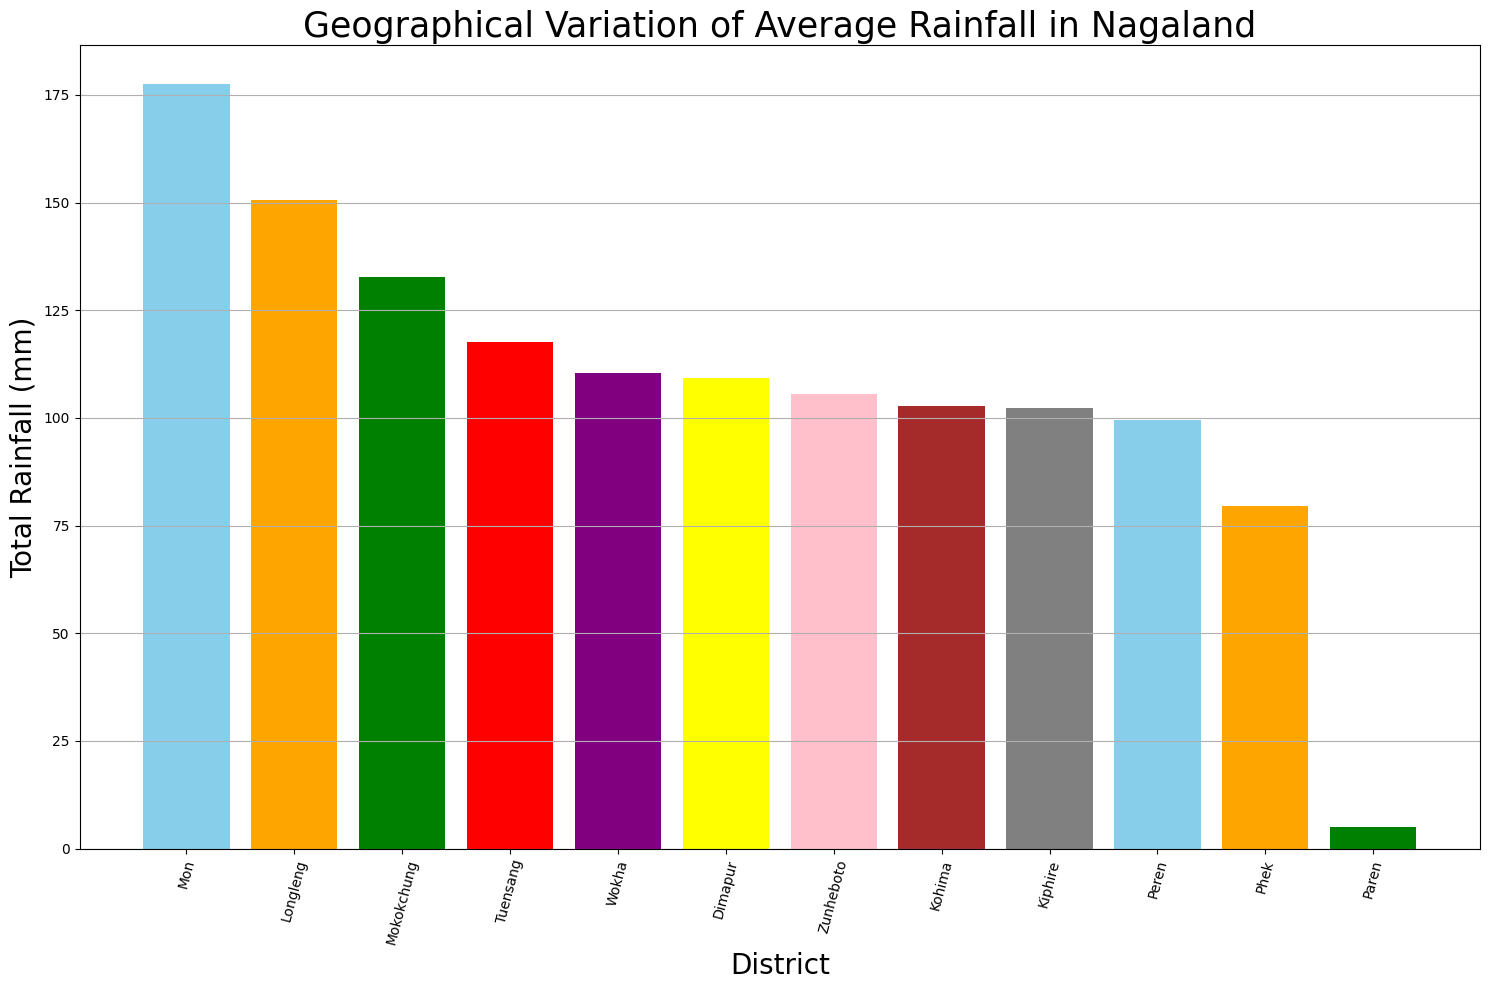

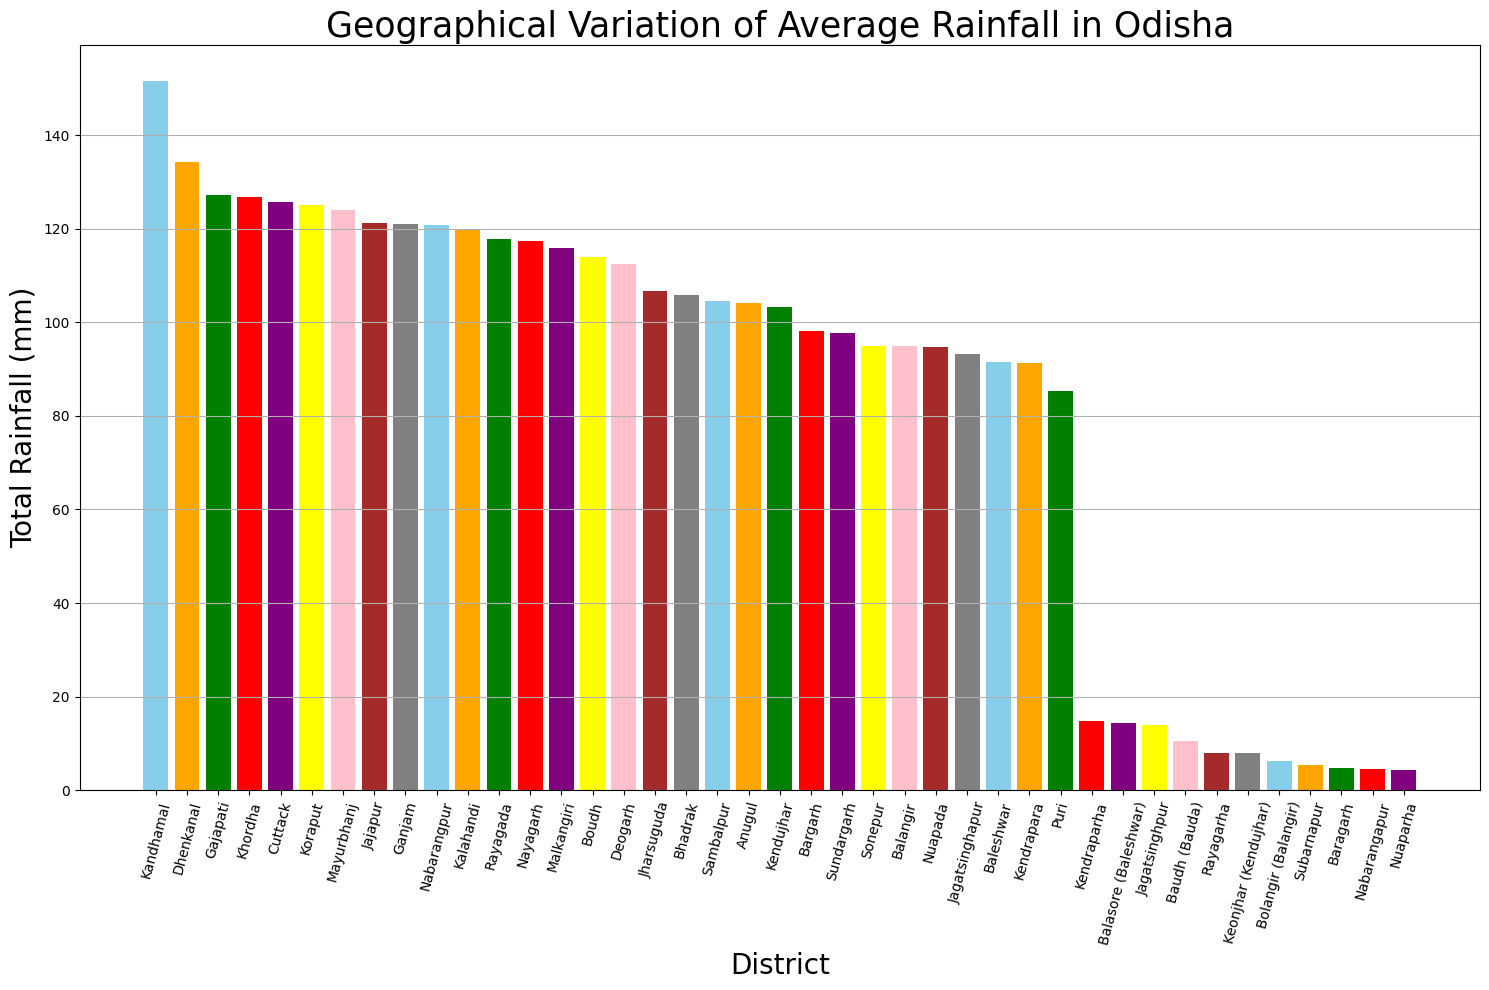

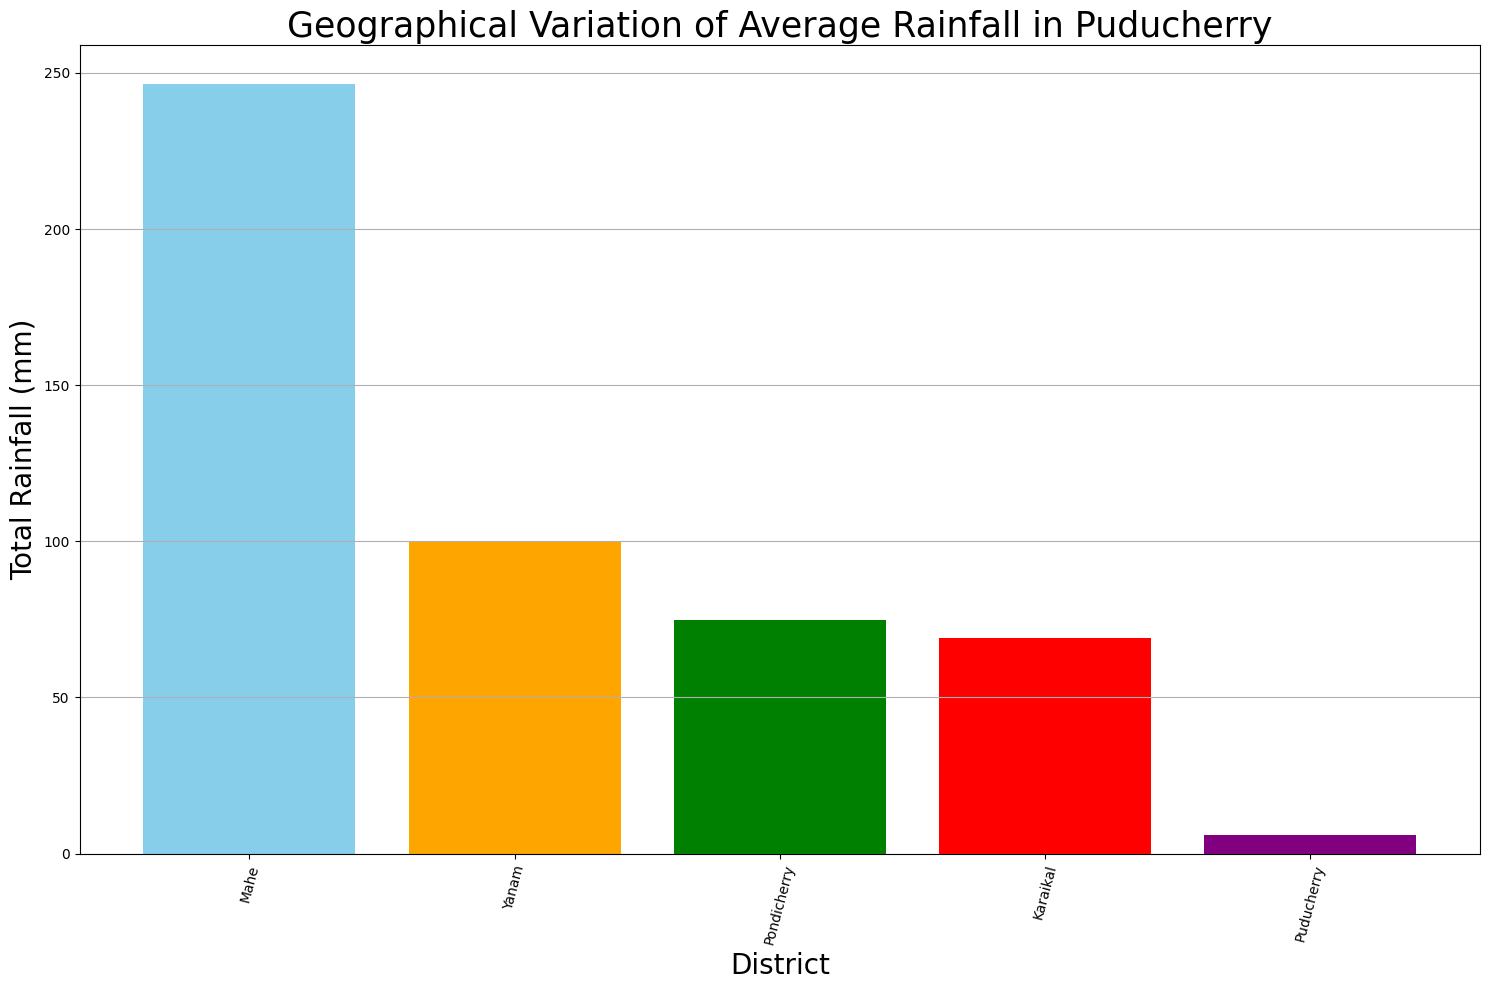

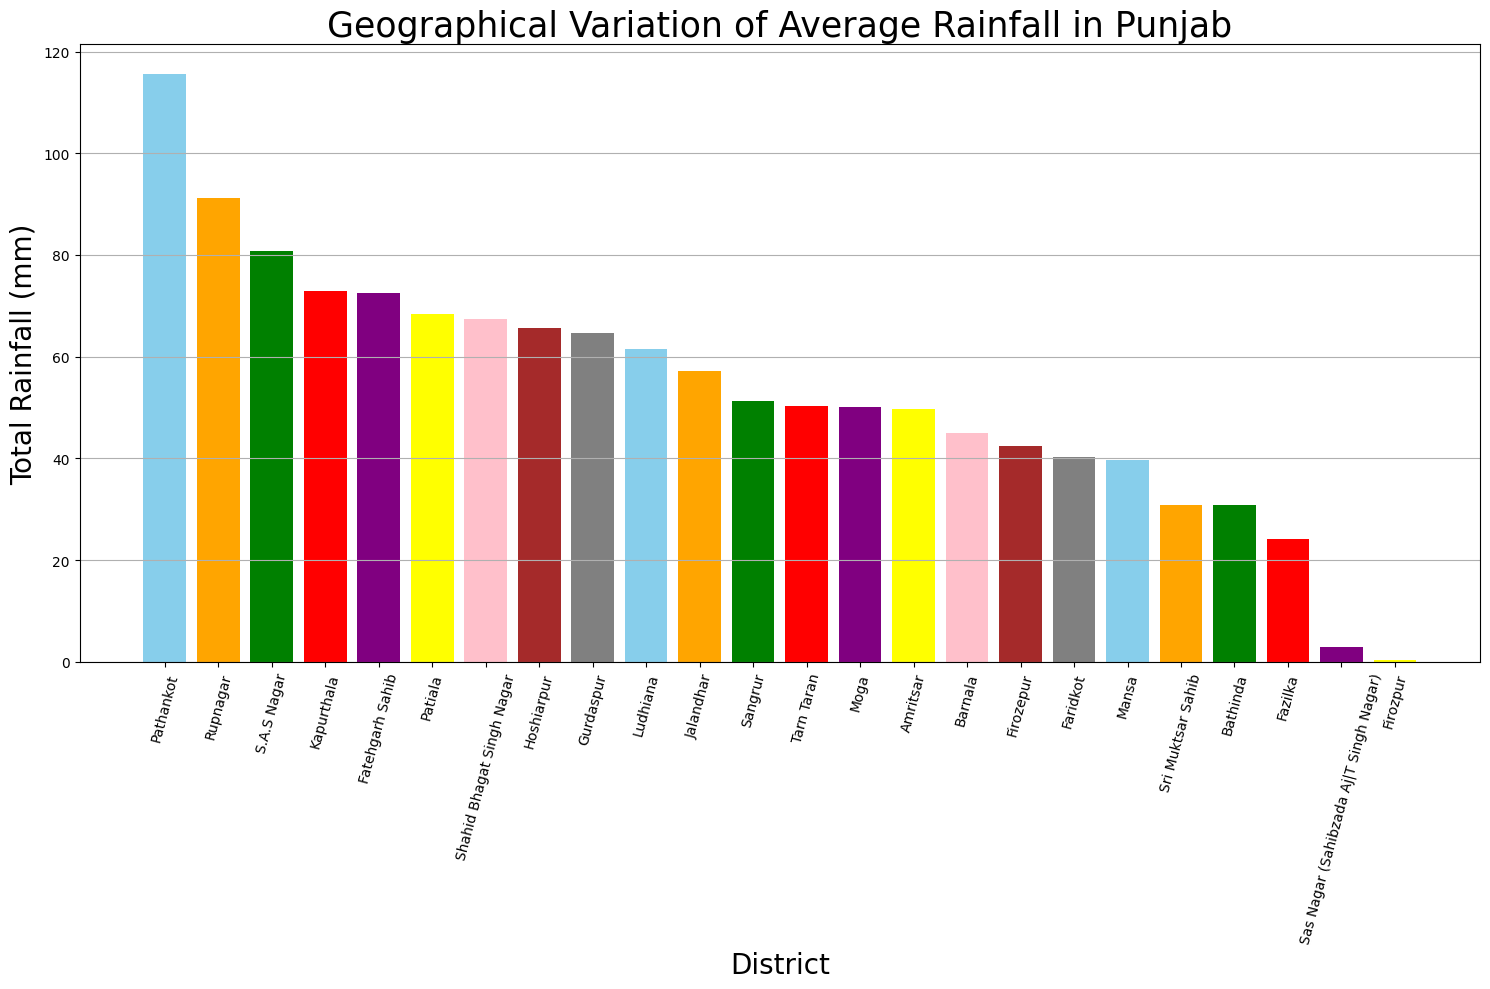

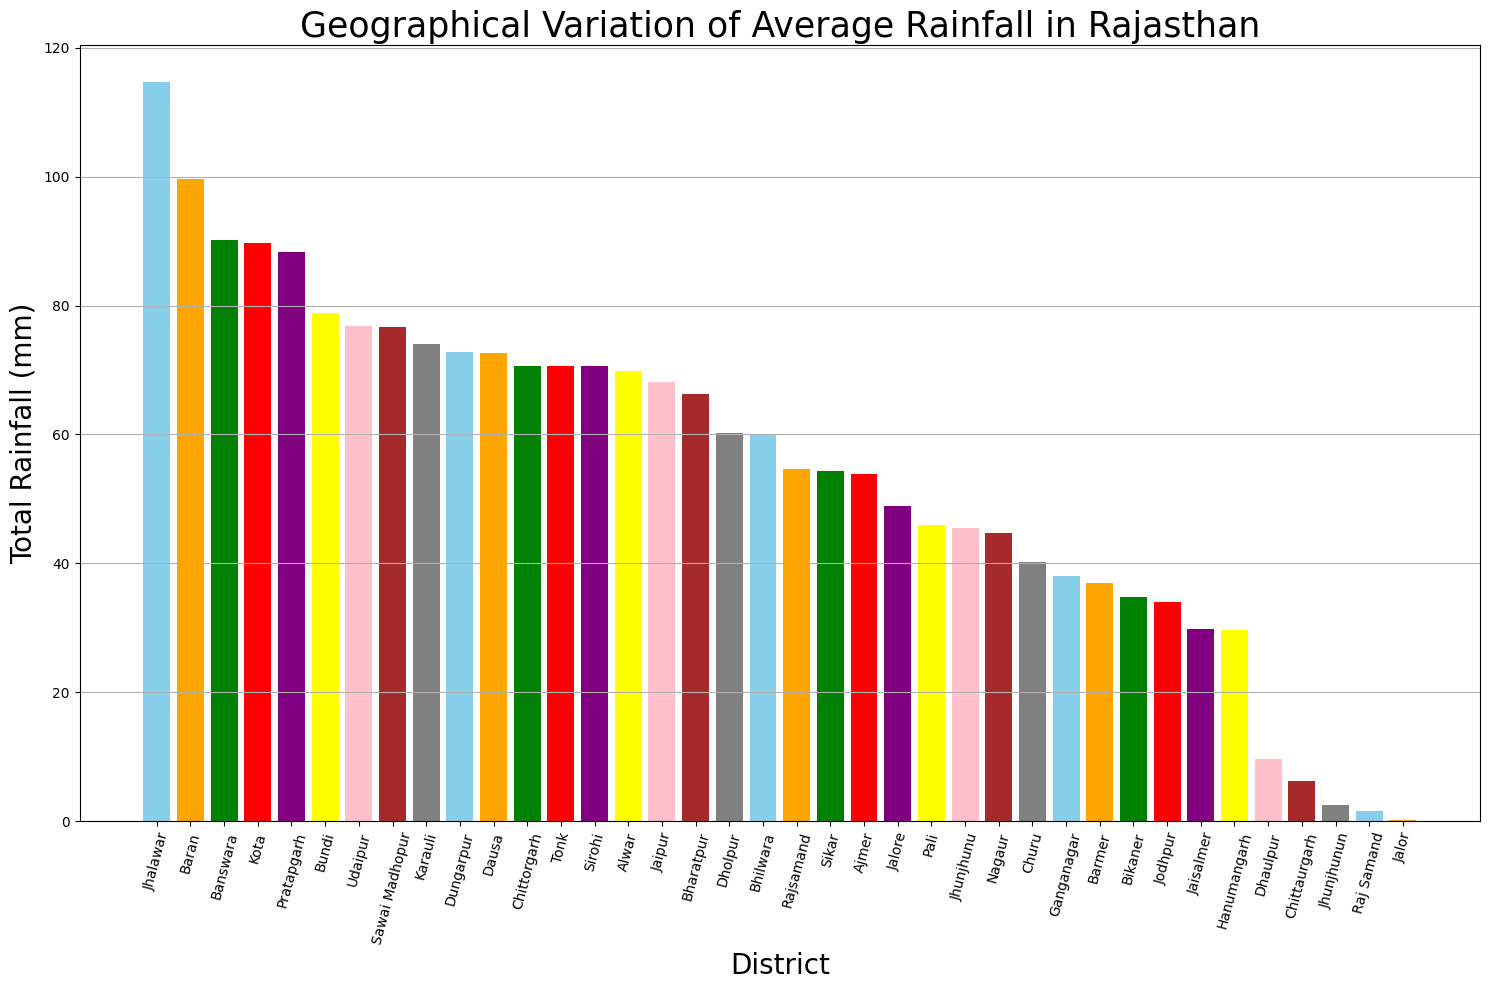

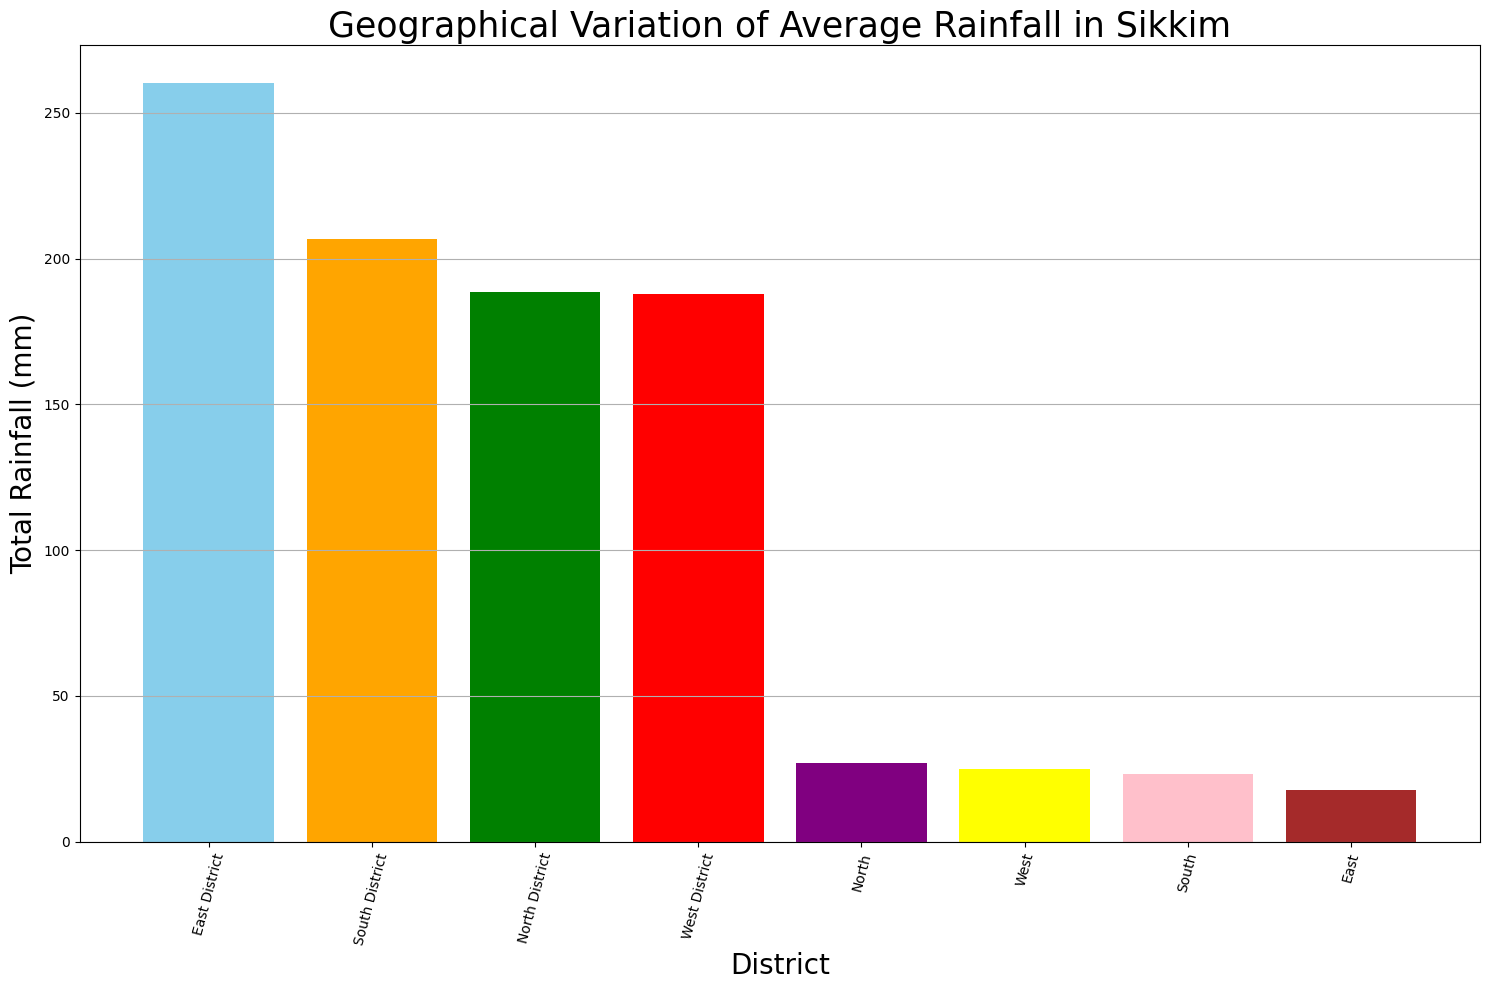

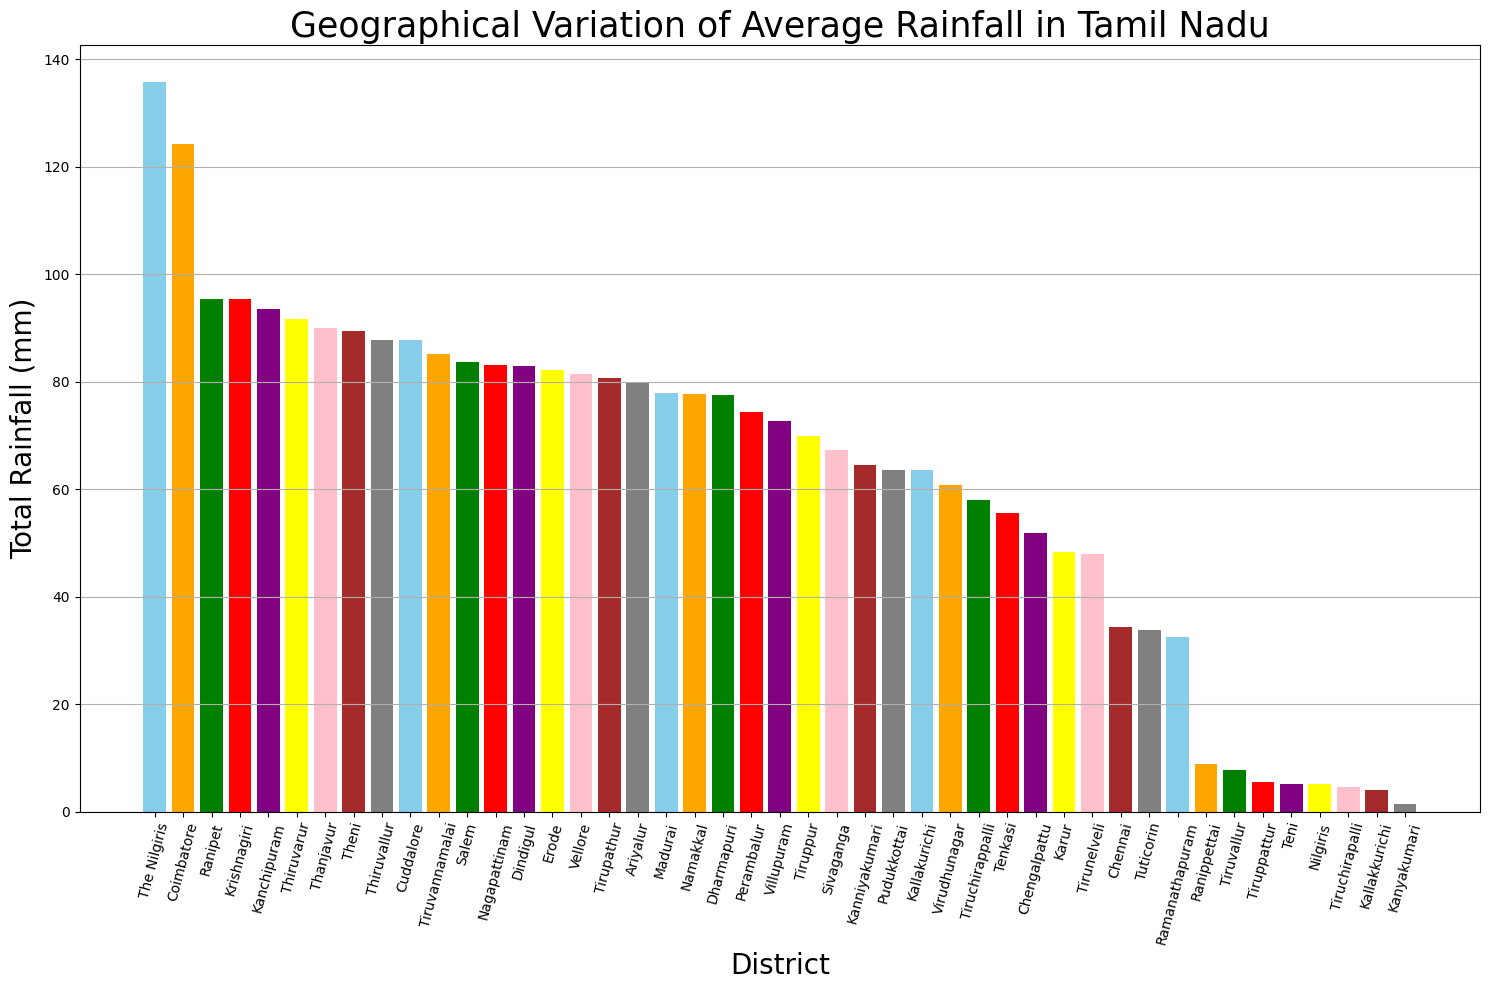

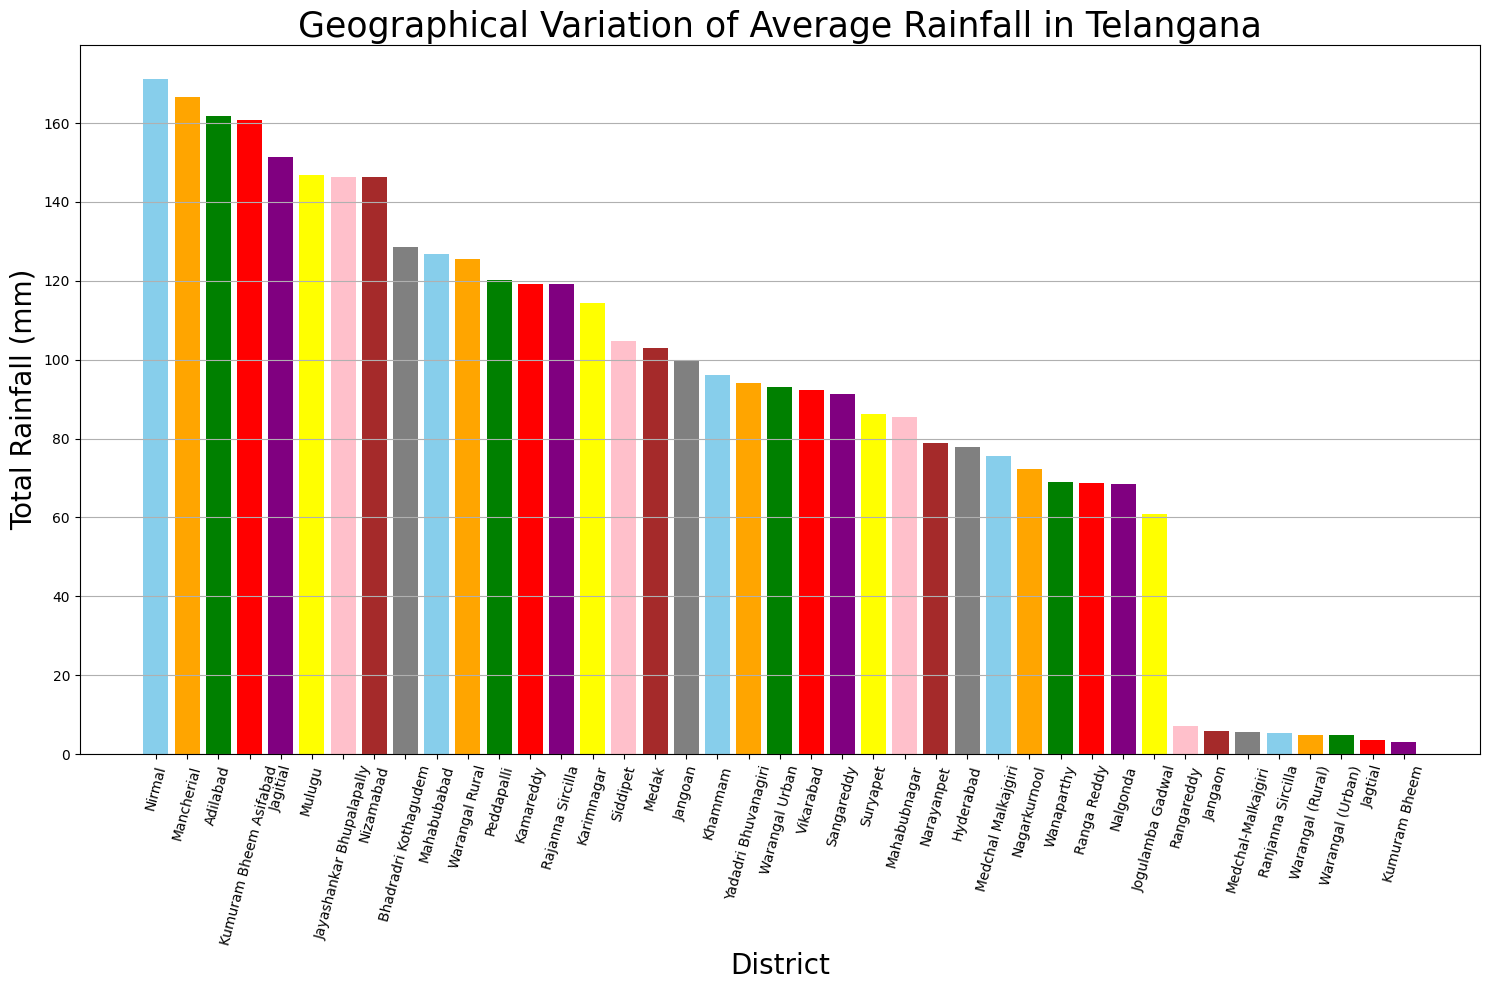

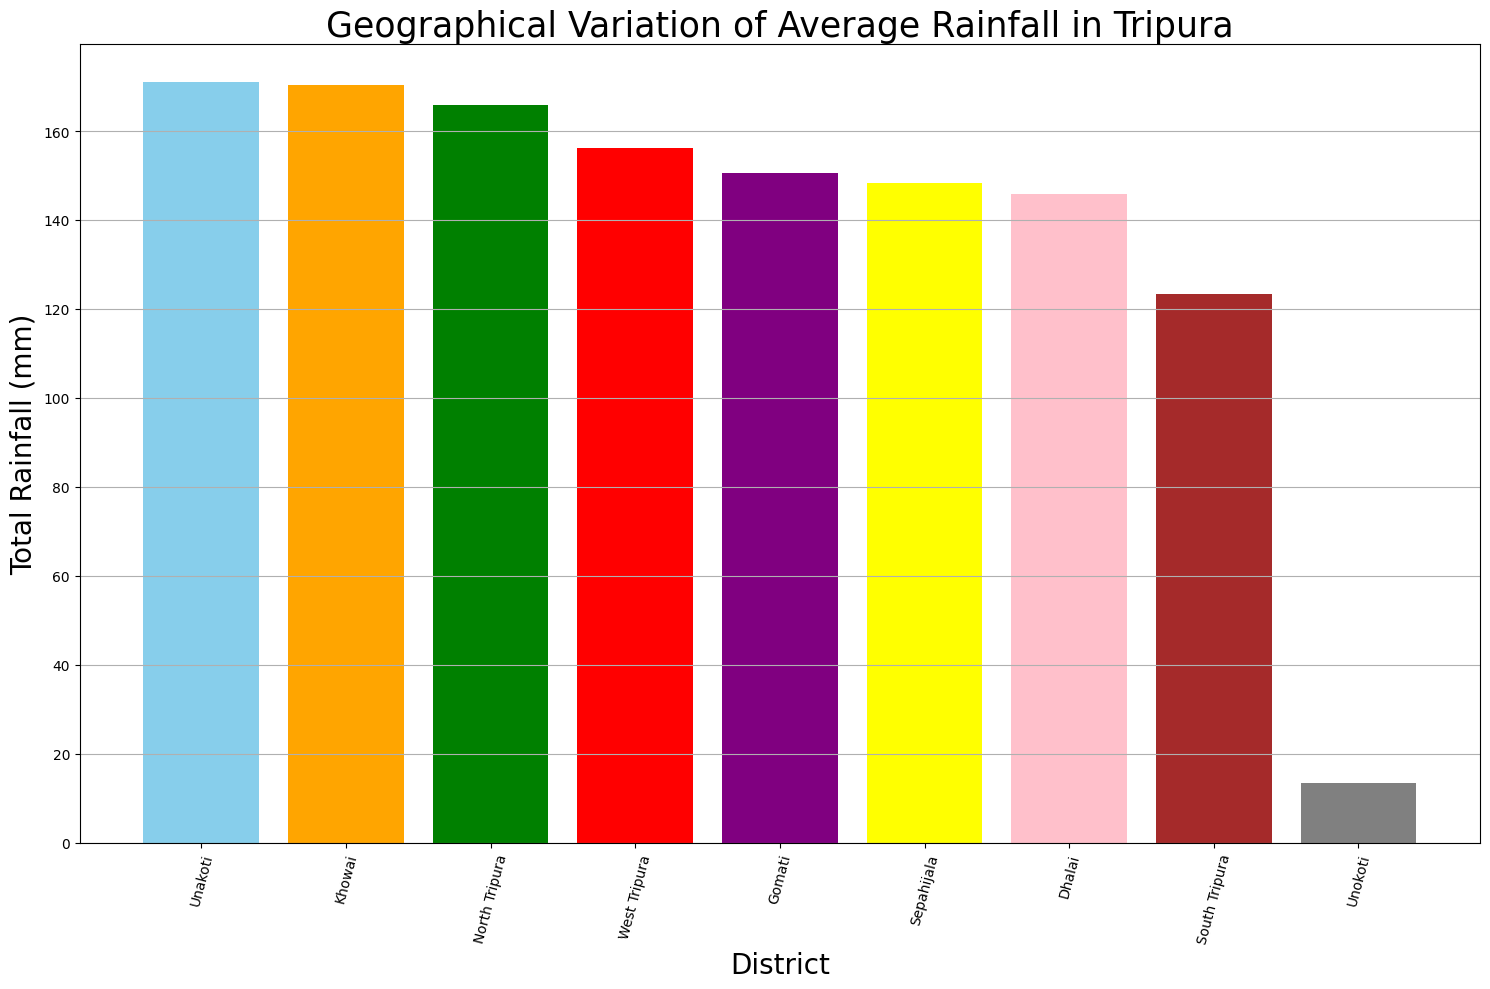

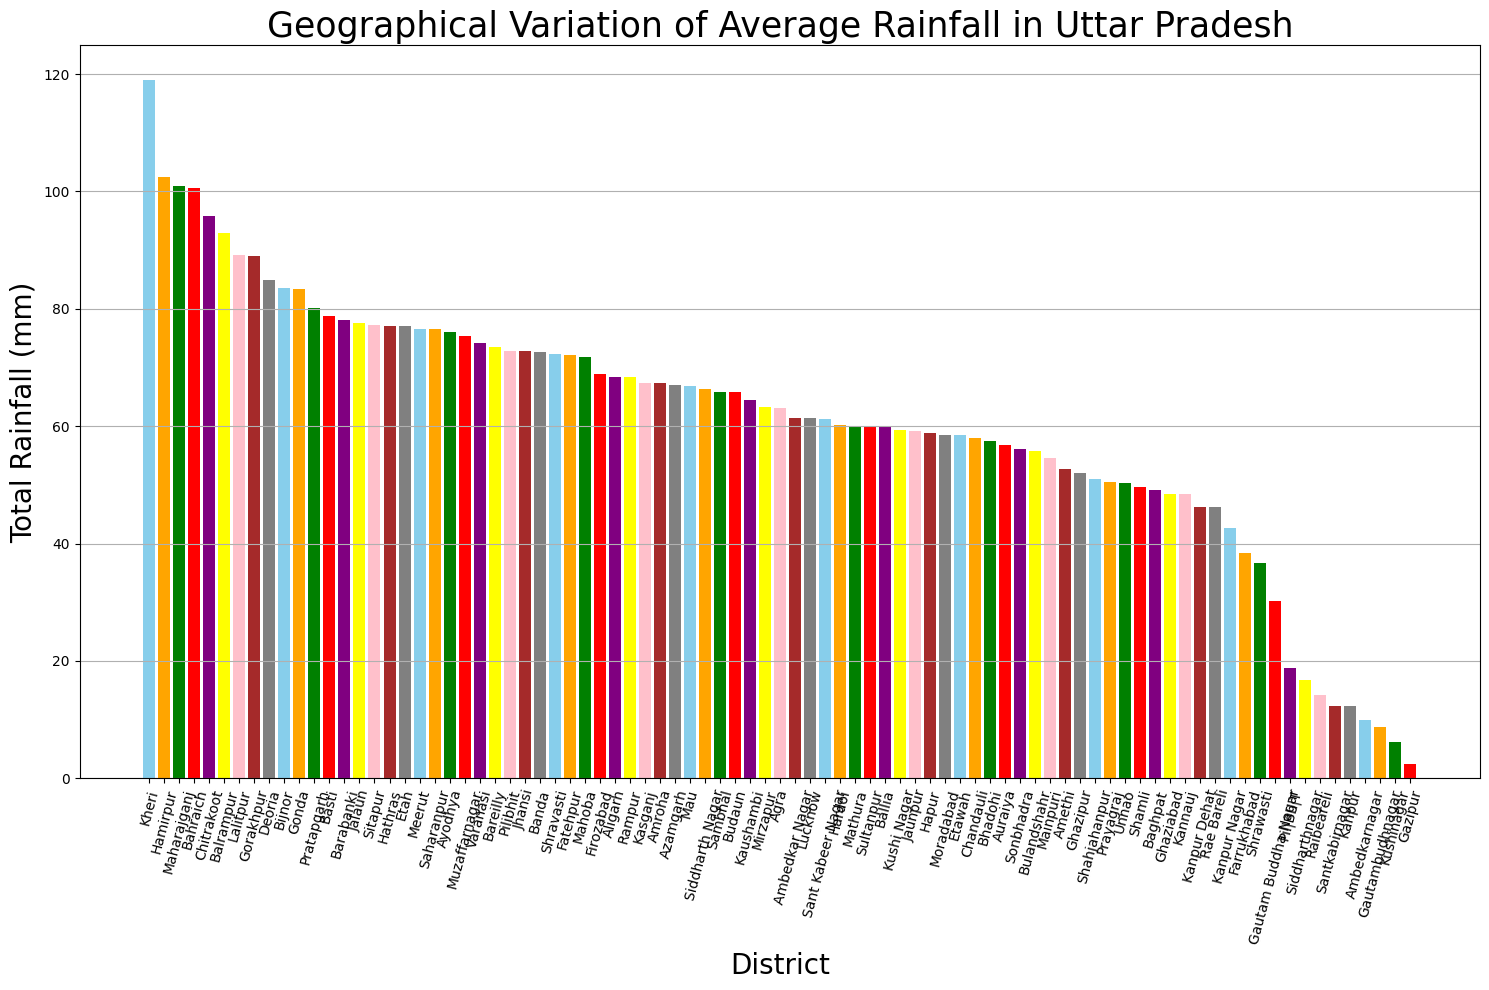

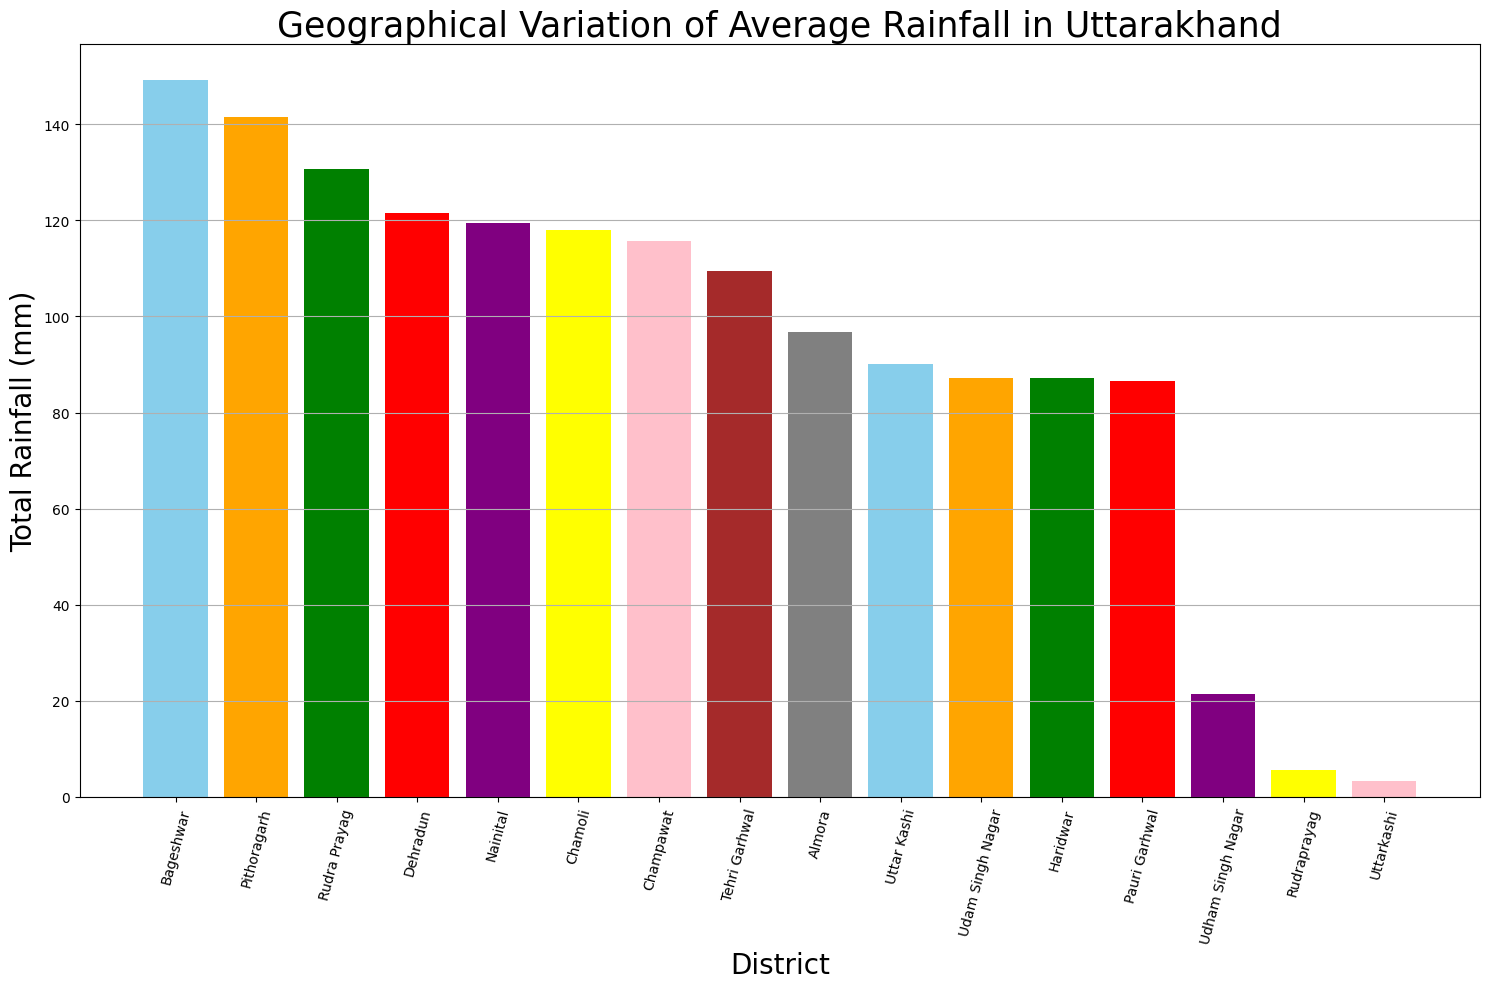

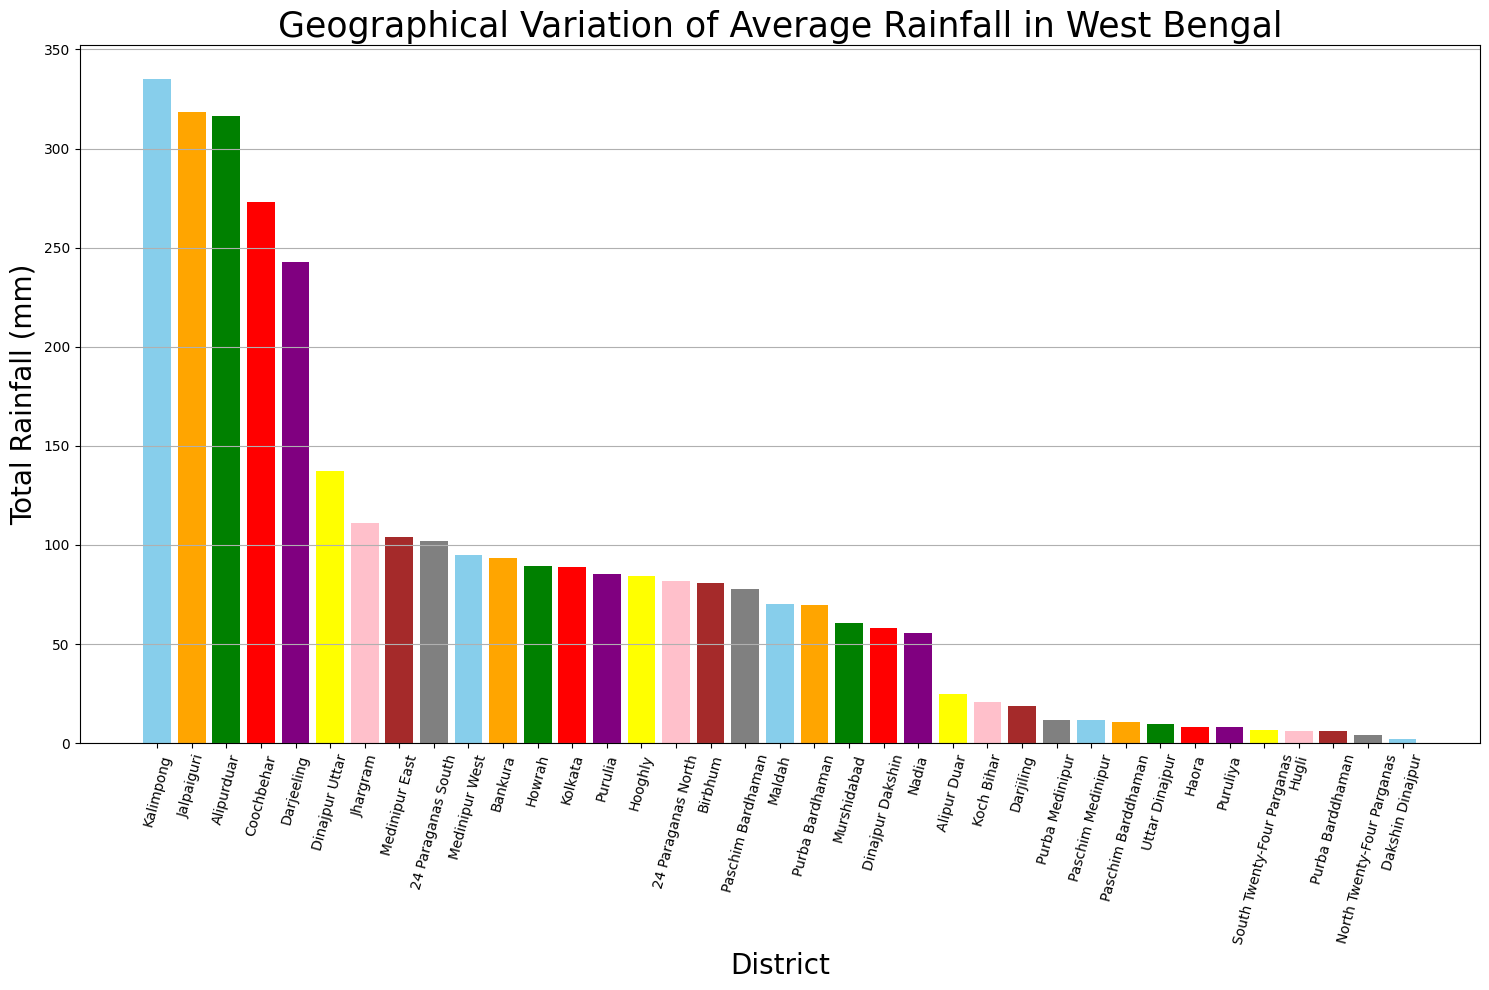

In [25]:
# Group the data by 'State' and 'District' and calculate the total rainfall for each district in each State
state_district_rainfall=df.groupby(['State','District'])['Total'].sum()
state_district_rainfall=state_district_rainfall/12
# Plot the geographical variation for each state using seperate bar plots
states=df.State.unique()
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'brown', 'grey']
for state in states:
    state_data=state_district_rainfall.loc[state].sort_values(ascending=False)
    plt.figure(figsize=(15,10))
    plt.bar(state_data.index,state_data.values,color=colors[:len(state_data)])
    plt.xlabel('District',fontsize=20)
    plt.ylabel('Total Rainfall (mm)',fontsize=20)
    plt.title(f'Geographical Variation of Average Rainfall in {state}',fontsize=25)
    plt.xticks(rotation=75)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

__From the above plots of all states in the India, we can see the rainfall of every district__

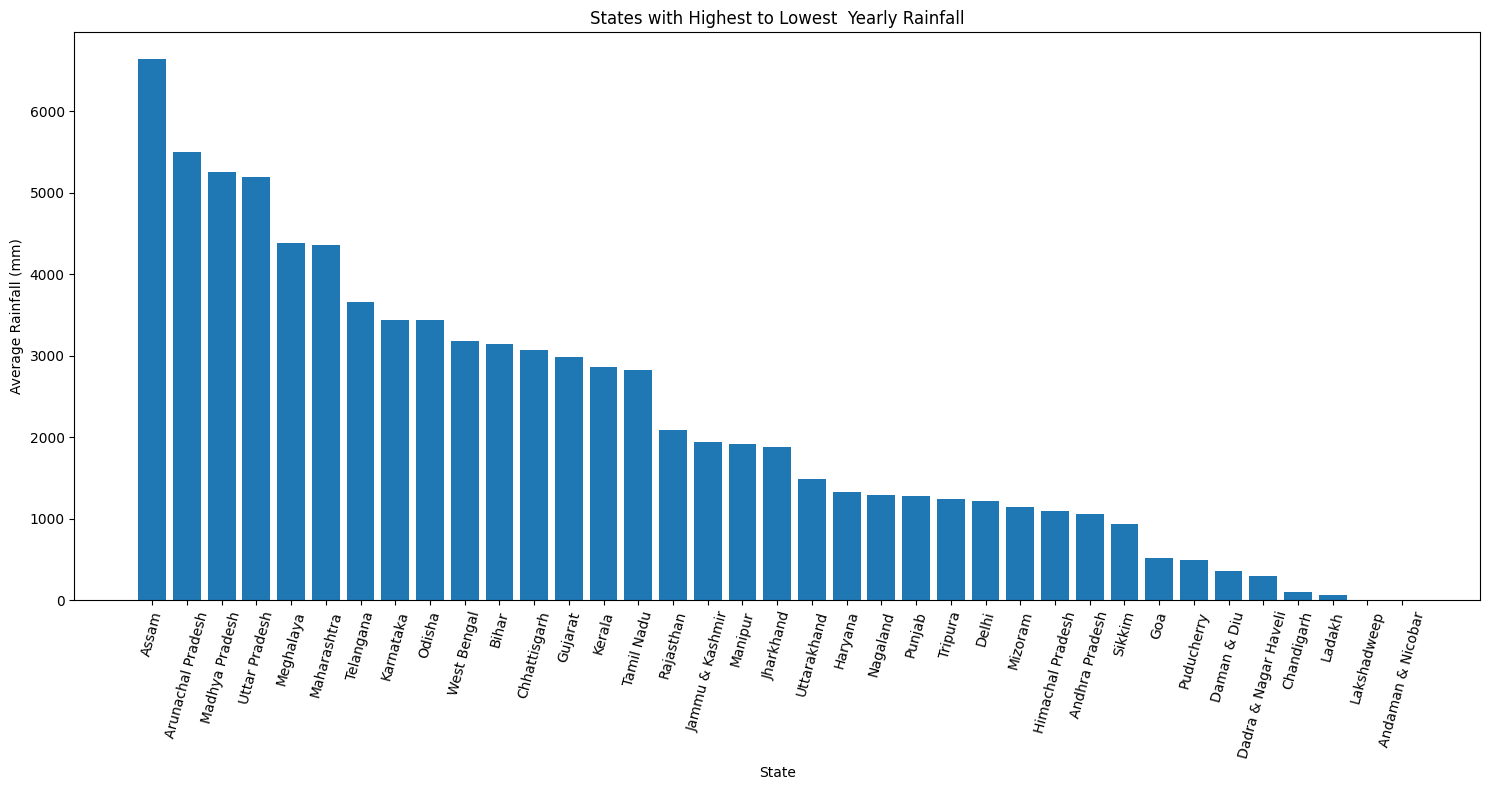

In [26]:
# Group the data by 'State' and calculate the total rainfall for each state
state_total_rainfall=df.groupby('State')['Total'].sum()
state_total_rainfall=state_total_rainfall/12
# Sort the states based on total rainfall in descending order to find the highest and lowest rainfall states
highest_rainfall_states=state_total_rainfall.sort_values(ascending=False)
# Create a bar plot to show all states in descending order of total rainfall
plt.figure(figsize=(15, 8))
plt.bar(highest_rainfall_states.index, highest_rainfall_states.values)
plt.xlabel('State')
plt.ylabel('Average Rainfall (mm)')
plt.title('States with Highest to Lowest  Yearly Rainfall')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

__If we check the above figure, we can say that Assam have Total highest Rainfall and Andaman & Nicobar have Lowest Rainfall__

## Data Analysis

In [27]:
# Calculate statistics for each state
state_rainfall_statistics = df.groupby('State')['Total'].agg(['mean', 'median', 'max', 'min'])
state_rainfall_statistics=state_rainfall_statistics.sort_values(by='mean', ascending=True)
# Print the statistics
print(state_rainfall_statistics)

                            mean      median          max       min
State                                                              
Andaman & Nicobar       0.000000    0.000000     0.000000  0.000000
Lakshadweep             0.000000    0.000000     0.000000  0.000000
Ladakh                 32.527500   23.014820   142.259069  1.921329
Punjab                 58.000042   25.430404   422.457973  0.000000
Haryana                60.149147   34.741221   348.560718  0.000000
Rajasthan              63.092228    7.595785   559.546216  0.000000
Uttar Pradesh          69.184185   26.855496   439.820460  0.000000
Tamil Nadu             76.327605   68.794423   422.602938  0.000000
Jharkhand              78.492532   52.477194   388.123350  0.000000
Andhra Pradesh         80.778387   66.456941   326.834892  0.000000
Bihar                  82.782091   39.605108   970.098551  0.000000
Jammu & Kashmir        88.193776   71.522850   490.450970  0.785672
Gujarat                90.421579    0.391866  20

__State Meghalaya experienced the highest average monthly rainfall in 2022, while State Andaman & Nicobar and Lakshwadeep had the lowest total rainfall with almost no rainfall. The variation in rainfall across states indicates the diverse climate patterns in different regions of India.__

C:\Users\HP\AppData\Local\Temp\ipykernel_106024\3154791601.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap1 = average_rainfall.pivot('State', 'Month', 'Total')


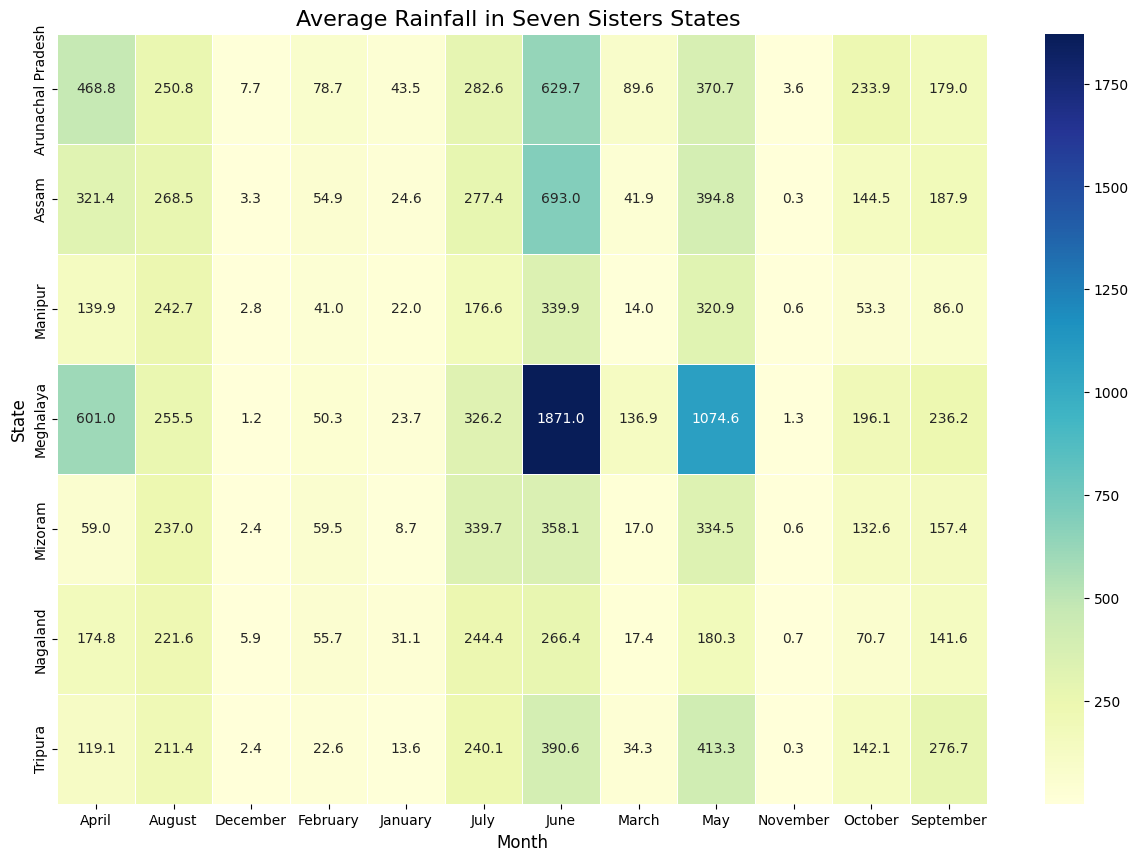

In [28]:
# Filter the data for the Seven Sisters states
seven_sisters_states = ['Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura']
df_seven_sisters = df[df['State'].isin(seven_sisters_states)]
# Calculate the average rainfall for seven states
average_rainfall = df_seven_sisters.groupby(['State', 'Month'],sort=False)['Total'].mean().reset_index()
# Pivot the data to create a heatmap
heatmap1 = average_rainfall.pivot('State', 'Month', 'Total')
# Set the size of the heatmap
plt.figure(figsize=(15, 10))

# Create the heatmap using seaborn
sns.heatmap(heatmap1, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Average Rainfall in Seven Sisters States ', fontsize=16)

# Show the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_106024\3674016064.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap2 = average_rainfall_south.pivot('State', 'Month', 'Total')


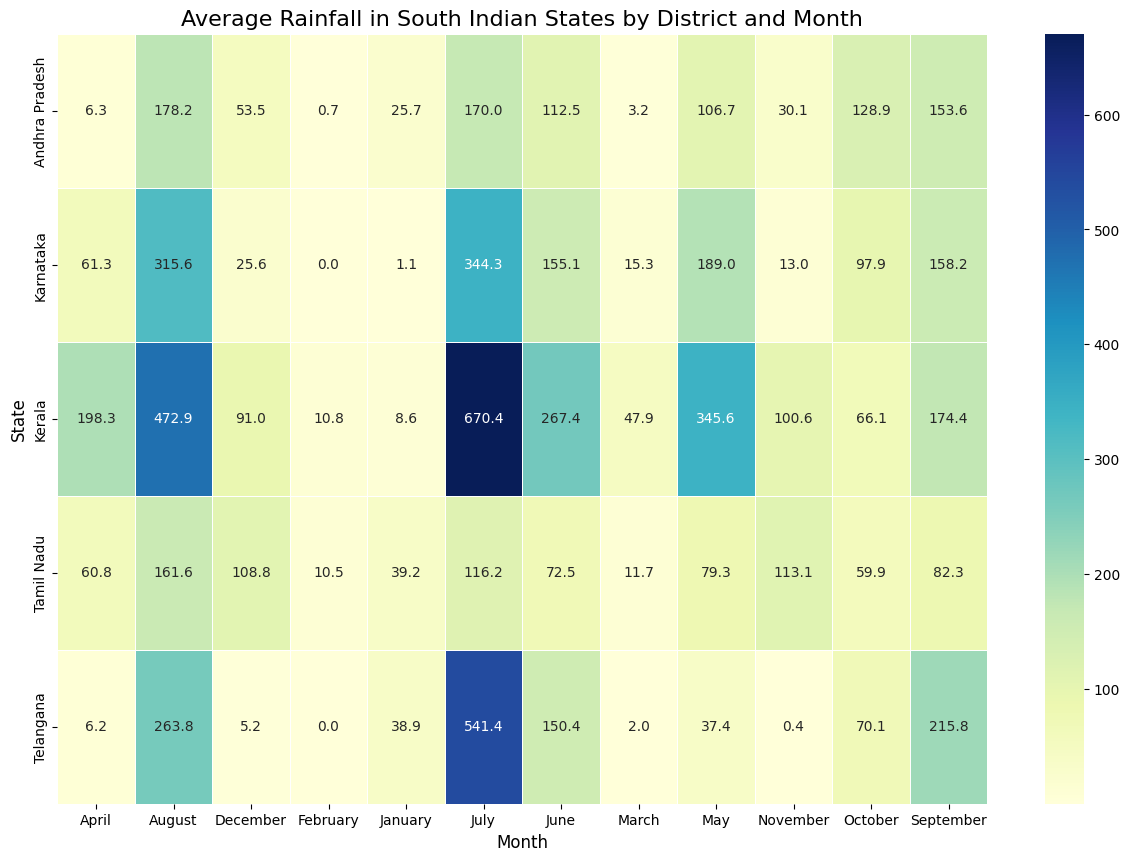

In [29]:
# Filter the data for the Seven Sisters states
south_india_states = ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana']
df_south = df[df['State'].isin(south_india_states)]
# Calculate the average rainfall for each month and district
average_rainfall_south = df_south.groupby(['State', 'Month'])['Total'].mean().reset_index()
# Pivot the data to create a heatmap
heatmap2 = average_rainfall_south.pivot('State', 'Month', 'Total')
# Set the size of the heatmap
plt.figure(figsize=(15, 10))

# Create the heatmap using seaborn
sns.heatmap(heatmap2, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Average Rainfall in South Indian States by District and Month', fontsize=16)

# Show the plot
plt.show()

__Based on above heatmaps we can see that seven sisters states which are North-eastern States are having relatively higher rainfall than other states of India, up next we have South Indian states which are basically coastal region states receiving more rainfall than north Indian States which are punjab, Haryana, UttarPradesh, etc.,. And among the seven sisters Meghalaya receiving higher rainfall than other states of India and From south India Kerala receiving high rainfall.__